# Code for the paper: "Supervised contrastive learning over prototype-label embeddings for network intrusion detection"
# Dataset: UNSW-NB15

# 1. Load data, packages and functions

# 1.1 Load packages

In [2]:
import numpy as np

import sklearn
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import LabelEncoder
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support, matthews_corrcoef, precision_recall_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.kernel_approximation import RBFSampler, Nystroem
from sklearn.linear_model import SGDClassifier
import pandas.core.algorithms as algos
from pandas import Series
from sklearn.preprocessing import OneHotEncoder, normalize
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, mean_squared_error, mean_absolute_error, median_absolute_error, r2_score


import pandas as pd
import matplotlib.pyplot as plt
import datetime, time
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from numpy import dot, multiply, diag, power
from numpy import pi, exp, sin, cos, cosh, tanh, real, imag
from warnings import warn

In [3]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

from sklearn import metrics
from sklearn.metrics.cluster import contingency_matrix

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Embedding, dot

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Dropout, Reshape, BatchNormalization, TimeDistributed, \
                         Lambda, Activation, LSTM, Flatten, Convolution1D, GRU, MaxPooling1D, concatenate
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import Callback, ModelCheckpoint, EarlyStopping
from tensorflow.keras import initializers
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.initializers import RandomUniform, Initializer, Constant
from tensorflow.keras.layers import Layer

from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Input
from tensorflow.keras.backend import abs

from tensorflow.keras.layers import Dense, Dropout, Flatten, dot
from tensorflow.keras.layers import Conv2D, MaxPooling2D

from tensorflow.keras.layers import add

In [5]:
tf.keras.backend.set_floatx('float64')

In [6]:
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)

In [9]:
import tensorflow
tensorflow.__version__

'2.0.0'

In [10]:
sklearn.__version__

'0.21.3'

# 1.2 Load UNSW-NB15  data


In [12]:

####################################################
# Load variables from previous session
####################################################

filename_save = 'ADFA_Load.pkl'
import pickle

# Getting back the objects:
with open(filename_save, 'rb') as f:  # Python 3: open(..., 'rb')
    Ytest_label,Ytest_attack, Xtest, Ytrain_label,Ytrain_attack, Xtrain,Ytest_attack_char,Ytrain_attack_char, le1, le2, le3, le4 = pickle.load(f)
####################################################

In [13]:
YTrainANMOhe = np.array([[1,0] if x== 'Normal' else [0,1] for x in Ytrain_attack_char])
YTestANMOhe = np.array([[1,0] if x== 'Normal' else [0,1] for x in Ytest_attack_char])

In [14]:
Ytest_label

0        0
1        0
2        0
3        0
4        0
        ..
82327    0
82328    0
82329    0
82330    0
82331    0
Name: label, Length: 82332, dtype: int64

In [15]:
print(Ytrain_label.shape)
print(Ytrain_attack.shape)
print(Xtrain.shape)
print(Ytrain_attack_char.shape)
print(Ytest_label.shape)
print(Ytest_attack.shape)
print(Xtest.shape)
print(Ytest_attack_char.shape)
print(YTrainANMOhe.shape)
print(YTestANMOhe.shape)
Xtrain.describe()

(175341,)
(175341, 10)
(175341, 196)
(175341,)
(82332,)
(82332, 10)
(82332, 196)
(82332,)
(175341, 2)
(82332, 2)


dur          spkts          dpkts         sbytes  \
count  175341.000000  175341.000000  175341.000000  175341.000000   
mean        0.082358       0.155124       0.149529       0.231444   
std         0.159209       0.133400       0.166771       0.124863   
min         0.000000       0.000000       0.000000       0.011192   
25%         0.000002       0.047258       0.000000       0.115080   
50%         0.000385       0.047258       0.118037       0.214711   
75%         0.124467       0.218162       0.257634       0.304570   
max         1.000000       0.988141       0.999570       0.992317   

              dbytes           rate           sttl           dttl  \
count  175341.000000  175341.000000  175341.000000  175341.000000   
mean        0.232075       0.568704       0.870993       0.430217   
std         0.240117       0.300595       0.199597       0.436384   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.254790       0.747160       0.000000   
50%         0.309443       0.584795       0.999294       0.613795   
75%         0.424581       0.849486       0.999294       0.998579   
max         0.999992       1.000000       1.000000       1.000000   

               sload          dload          sloss          dloss  \
count  175341.000000  175341.000000  175341.000000  175341.000000   
mean        0.618720       0.332037       0.089098       0.088991   
std         0.207209       0.342576       0.115852       0.131130   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.420951       0.000000       0.000000       0.000000   
50%         0.607973       0.429997       0.000000       0.000000   
75%         0.812992       0.604673       0.161587       0.127539   
max         1.000000       1.000000       0.988108       0.999514   

              sinpkt         dinpkt           sjit           djit  \
count  175341.000000  175341.000000  175341.000000  175341.000000   
mean        0.165371       0.144075       0.245009       0.172857   
std         0.214186       0.192952       0.274351       0.217594   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000702       0.000000       0.000000       0.000000   
50%         0.021745       0.000546       0.000000       0.000000   
75%         0.355122       0.360486       0.550997       0.364368   
max         1.000000       0.998370       0.998884       0.963944   

                swin          stcpb          dtcpb           dwin  \
count  175341.000000  175341.000000  175341.000000  175341.000000   
mean        0.455934       0.430760       0.430769       0.451046   
std         0.498047       0.476140       0.476180       0.497594   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         1.000000       0.963623       0.963554       1.000000   
max         1.000000       1.000000       1.000000       1.000000   

              tcprtt         synack         ackdat          smean  \
count  175341.000000  175341.000000  175341.000000  175341.000000   
mean        0.024177       0.013872       0.014223       0.316930   
std         0.043904       0.027195       0.026903       0.174350   
min         0.000000       0.000000       0.000000       0.036221   
25%         0.000000       0.000000       0.000000       0.205377   
50%         0.000000       0.000000       0.000000       0.264831   
75%         0.040320       0.015957       0.027894       0.340741   
max         0.799799       0.784988       0.675722       1.000000   

               dmean    trans_depth  response_body_len     ct_srv_src  \
count  175341.000000  175341.000000      175341.000000  175341.000000   
mean        0.342395       0.013753           0.029128       0.133975   
std         0.345529       0.041150           0.116507       0.172

### Carry out some checks

In [16]:
Ytrain_label.value_counts()

1    119341
0     56000
Name: label, dtype: int64

In [17]:
np.unique(Ytrain_attack_char , return_counts=True)

(array(['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic',
        'Normal', 'Reconnaissance', 'Shellcode', 'Worms'], dtype=object),
 array([ 2000,  1746, 12264, 33393, 18184, 40000, 56000, 10491,  1133,
          130], dtype=int64))

In [18]:
Ytrain_attack

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [19]:
np.sum(Ytrain_attack, axis=0)

array([ 2000,  1746, 12264, 33393, 18184, 40000, 56000, 10491,  1133,
         130])

In [20]:
100*np.sum(Ytrain_attack, axis=0)/np.sum(Ytrain_attack)

array([ 1.14063453,  0.99577395,  6.99437097, 19.04460451, 10.37064919,
       22.8126907 , 31.93776698,  5.98319845,  0.64616946,  0.07414124])

In [21]:
YTrainANMOhe

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [0, 1],
       [0, 1],
       [0, 1]])

In [22]:
np.equal(YTrainANMOhe[:,1], Ytrain_label).all()

True

In [23]:
(Ytrain_attack_char == le4.inverse_transform(Ytrain_attack)).all()

True

In [24]:
XTrainM = Xtrain
XTestM = Xtest

YTestAN10MOhe = Ytest_attack
YTrainAN10MOhe = Ytrain_attack

In [25]:
YTrainAN10 = Ytrain_attack_char.values
YTestAN10 = Ytest_attack_char.values

# 1.3 Auxiliary functions

In [26]:
def euclidean_distance(vects):
    x, y = vects
    sum_square = K.sum(K.square(x - y), axis=1, keepdims=True)
    return K.sqrt(K.maximum(sum_square, K.epsilon()))


def eucl_dist_output_shape(shapes):
    shape1, shape2 = shapes
    return (shape1[0], 1)

def contrastive_loss(y, d):
    """ Contrastive loss from Hadsell-et-al.'06
        http://yann.lecun.com/exdb/publis/pdf/hadsell-chopra-lecun-06.pdf
    """
    margin = 1
    square_pred = K.square(d)
    margin_square = K.square(K.maximum(margin - d, 0))
    return K.mean(y * square_pred + (1 - y) * margin_square)

def dummy_loss(y_true, d): # d is an exponetial value with range [0,+inf]
  return K.mean(d - y_true) # y_true is always 0

def dummy_loss_max_margin(y_true, d): # d is the distance difference between the value of x and the true label and the nearest false label[-Inf,+Inf]
  margin = 1
  return K.mean(K.maximum(margin + d, 0)) # y_true is always 0

In [27]:
def accuracy(predictions, labels):
  return (np.sum(np.argmax(predictions, 1) == np.argmax(labels, 1))/ predictions.shape[0])

# given probability predictions return the one-hot encoded associated labels
def labelOHEncodedFromPrediction(predictions):
  return ((predictions == np.reshape(np.max(predictions, 1),(len(predictions),-1)))*1)

# given distance predictions return the one-hot encoded associated labels
def labelOHEncodedFromDistances(predictions):
  return ((predictions == np.reshape(np.min(predictions, 1),(len(predictions),-1)))*1)

#transform back labels (one-hot encoded) to strings for the case of labels with 4 values
def invTraADFAabels4labels(labels):
    return(lb.inverse_transform(labels))

#transform back labels (one-hot encoded) to strings for the case of labels with 2 values
def invTraADFAabels2labels(labels):
    return(np.array([ 'normal' if (x== [1,0]).all() else 'attack' for x in labels]))

#transform back labels (one-hot encoded) to strings for the case of labels with 2 values
def invTraADFAabels2labels_bis(labels):
    return(np.array([ 'normal' if x== [1,0] else 'attack' for x in labels]))

#transform labels to ohe for the case of labels with 2 values
def TraADFAabels2ohelabels(labels):
    return(np.array([[1,0] if x== 'normal' else [0,1] for x in labels]))

#transform labels to integers for the case of labels with 2 values
def TraADFAabels2Integerlabels(labels):
    return(np.array([0 if x== 'normal' else 1 for x in labels])) 

# 2. Data Preparation

In [ ]:
def MoveToRight(y):
    y_out = np.zeros_like((y))
    y_out[range(len(y_out)),(np.argmax(y,axis=1)+1)%rounds] = 1
    return(y_out)

In [ ]:
def ExtendX (m_ext,m):
    for i in range(rounds-1):
        m_ext = np.concatenate((m_ext,m), axis=0)
    return(m_ext)

In [ ]:
def ExtendY (m_ext,m):
    for i in range(rounds-1):
        m= MoveToRight(m)
        m_ext = np.concatenate((m_ext,m), axis=0)
    return(m_ext)

# 2.1 Data preparation for the scenario of 2 labels (not used in this notebook)

In [35]:
YTrainANMOhe.shape

(175341, 2)

In [36]:
XTrainM.shape

(175341, 196)

In [37]:
XTestM.shape

(82332, 196)

In [38]:
rounds = YTrainANMOhe.shape[1]
rounds  # Rounds of data to generate, the first round with Y equal to True and the second with Y equal to False (fake)

2

#### Extend XTrain

In [39]:
XTrainM_extended = XTrainM.copy()

In [40]:
XTrainM_extended = ExtendX (XTrainM_extended,XTrainM)
XTrainM_extended.shape

(350682, 196)

In [41]:
np.equal(XTrainM,XTrainM_extended[0:XTrainM.shape[0],:]).all()

dur       True
spkts     True
dpkts     True
sbytes    True
dbytes    True
          ... 
6         True
7         True
8         True
9         True
10        True
Length: 196, dtype: bool

In [42]:
np.equal(XTrainM,XTrainM_extended[XTrainM.shape[0]:,:]).all()

dur       True
spkts     True
dpkts     True
sbytes    True
dbytes    True
          ... 
6         True
7         True
8         True
9         True
10        True
Length: 196, dtype: bool

#### Extend XTest

In [43]:
XTestM_extended = XTestM.copy()

In [44]:
XTestM_extended = ExtendX (XTestM_extended,XTestM)
XTestM_extended.shape

(164664, 196)

In [45]:
np.equal(XTestM,XTestM_extended[0:XTestM.shape[0],:]).all()

dur       True
spkts     True
dpkts     True
sbytes    True
dbytes    True
          ... 
6         True
7         True
8         True
9         True
10        True
Length: 196, dtype: bool

In [46]:
np.equal(XTestM,XTestM_extended[XTestM.shape[0]:,:]).all()

dur       True
spkts     True
dpkts     True
sbytes    True
dbytes    True
          ... 
6         True
7         True
8         True
9         True
10        True
Length: 196, dtype: bool

#### Extend YTrain

In [47]:
YTrainANMOhe_extended = YTrainANMOhe.copy()

In [48]:
YTrainANMOhe_extended = ExtendY(YTrainANMOhe_extended,YTrainANMOhe)
YTrainANMOhe_extended.shape

(350682, 2)

In [49]:
np.equal(YTrainANMOhe,YTrainANMOhe_extended[0:YTrainANMOhe.shape[0],:]).all()

True

In [50]:
YTrainANMOhe_extended[YTrainANMOhe.shape[0]:,:]

array([[0, 1],
       [0, 1],
       [0, 1],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]])

In [51]:
YTrainANMOhe

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [0, 1],
       [0, 1],
       [0, 1]])

#### Extend YTest

In [52]:
YTestANMOhe_extended = YTestANMOhe.copy()

In [53]:
YTestANMOhe_extended = ExtendY(YTestANMOhe_extended,YTestANMOhe)
YTestANMOhe_extended.shape

(164664, 2)

In [54]:
np.equal(YTestANMOhe,YTestANMOhe_extended[0:YTestANMOhe.shape[0],:]).all()

True

In [55]:
YTestANMOhe_extended[YTestANMOhe.shape[0]:,:]

array([[0, 1],
       [0, 1],
       [0, 1],
       ...,
       [0, 1],
       [0, 1],
       [0, 1]])

In [56]:
YTestANMOhe

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]])

#### Create the real outputs for the models (Y real) for train and test

In [57]:
YTrainOutput = np.append(np.ones(XTrainM.shape[0]), np.zeros((rounds-1)*XTrainM.shape[0]))
print(YTrainOutput.shape)
print(YTrainOutput.mean())

(350682,)
0.5


In [58]:
YTrainOutput

array([1., 1., 1., ..., 0., 0., 0.])

In [59]:
YTestOutput = np.append(np.ones(XTestM.shape[0]), np.zeros((rounds-1)*XTestM.shape[0]))
print(YTestOutput.shape)
print(YTestOutput.mean())

(164664,)
0.5


#### Extend YTrain2 (MMoLE)

In [60]:
XTrainM_extended2 = XTrainM.copy()

In [61]:
YTrainANMOhe_extended_true = YTrainANMOhe.copy()

In [62]:
YTrainANMOhe_extended_false = YTrainANMOhe_extended[YTrainANMOhe.shape[0]:,:]

In [63]:
print(XTrainM.shape, XTrainM_extended2.shape, YTrainANMOhe_extended_true.shape, YTrainANMOhe_extended_false.shape)

(175341, 196) (175341, 196) (175341, 2) (175341, 2)


#### Extend YTest2 (MMoLE)

In [64]:
XTestM_extended2 = XTestM.copy()

In [65]:
YTestANMOhe_extended_true = YTestANMOhe.copy()

In [66]:
YTestANMOhe_extended_false = YTestANMOhe_extended[YTestANMOhe.shape[0]:,:]

In [67]:
print(XTestM.shape, XTestM_extended2.shape, YTestANMOhe_extended_true.shape, YTestANMOhe_extended_false.shape)

(82332, 196) (82332, 196) (82332, 2) (82332, 2)


# 2.2 Data preparation for the scenario of 10 labels (used in this notebook)

In [68]:
YTrainAN10MOhe.shape

(175341, 10)

In [69]:
XTrainM.shape

(175341, 196)

In [70]:
XTestM.shape

(82332, 196)

In [71]:
rounds = YTrainAN10MOhe.shape[1]
rounds # Rounds of data to generate, the first round with Y equal to True and the rest with Y equal to False (fake)

10

#### Extend XTrain

In [72]:
XTrainM10_extended = XTrainM.copy()

In [73]:
XTrainM10_extended = ExtendX (XTrainM10_extended,XTrainM)
XTrainM10_extended.shape

(1753410, 196)

In [74]:
np.equal(XTrainM,XTrainM10_extended[0:XTrainM.shape[0],:]).all()

dur       True
spkts     True
dpkts     True
sbytes    True
dbytes    True
          ... 
6         True
7         True
8         True
9         True
10        True
Length: 196, dtype: bool

In [75]:
np.equal(XTrainM,XTrainM10_extended[2*XTrainM.shape[0]:3*XTrainM.shape[0],:]).all()

dur       True
spkts     True
dpkts     True
sbytes    True
dbytes    True
          ... 
6         True
7         True
8         True
9         True
10        True
Length: 196, dtype: bool

#### Extend XTest

In [76]:
XTestM10_extended = XTestM.copy()

In [77]:
XTestM10_extended = ExtendX (XTestM10_extended,XTestM)
XTestM10_extended.shape

(823320, 196)

In [78]:
np.equal(XTestM,XTestM10_extended[0:XTestM.shape[0],:]).all()

dur       True
spkts     True
dpkts     True
sbytes    True
dbytes    True
          ... 
6         True
7         True
8         True
9         True
10        True
Length: 196, dtype: bool

In [79]:
np.equal(XTestM,XTestM10_extended[2*XTestM.shape[0]:3*XTestM.shape[0]:,:]).all()

dur       True
spkts     True
dpkts     True
sbytes    True
dbytes    True
          ... 
6         True
7         True
8         True
9         True
10        True
Length: 196, dtype: bool

#### Extend YTrain

In [80]:
YTrainANMOhe10_extended = YTrainAN10MOhe.copy()

In [81]:
YTrainANMOhe10_extended = ExtendY(YTrainANMOhe10_extended,YTrainAN10MOhe)
YTrainANMOhe10_extended.shape

(1753410, 10)

In [82]:
np.equal(YTrainAN10MOhe,YTrainANMOhe10_extended[0:YTrainAN10MOhe.shape[0],:]).all()

True

In [83]:
YTrainANMOhe10_extended[YTrainAN10MOhe.shape[0]:2*YTrainAN10MOhe.shape[0],:]

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [84]:
YTrainANMOhe10_extended[2*YTrainAN10MOhe.shape[0]:3*YTrainAN10MOhe.shape[0],:]

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]])

In [85]:
YTrainAN10MOhe

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

#### Extend YTest

In [86]:
YTestANMOhe10_extended = YTestAN10MOhe.copy()

In [87]:
YTestANMOhe10_extended = ExtendY(YTestANMOhe10_extended,YTestAN10MOhe)
YTestANMOhe10_extended.shape

(823320, 10)

In [88]:
np.equal(YTestAN10MOhe,YTestANMOhe10_extended[0:YTestAN10MOhe.shape[0],:]).all()

True

In [89]:
YTestANMOhe10_extended[YTestAN10MOhe.shape[0]:2*YTestAN10MOhe.shape[0],:]

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]])

In [90]:
YTestANMOhe10_extended[2*YTestAN10MOhe.shape[0]:3*YTestAN10MOhe.shape[0],:]

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0]])

In [91]:
YTestAN10MOhe

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

#### Create the real outputs for the models (Y real) for train and test

In [92]:
YTrainOutput10 = np.append(np.ones(XTrainM.shape[0]), np.zeros((rounds-1)*XTrainM.shape[0]))
print(YTrainOutput10.shape)
print(YTrainOutput10.mean())

(1753410,)
0.1


In [93]:
YTrainOutput10

array([1., 1., 1., ..., 0., 0., 0.])

In [94]:
YTestOutput10 = np.append(np.ones(XTestM.shape[0]), np.zeros((rounds-1)*XTestM.shape[0]))
print(YTestOutput10.shape)
print(YTestOutput10.mean())

(823320,)
0.1


#### Extend YTrain2 (MMoLE)

In [95]:
XTrainM10_extended2 = np.tile(XTrainM,(rounds-1,1))  

In [96]:
YTrainANMOhe10_extended_true = np.tile(YTrainAN10MOhe,(rounds-1,1))

In [97]:
YTrainANMOhe10_extended_false = YTrainANMOhe10_extended[YTrainAN10MOhe.shape[0]:,:]

In [98]:
print(XTrainM.shape, XTrainM10_extended2.shape,YTrainANMOhe10_extended_true.shape, YTrainANMOhe10_extended_false.shape )

(175341, 196) (1578069, 196) (1578069, 10) (1578069, 10)


#### Extend YTest2 (MMoLE)

In [99]:
XTestM10_extended2 = np.tile(XTestM,(rounds-1,1))  

In [100]:
YTestANMOhe10_extended_true = np.tile(YTestAN10MOhe,(rounds-1,1))

In [101]:
YTestANMOhe10_extended_false = YTestANMOhe10_extended[YTestAN10MOhe.shape[0]:,:]

In [102]:
print(XTestM.shape, XTestM10_extended2.shape,YTestANMOhe10_extended_true.shape, YTestANMOhe10_extended_false.shape )

(82332, 196) (740988, 196) (740988, 10) (740988, 10)


# 3. Models

## 3.1 Model: 10 labels, LB-CL, ConCE, Embed dim: 2, Distance: Cosine

In [103]:
x_train, x_test, label_train, label_test, y_train, y_test = XTrainM10_extended, XTestM10_extended, \
                                                            YTrainANMOhe10_extended, YTestANMOhe10_extended,\
                                                            YTrainOutput10, YTestOutput10
print (x_train.shape, x_test.shape, label_train.shape, label_test.shape, y_train.shape, y_test.shape)


(1753410, 196) (823320, 196) (1753410, 10) (823320, 10) (1753410,) (823320,)


In [89]:
# save the best weights for predicting the test question pairs
file_name = 'CLC_10ADFA_3 v1.0'
save_best_weights = file_name + '_best.h5'
save_last_weights = file_name + '_last.h5'
save_summary_stats = file_name + '.csv'

in_dim_x = x_train.shape[1]
in_dim_label = label_train.shape[1]
out_dim = 1 # yes, no

print(in_dim_x)
print(in_dim_label)
print(out_dim)

196
10
1


### Prepare the model

In [91]:
vocab_size = in_dim_label  
embed_dim = 2

def create_model(in_dim_x,in_dim_label,out_dim,embed_dim):
    # input variables
    in_x = Input(shape=(in_dim_x,))
    in_label = Input(shape=(in_dim_label,))

    
    #embedding of x
    u = Dense (100, activation='relu')(in_x)
    u = Dense (50, activation='relu')(u)
    x_embed = Dense(embed_dim,activation='linear')(u)
    
    #embedding of label
    v = Dense (10, activation='relu')(in_label)
    label_embed = Dense(embed_dim,activation='linear')(v)

    # similarity measure
    dot_product =  dot([x_embed, label_embed], 1, normalize=True)
    
    # sigmoid output layer
    output = Dense(out_dim, activation='sigmoid')(dot_product)
    
    # training model
    m = Model(inputs=[in_x, in_label], outputs= output) # return probability
    m_embed_x = Model(inputs=in_x, outputs= x_embed) # return embedding of x
    m_embed_label = Model(inputs= in_label, outputs= label_embed) # return embedding of label

    
    m.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return(m, m_embed_x , m_embed_label)

In [92]:
#create model
model, model_embed_x , model_embed_label = create_model(in_dim_x,in_dim_label,out_dim,embed_dim) 

In [93]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 196)]        0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 100)          19700       input_1[0][0]                    
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 10)]         0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 50)           5050        dense[0][0]                      
______________________________________________________________________________________________

In [94]:
model_embed_x.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 196)]             0         
_________________________________________________________________
dense (Dense)                (None, 100)               19700     
_________________________________________________________________
dense_1 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 102       
Total params: 24,852
Trainable params: 24,852
Non-trainable params: 0
_________________________________________________________________


In [95]:
model_embed_label.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 10)]              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 22        
Total params: 132
Trainable params: 132
Non-trainable params: 0
_________________________________________________________________


### Training

In [97]:
t0 = time.time()
# Train the model
callbacks = [ModelCheckpoint(save_best_weights, monitor='val_loss', save_best_only=True, mode='auto'),
             EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='auto')
            ]

history = model.fit([x_train,label_train],y_train,
                    batch_size=100,
                    epochs=100,
                    validation_split=0.2,
                    verbose=1,
                    shuffle=True,
                    initial_epoch = 0,
                    callbacks=callbacks)
t1 = time.time()
print("Minutes elapsed: %f" % ((t1 - t0) / 60.))

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "d:\anaconda\envs\tensorflow2-new\lib\site-packages\IPython\core\interactiveshell.py", line 3319, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-97-f8cd5c64716a>", line 17, in <module>
    callbacks=callbacks)
  File "d:\anaconda\envs\tensorflow2-new\lib\site-packages\tensorflow_core\python\keras\engine\training.py", line 728, in fit
    use_multiprocessing=use_multiprocessing)
  File "d:\anaconda\envs\tensorflow2-new\lib\site-packages\tensorflow_core\python\keras\engine\training_v2.py", line 224, in fit
    distribution_strategy=strategy)
  File "d:\anaconda\envs\tensorflow2-new\lib\site-packages\tensorflow_core\python\keras\engine\training_v2.py", line 528, in _process_training_inputs
    distribution_strategy=distribution_strategy)
  File "d:\anaconda\envs\tensorflow2-new\lib\site-packages\tensorflow_core\python\keras\engine\data_adapter.py", line 288, in __init__
    indices_dataset = indices_datase

KeyboardInterrupt: 

###  Inference

In [ ]:
model.load_weights(save_best_weights)

In [179]:
le4.inverse_transform(np.array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                               [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
                               [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
                               [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
                               [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                               [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
                               [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
                               [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
                               [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
                               [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]]))

array(['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic',
       'Normal', 'Reconnaissance', 'Shellcode', 'Worms'], dtype='<U14')

In [180]:
total_label_test[0].shape

(82332, 10)

In [181]:
t0 = time.time()

total_label_test =[np.tile(le4.transform([i]),(len(YTestAN10MOhe),1)) for i in ['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic',
       'Normal', 'Reconnaissance', 'Shellcode', 'Worms']]
ytest_prob_hat = np.column_stack([model.predict([XTestM,i]) for i in total_label_test])
ytest_prob_hat.shape

t1 = time.time()
print("Minutes elapsed: %f" % ((t1 - t0) / 60.))

Minutes elapsed: 0.300193


In [182]:
y_test_hat = le4.inverse_transform(labelOHEncodedFromPrediction(ytest_prob_hat))
y_test_hat

array(['Normal', 'Fuzzers', 'Fuzzers', ..., 'Normal', 'Normal', 'Normal'],
      dtype='<U14')

In [183]:
(le4.inverse_transform(YTestAN10MOhe) == Ytest_attack_char).all()

True

In [184]:
average_type = 'weighted' # micro' , 'weighted'
print('Performance measures on Test data')
print('Accuracy =  {}'.format(accuracy_score( le4.inverse_transform(YTestAN10MOhe),y_test_hat)))

print('F1 =  {}'.format(f1_score(le4.inverse_transform(YTestAN10MOhe),y_test_hat, average=average_type)))

print('Precision_score =  {}'.format(precision_score(le4.inverse_transform(YTestAN10MOhe),y_test_hat, average=average_type)))

print('recall_score =  {}'.format(recall_score(le4.inverse_transform(YTestAN10MOhe),y_test_hat, average=average_type)))

print('roc_auc_score =  {}'.format(roc_auc_score(YTestAN10MOhe,normalize(ytest_prob_hat, axis=1, norm='l1'))))

print('matthews_corr_score =  {}'.format(matthews_corrcoef(le4.inverse_transform(YTestAN10MOhe), y_test_hat)))

Performance measures on Test data
Accuracy =  0.48316571928290336


d:\anaconda\envs\tensorflow2-new\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


F1 =  0.45358418634532205


d:\anaconda\envs\tensorflow2-new\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Precision_score =  0.4817983393617312
recall_score =  0.48316571928290336
roc_auc_score =  0.7864141552370674
matthews_corr_score =  0.27869501056884793


### Perform test evaluation one vs. rest

In [126]:
yt_app = le4.inverse_transform(YTestAN10MOhe)
perf_per_class = pd.DataFrame(index=range(len(pd.Series(le4.inverse_transform(YTestAN10MOhe)).unique())),columns=['name', 'acc','f1', 'pre','rec'])
for i,x in enumerate(pd.Series(le4.inverse_transform(YTestAN10MOhe)).value_counts().index):
    y_test_hat_check = y_test_hat.copy()
    y_test_hat_check[y_test_hat_check != x] = 'OTHER'
    yt_app = le4.inverse_transform(YTestAN10MOhe).copy()
    yt_app[yt_app != x] = 'OTHER'
    ac=accuracy_score( yt_app,y_test_hat_check)
    f1=f1_score( yt_app,y_test_hat_check,pos_label=x, average='binary')
    pr=precision_score( yt_app,y_test_hat_check,pos_label=x, average='binary')
    re=recall_score( yt_app,y_test_hat_check,pos_label=x, average='binary')
    perf_per_class.iloc[i]=[x,ac,f1,pr,re]

d:\anaconda\envs\tensorflow2-new\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
d:\anaconda\envs\tensorflow2-new\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [127]:
# performance measures per class for test data
perf_per_class

name       acc        f1       pre       rec
0          Normal  0.589018  0.592644  0.534332  0.665243
1         Generic  0.901958  0.728069  0.999353  0.572625
2        Exploits  0.864791         0         0         0
3         Fuzzers  0.723121  0.276685  0.171289  0.719235
4             DoS  0.950335         0         0         0
5  Reconnaissance  0.957538         0         0         0
6        Analysis  0.991777         0         0         0
7        Backdoor  0.992919         0         0         0
8       Shellcode  0.995409         0         0         0
9           Worms  0.999466         0         0         0

###  Cluster visualization

In [186]:
y_test = le4.inverse_transform(YTestAN10MOhe)
x_test = XTestM
x_train = XTrainM
label_train = YTrainAN10MOhe
label_test = YTestAN10MOhe
y_train = le4.inverse_transform(YTrainAN10MOhe)


#### Training set

In [187]:
embedding_x_train = np.array(model_embed_x.predict(x_train))
embedding_x_train

array([[ 0.21271326, -7.7514103 ],
       [ 0.83957956, -4.11215747],
       [ 0.57890507, -3.00442509],
       ...,
       [ 0.45546677,  0.26867105],
       [ 1.11769038,  0.39523568],
       [ 1.14247906,  0.40387941]])

In [188]:
embedding_label_train = np.array(model_embed_label(label_train))
embedding_label_train = np.unique(embedding_label_train, axis=0)
print(embedding_label_train)

[[-0.27528151 -0.23980335]
 [-0.27152388 -0.01582467]
 [ 0.15125801 -0.02785419]
 [ 0.2138694  -0.04573069]
 [ 0.23623206 -0.16932608]
 [ 0.96790147 -0.44197797]
 [ 1.34489144  0.05483576]
 [ 1.63048379  0.27698658]
 [ 2.42718035  0.72476731]
 [ 3.10320106  1.51444722]]


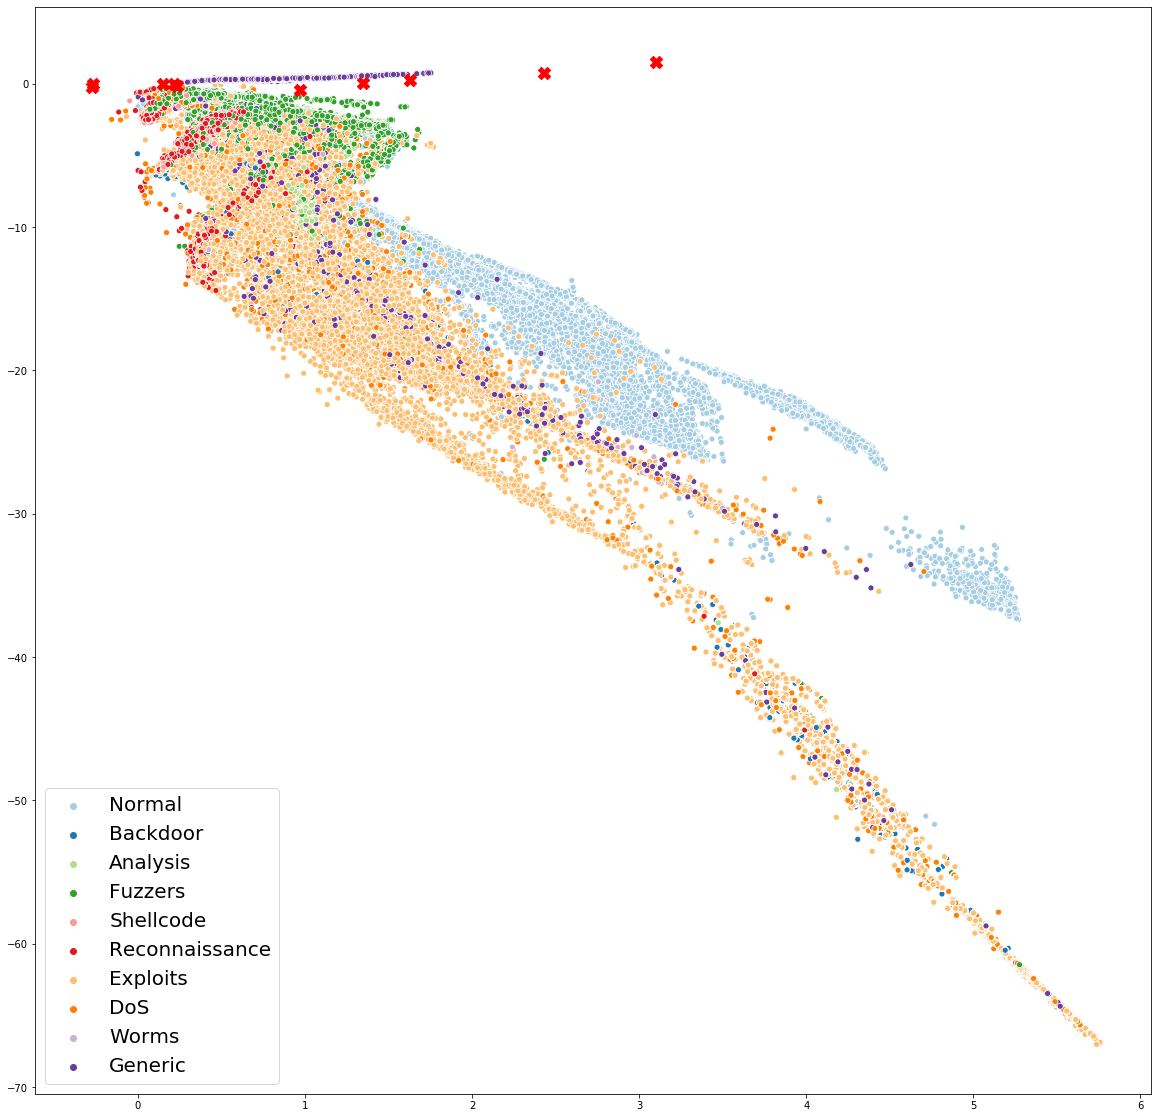

In [190]:
from matplotlib.colors import ListedColormap
#https://matplotlib.org/examples/color/colormaps_reference.html
import seaborn as sns

num_classes =['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic',
       'Normal', 'Reconnaissance', 'Shellcode', 'Worms']

fig, ax = plt.subplots(figsize=(20,20))
s =sns.scatterplot(embedding_x_train[:,0],embedding_x_train[:,1], 
            hue=le4.inverse_transform(label_train),
            palette = "Paired")
plt.legend(loc='lower left', prop={'size': 20})
plt.scatter(embedding_label_train[:,0],embedding_label_train[:,1], c="r", marker="X", s=150)
#for i, txt in enumerate(num_classes):
#    ax.annotate(txt, (embedding_label_test[i,0]+0.1, embedding_label_test[i,1]+0.1),fontsize=15)
plt.show()

#### Test set

In [191]:
embedding_x_test = np.array(model_embed_x.predict(x_test))
embedding_x_test

array([[  0.25172126,  -1.01270052],
       [  0.4798389 ,  -0.76172011],
       [  0.48242188,  -0.72521036],
       ...,
       [  2.76672019, -16.67627731],
       [  2.76018707, -16.73278101],
       [  0.14110797,  -0.94746933]])

In [192]:
embedding_label_test = np.array(model_embed_label(label_test))
embedding_label_test = np.unique(embedding_label_test, axis=0)
print(embedding_label_test)

[[-0.27528151 -0.23980335]
 [-0.27152388 -0.01582467]
 [ 0.15125801 -0.02785419]
 [ 0.2138694  -0.04573069]
 [ 0.23623206 -0.16932608]
 [ 0.96790147 -0.44197797]
 [ 1.34489144  0.05483576]
 [ 1.63048379  0.27698658]
 [ 2.42718035  0.72476731]
 [ 3.10320106  1.51444722]]


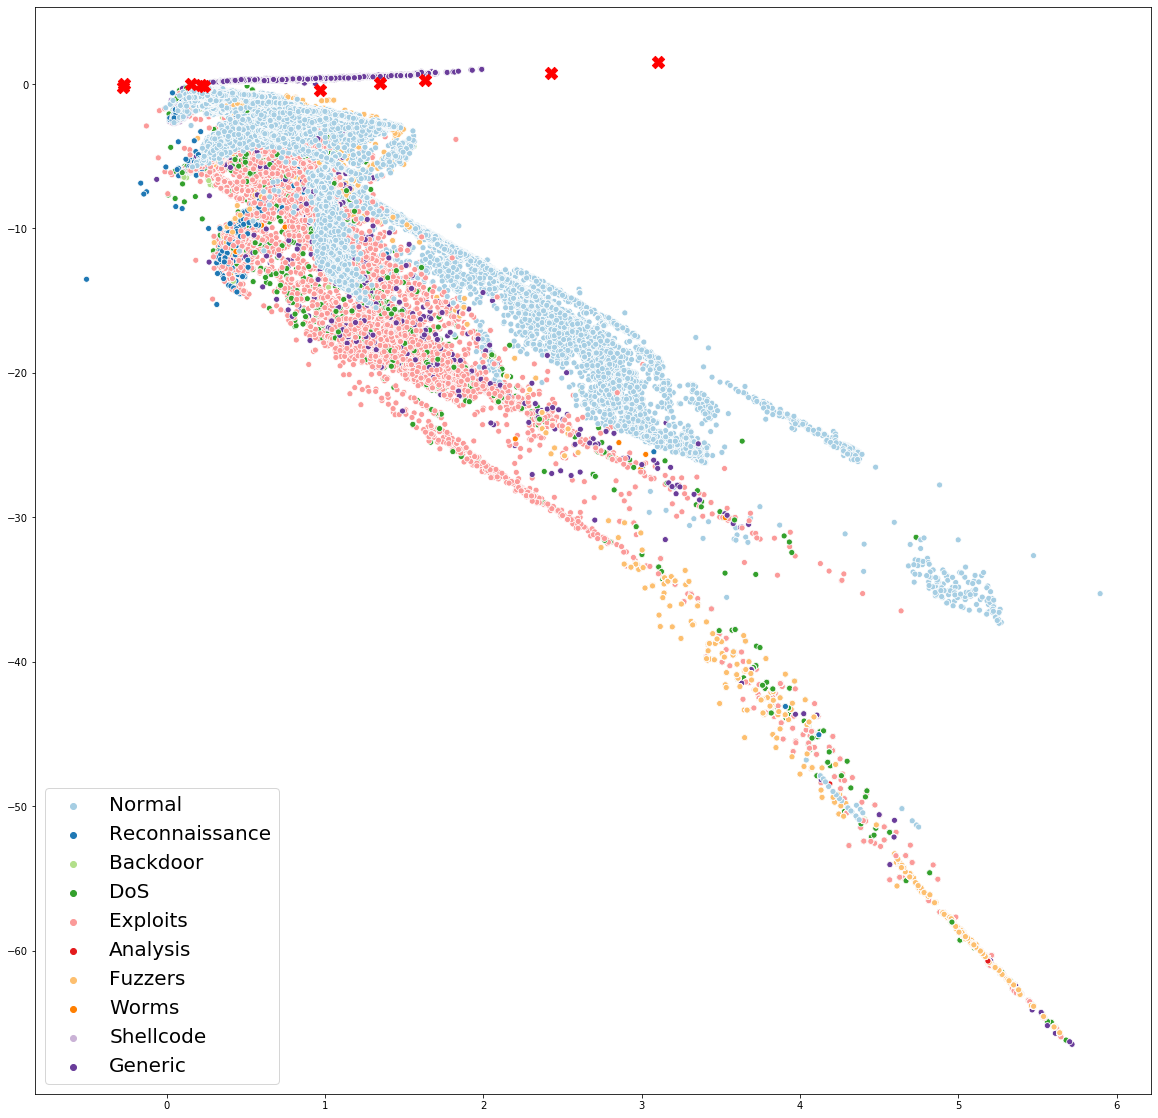

In [194]:
from matplotlib.colors import ListedColormap
#https://matplotlib.org/examples/color/colormaps_reference.html
import seaborn as sns

num_classes =['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic',
       'Normal', 'Reconnaissance', 'Shellcode', 'Worms']

fig, ax = plt.subplots(figsize=(20,20))
s =sns.scatterplot(embedding_x_test[:,0],embedding_x_test[:,1], 
            hue=le4.inverse_transform(label_test),
            palette = "Paired")
plt.legend(loc='lower left', prop={'size': 20})
plt.scatter(embedding_label_test[:,0],embedding_label_test[:,1], c="r", marker="X", s=150)
#for i, txt in enumerate(num_classes):
#    ax.annotate(txt, (embedding_label_test[i,0]+0.1, embedding_label_test[i,1]+0.1),fontsize=15)
plt.show()

### Cluster metrics

#### Training set

####  Metrics not based on knowing the ground-truth label

In [173]:
# metricas no basadas en conocer el groun-truth label
embedding_x_train = np.array(model_embed_x.predict(x_train))
embedding_x_train

t0 = time.time()

total_label_train =[np.tile(le4.transform([i]),(len(YTrainAN10MOhe),1)) for i in ['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic',
       'Normal', 'Reconnaissance', 'Shellcode', 'Worms']]
ytrain_prob_hat = np.column_stack([model.predict([XTrainM,i]) for i in total_label_train])
ytrain_hat = le4.inverse_transform(labelOHEncodedFromPrediction(ytrain_prob_hat))

t1 = time.time()
print("Minutes elapsed: %f" % ((t1 - t0) / 60.))



Minutes elapsed: 0.610438


In [174]:
t0 = time.time()
cal_hara_score = metrics.calinski_harabasz_score(embedding_x_train, ytrain_hat)
t1 = time.time()
print("Minutes elapsed: %f" % ((t1 - t0) / 60.))

t0 = time.time()
d_b_score = metrics.davies_bouldin_score(embedding_x_train, ytrain_hat)
t1 = time.time()
print("Minutes elapsed: %f" % ((t1 - t0) / 60.))

t0 = time.time()
sil_score = metrics.silhouette_score(embedding_x_train, ytrain_hat, metric='euclidean')
t1 = time.time()
print("Minutes elapsed: %f" % ((t1 - t0) / 60.))

Minutes elapsed: 0.000798
Minutes elapsed: 0.035672
Minutes elapsed: 5.339638


In [175]:
no_labels_cluster_metrics = pd.DataFrame({'silhouette_score': sil_score,
                              'calinski_harabasz_score': cal_hara_score,
                              'davies_bouldin_score':d_b_score},index=[1])
no_labels_cluster_metrics

silhouette_score  calinski_harabasz_score  davies_bouldin_score
1         -0.008627             43136.684842              0.959202

####   Metrics based on knowing the ground-truth label

In [176]:
a_r_score = metrics.adjusted_rand_score(y_train, ytrain_hat)
a_m_i_score = metrics.adjusted_mutual_info_score(y_train, ytrain_hat)  
n_m_i_score = metrics.normalized_mutual_info_score(y_train, ytrain_hat)  
fo_ma_score = metrics.fowlkes_mallows_score(y_train, ytrain_hat)  
homo_score = metrics.homogeneity_score(y_train, ytrain_hat) 
comple_score =metrics.completeness_score(y_train, ytrain_hat)  
v_meas_score = metrics.v_measure_score(y_train, ytrain_hat)  

d:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\cluster\_supervised.py:389: RuntimeWarning: overflow encountered in longlong_scalars
d:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\cluster\_supervised.py:390: RuntimeWarning: overflow encountered in longlong_scalars


In [177]:
labels_cluster_metrics = pd.DataFrame({'adjusted_rand_score': a_r_score,
                              'adjusted_mutual_info_score': a_m_i_score,
                              'normalized_mutual_info_score':n_m_i_score,
                             'fowlkes_mallows_score':fo_ma_score,
                              'homogeneity_score':homo_score,
                              'completeness_score':comple_score,
                             'v_measure_score':v_meas_score,
                                      }
                                      ,index=[1])
labels_cluster_metrics

adjusted_rand_score  adjusted_mutual_info_score  \
1            -2.515109                      0.3515   

   normalized_mutual_info_score  fowlkes_mallows_score  homogeneity_score  \
1                      0.351526               0.467659           0.266501   

   completeness_score  v_measure_score  
1            0.516219         0.351526

#### Test set

####  Metrics not based on knowing the ground-truth label

In [178]:
t0 = time.time()
cal_hara_score = metrics.calinski_harabasz_score(embedding_x_test, y_test_hat)
t1 = time.time()
print("Minutes elapsed: %f" % ((t1 - t0) / 60.))

t0 = time.time()
d_b_score = metrics.davies_bouldin_score(embedding_x_test, y_test_hat)
t1 = time.time()
print("Minutes elapsed: %f" % ((t1 - t0) / 60.))

t0 = time.time()
sil_score = metrics.silhouette_score(embedding_x_test, y_test_hat, metric='euclidean')
t1 = time.time()
print("Minutes elapsed: %f" % ((t1 - t0) / 60.))

Minutes elapsed: 0.000349
Minutes elapsed: 0.000349
Minutes elapsed: 1.218172


In [179]:
no_labels_cluster_metrics = pd.DataFrame({'silhouette_score': sil_score,
                              'calinski_harabasz_score': cal_hara_score,
                              'davies_bouldin_score':d_b_score},index=[1])
no_labels_cluster_metrics

silhouette_score  calinski_harabasz_score  davies_bouldin_score
1          0.026372             18836.726136              0.915156

####   Metrics based on knowing the ground-truth label

In [180]:
a_r_score = metrics.adjusted_rand_score(y_test, y_test_hat)
a_m_i_score = metrics.adjusted_mutual_info_score(y_test, y_test_hat) 
n_m_i_score = metrics.normalized_mutual_info_score(y_test, y_test_hat) 
fo_ma_score = metrics.fowlkes_mallows_score(y_test, y_test_hat) 
homo_score = metrics.homogeneity_score(y_test, y_test_hat)
comple_score =metrics.completeness_score(y_test, y_test_hat)
v_meas_score = metrics.v_measure_score(y_test, y_test_hat) 

d:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\cluster\_supervised.py:390: RuntimeWarning: overflow encountered in longlong_scalars


In [181]:
labels_cluster_metrics = pd.DataFrame({'adjusted_rand_score': a_r_score,
                              'adjusted_mutual_info_score': a_m_i_score,
                              'normalized_mutual_info_score':n_m_i_score,
                             'fowlkes_mallows_score':fo_ma_score,
                              'homogeneity_score':homo_score,
                              'completeness_score':comple_score,
                             'v_measure_score':v_meas_score,
                                      }
                                      ,index=[1])
labels_cluster_metrics

adjusted_rand_score  adjusted_mutual_info_score  \
1             1.228691                    0.310749   

   normalized_mutual_info_score  fowlkes_mallows_score  homogeneity_score  \
1                       0.31081               0.464314            0.25133   

   completeness_score  v_measure_score  
1            0.407171          0.31081

## 3.2 Model: 10 labels, LB-CL, ConLE, Embed Dim: 2, Distance: Euclidean

In [85]:
x_train, x_test, label_train, label_test, y_train, y_test = XTrainM10_extended, XTestM10_extended, \
                                                            YTrainANMOhe10_extended, YTestANMOhe10_extended,\
                                                            YTrainOutput10, YTestOutput10
print (x_train.shape, x_test.shape, label_train.shape, label_test.shape, y_train.shape, y_test.shape)


(1753410, 196) (823320, 196) (1753410, 10) (823320, 10) (1753410,) (823320,)


In [87]:
# save the best weights for predicting the test question pairs
file_name = 'CLC_ADFA_3_3 v1.0'
save_best_weights = file_name + '_best.h5'
save_last_weights = file_name + '_last.h5'
save_summary_stats = file_name + '.csv'

in_dim_x = x_train.shape[1]
in_dim_label = label_train.shape[1]
out_dim = 1 # yes, no

print(in_dim_x)
print(in_dim_label)
print(out_dim)

196
10
1


### Prepare the model

In [89]:
vocab_size = in_dim_label  
embed_dim = 2

def create_model(in_dim_x,in_dim_label,out_dim,embed_dim):
    # input variables
    in_x = Input(shape=(in_dim_x,))
    in_label = Input(shape=(in_dim_label,))


    #embedding of x
    u = Dense (100, activation='relu')(in_x)
    u = Dense (50, activation='relu')(u)
    x_embed = Dense(embed_dim,activation='linear')(u)
    
    #embedding of label
    v = Dense (10, activation='relu')(in_label)
    label_embed = Dense(embed_dim,activation='linear')(v)

    # similarity measure
    distance = Lambda(euclidean_distance,
                  output_shape=eucl_dist_output_shape)([x_embed, label_embed])

    
    # training model
    m = Model(inputs=[in_x, in_label], outputs= distance) # return probability
    m_embed_x = Model(inputs=in_x, outputs= x_embed) # return embedding of x
    m_embed_label = Model(inputs= in_label, outputs= label_embed) # return embedding of label

    
    m.compile(loss=contrastive_loss, optimizer=Adam(0.001), metrics=['accuracy'])
    return(m, m_embed_x , m_embed_label)

In [90]:
#create model
model, model_embed_x , model_embed_label = create_model(in_dim_x,in_dim_label,out_dim,embed_dim) 

In [261]:
model.summary()

Model: "model_12"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            [(None, 196)]        0                                            
__________________________________________________________________________________________________
dense_24 (Dense)                (None, 100)          19700       input_9[0][0]                    
__________________________________________________________________________________________________
input_10 (InputLayer)           [(None, 10)]         0                                            
__________________________________________________________________________________________________
dense_25 (Dense)                (None, 50)           5050        dense_24[0][0]                   
___________________________________________________________________________________________

In [262]:
model_embed_x.summary()

Model: "model_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 196)]             0         
_________________________________________________________________
dense_24 (Dense)             (None, 100)               19700     
_________________________________________________________________
dense_25 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_26 (Dense)             (None, 2)                 102       
Total params: 24,852
Trainable params: 24,852
Non-trainable params: 0
_________________________________________________________________


In [263]:
model_embed_label.summary()

Model: "model_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 10)]              0         
_________________________________________________________________
dense_27 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_28 (Dense)             (None, 2)                 22        
Total params: 132
Trainable params: 132
Non-trainable params: 0
_________________________________________________________________


### Training

In [265]:
t0 = time.time()
# Train the model
callbacks = [ModelCheckpoint(save_best_weights, monitor='val_loss', save_best_only=True, mode='auto'),
             EarlyStopping(monitor='val_loss', patience=20, verbose=1, mode='auto')
            ]

history = model.fit([x_train,label_train],y_train,
                    batch_size=100,
                    epochs=100,
                    validation_split=0.2,
                    verbose=1,
                    shuffle=True,
                    initial_epoch = 0,
                    callbacks=callbacks)
t1 = time.time()
print("Minutes elapsed: %f" % ((t1 - t0) / 60.))

Train on 1402728 samples, validate on 350682 samples
Epoch 1/100
1402728/1402728 [==============================] - 38s 27us/sample - loss: 0.0336 - accuracy: 0.0459 - val_loss: 0.0980 - val_accuracy: 0.1698
Epoch 2/100
1402728/1402728 [==============================] - 36s 26us/sample - loss: 0.0288 - accuracy: 0.0397 - val_loss: 0.0923 - val_accuracy: 0.1255
Epoch 3/100
1402728/1402728 [==============================] - 36s 26us/sample - loss: 0.0281 - accuracy: 0.0391 - val_loss: 0.0907 - val_accuracy: 0.1254
Epoch 4/100
1402728/1402728 [==============================] - 35s 25us/sample - loss: 0.0277 - accuracy: 0.0385 - val_loss: 0.0938 - val_accuracy: 0.1278
Epoch 5/100
1402728/1402728 [==============================] - 35s 25us/sample - loss: 0.0275 - accuracy: 0.0382 - val_loss: 0.0896 - val_accuracy: 0.1268
Epoch 6/100
1402728/1402728 [==============================] - 35s 25us/sample - loss: 0.0272 - accuracy: 0.0379 - val_loss: 0.0849 - val_accuracy: 0.1245
Epoch 7/100
14027

### Inference

In [91]:
model.load_weights(save_best_weights)

In [92]:
t0 = time.time()

total_label_test =[np.tile(le4.transform([i]),(len(YTestAN10MOhe),1)) for i in ['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic','Normal', 'Reconnaissance', 'Shellcode', 'Worms']]
ytest_dist_hat = np.column_stack([model.predict([XTestM,i]) for i in total_label_test])
ytest_dist_hat.shape

t1 = time.time()
print("Minutes elapsed: %f" % ((t1 - t0) / 60.))


Minutes elapsed: 0.584544


In [93]:
y_test_hat = le4.inverse_transform(labelOHEncodedFromDistances(ytest_dist_hat))
y_test_hat

array(['Fuzzers', 'Fuzzers', 'Fuzzers', ..., 'Normal', 'Normal',
       'Fuzzers'], dtype='<U14')

In [94]:
# Obtain probabilities 
ytest_prob_hat = (ytest_dist_hat-np.min(ytest_dist_hat))/(np.max(ytest_dist_hat)-np.min(ytest_dist_hat)) # escalamos 0-1
ytest_prob_hat = normalize(ytest_prob_hat, axis=1, norm='l1')
ytest_prob_hat=  1 - ytest_prob_hat

In [95]:
average_type = 'weighted' # micro' , 'weighted'
print('Performance measures on Test data')
print('Accuracy =  {}'.format(accuracy_score( le4.inverse_transform(YTestAN10MOhe),y_test_hat)))

print('F1 =  {}'.format(f1_score(le4.inverse_transform(YTestAN10MOhe),y_test_hat, average=average_type)))

print('Precision_score =  {}'.format(precision_score(le4.inverse_transform(YTestAN10MOhe),y_test_hat, average=average_type)))

print('recall_score =  {}'.format(recall_score(le4.inverse_transform(YTestAN10MOhe),y_test_hat, average=average_type)))

print('roc_auc_score =  {}'.format(roc_auc_score(YTestAN10MOhe,ytest_prob_hat)))

print('matthews_corr_score =  {}'.format(matthews_corrcoef(le4.inverse_transform(YTestAN10MOhe), y_test_hat)))

Performance measures on Test data
Accuracy =  0.6881406986347957


d:\anaconda\envs\tensorflow2-new\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


F1 =  0.718486195416089


d:\anaconda\envs\tensorflow2-new\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Precision_score =  0.8134385150288316
recall_score =  0.6881406986347957
roc_auc_score =  0.8674460480277191
matthews_corr_score =  0.6237117773931941


### Perform test evaluation one vs. rest

In [293]:
yt_app = le4.inverse_transform(YTestAN10MOhe)
perf_per_class = pd.DataFrame(index=range(len(pd.Series(le4.inverse_transform(YTestAN10MOhe)).unique())),columns=['name', 'acc','f1', 'pre','rec'])
for i,x in enumerate(pd.Series(le4.inverse_transform(YTestAN10MOhe)).value_counts().index):
    y_test_hat_check = y_test_hat.copy()
    y_test_hat_check[y_test_hat_check != x] = 'OTHER'
    yt_app = le4.inverse_transform(YTestAN10MOhe).copy()
    yt_app[yt_app != x] = 'OTHER'
    ac=accuracy_score( yt_app,y_test_hat_check)
    f1=f1_score( yt_app,y_test_hat_check,pos_label=x, average='binary')
    pr=precision_score( yt_app,y_test_hat_check,pos_label=x, average='binary')
    re=recall_score( yt_app,y_test_hat_check,pos_label=x, average='binary')
    perf_per_class.iloc[i]=[x,ac,f1,pr,re]

d:\anaconda\envs\tensorflow2-new\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
d:\anaconda\envs\tensorflow2-new\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [294]:
# performance measures per class for test data
perf_per_class

name       acc        f1       pre       rec
0          Normal  0.820374   0.75145  0.993556  0.604216
1         Generic   0.99117  0.980397  0.998024  0.963383
2        Exploits   0.89235  0.603534  0.601087  0.606001
3         Fuzzers  0.823289   0.31337  0.219475  0.547674
4             DoS  0.899432   0.42699  0.297751  0.754463
5  Reconnaissance   0.97068  0.710967  0.611409  0.849256
6        Analysis  0.991631         0         0         0
7        Backdoor  0.992882         0         0         0
8       Shellcode  0.995008         0         0         0
9           Worms  0.999466         0         0         0

###  Cluster visualization

In [97]:
y_test = le4.inverse_transform(YTestAN10MOhe)
x_test = XTestM
x_train = XTrainM
label_train = YTrainAN10MOhe
label_test = YTestAN10MOhe
y_train = le4.inverse_transform(YTrainAN10MOhe)


#### Training set

In [98]:
embedding_x_train = np.array(model_embed_x.predict(x_train))
embedding_x_train

array([[-0.55903298, -0.09986333],
       [-0.48144727, -0.08633723],
       [-0.35206844,  0.19825732],
       ...,
       [-0.27257373, -1.16882029],
       [-0.27560606, -1.1692641 ],
       [-0.27605545, -1.16972807]])

In [99]:
embedding_label_train = np.array(model_embed_label(label_train))
embedding_label_train = np.unique(embedding_label_train, axis=0)
print(embedding_label_train)

[[-1.18382381  0.15529794]
 [-0.91992225 -0.44294012]
 [-0.26941468 -1.16189531]
 [-0.20934649  0.47351736]
 [ 0.00969321  0.44719263]
 [ 0.49955949  0.57314544]
 [ 0.54938578 -0.63375765]
 [ 0.73588037  0.385572  ]
 [ 0.77053565  0.6095044 ]
 [ 0.85635052  0.22077189]]


In [1]:
# imagen seleccionada

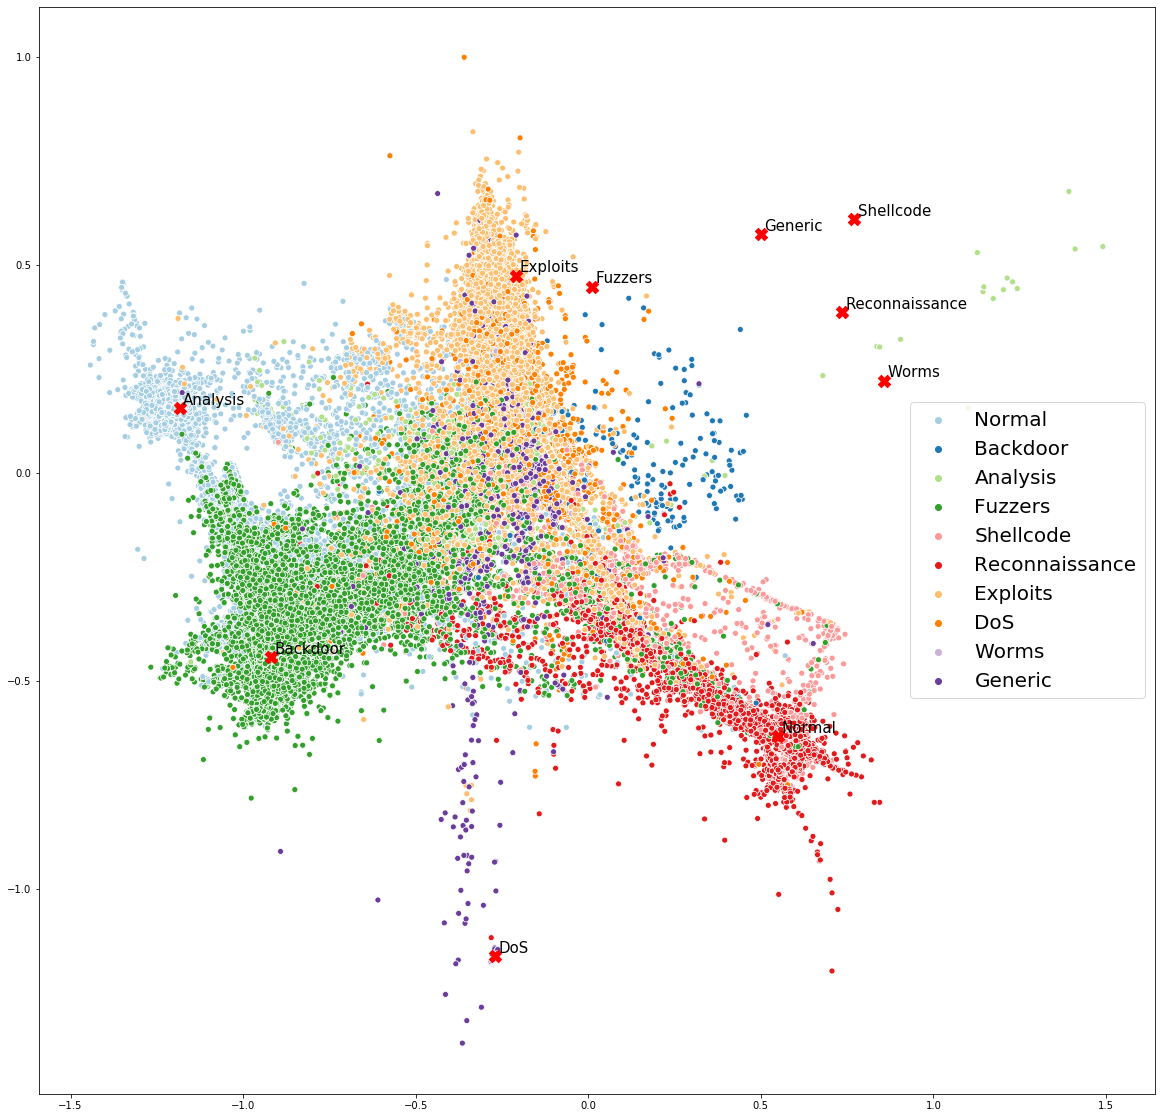

In [105]:
from matplotlib.colors import ListedColormap
#https://matplotlib.org/examples/color/colormaps_reference.html
import seaborn as sns

num_classes =['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic','Normal', 'Reconnaissance', 'Shellcode', 'Worms']

fig, ax = plt.subplots(figsize=(20,20))
s =sns.scatterplot(embedding_x_train[:,0],embedding_x_train[:,1], 
            hue=le4.inverse_transform(label_train),
            palette = "Paired")
plt.legend(loc='center right', prop={'size': 20})
plt.scatter(embedding_label_train[:,0],embedding_label_train[:,1], c="r", marker="X", s=150)
for i, txt in enumerate(num_classes):
    ax.annotate(txt, (embedding_label_train[i,0]+0.01, embedding_label_train[i,1]+0.01),fontsize=15)
plt.show()

#### Test set

In [106]:
embedding_x_test = np.array(model_embed_x.predict(x_test))
embedding_x_test

array([[-0.40187843, -0.29785022],
       [-0.71992272, -0.34861023],
       [-0.90912157, -0.42359584],
       ...,
       [-1.19277521,  0.15282154],
       [-1.19782747,  0.14897977],
       [-0.43718552, -0.26539532]])

In [107]:
embedding_label_test = np.array(model_embed_label(label_test))
embedding_label_test = np.unique(embedding_label_test, axis=0)
print(embedding_label_test)

[[-1.18382381  0.15529794]
 [-0.91992225 -0.44294012]
 [-0.26941468 -1.16189531]
 [-0.20934649  0.47351736]
 [ 0.00969321  0.44719263]
 [ 0.49955949  0.57314544]
 [ 0.54938578 -0.63375765]
 [ 0.73588037  0.385572  ]
 [ 0.77053565  0.6095044 ]
 [ 0.85635052  0.22077189]]


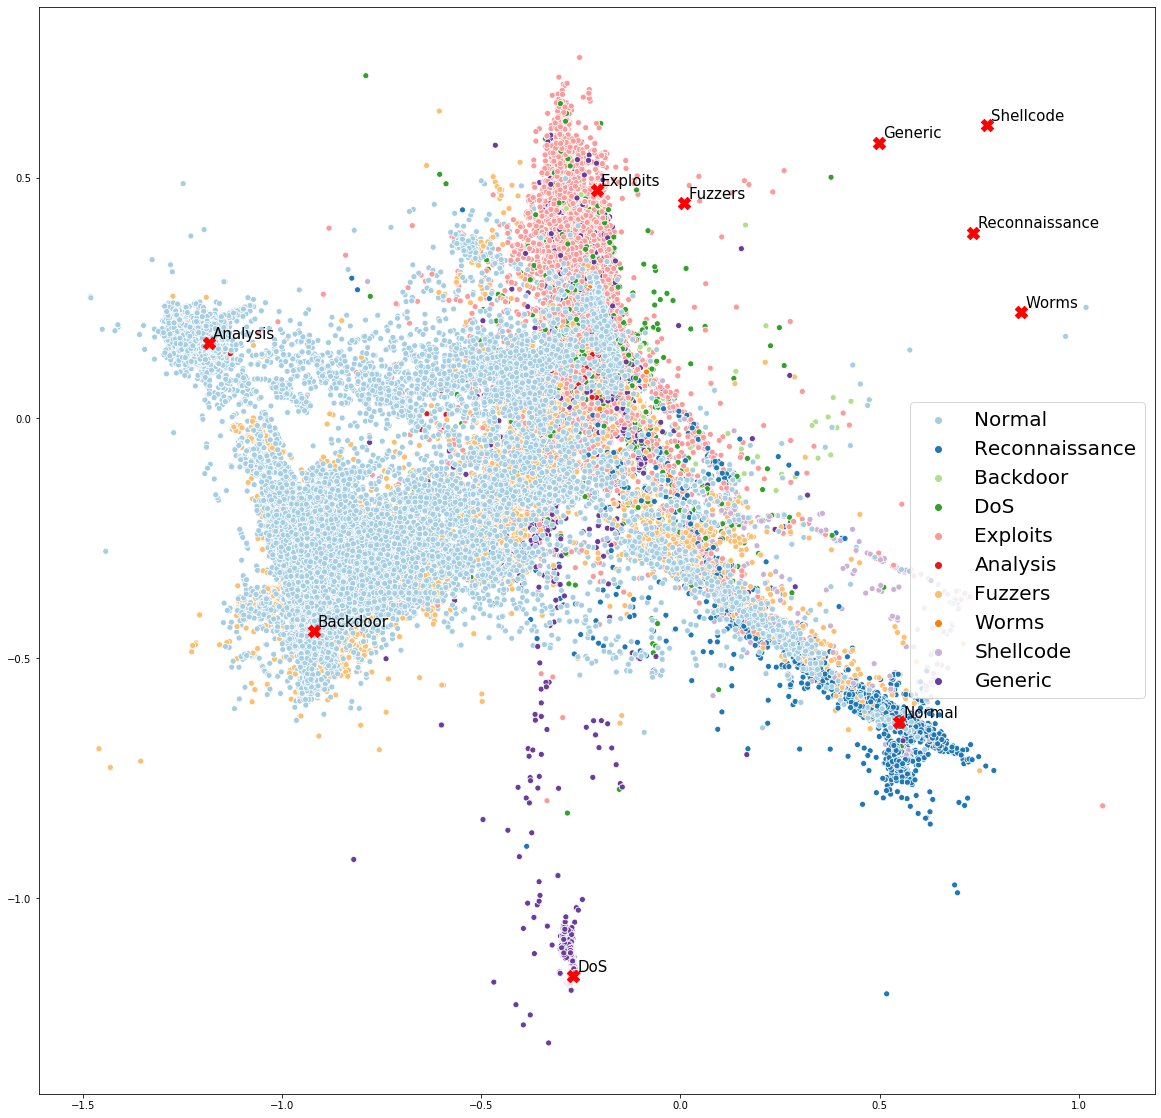

In [108]:
from matplotlib.colors import ListedColormap
#https://matplotlib.org/examples/color/colormaps_reference.html
import seaborn as sns

num_classes =['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic','Normal', 'Reconnaissance', 'Shellcode', 'Worms']

fig, ax = plt.subplots(figsize=(20,20))
s =sns.scatterplot(embedding_x_test[:,0],embedding_x_test[:,1], 
            hue=le4.inverse_transform(label_test),
            palette = "Paired")
plt.legend(loc='center right', prop={'size': 20})
plt.scatter(embedding_label_test[:,0],embedding_label_test[:,1], c="r", marker="X", s=150)
for i, txt in enumerate(num_classes):
    ax.annotate(txt, (embedding_label_test[i,0]+0.01, embedding_label_test[i,1]+0.01),fontsize=15)
plt.show()

### Cluster metrics

#### Training set

####  Metrics not based on knowing the ground-truth label

In [109]:
# metricas no basadas en conocer el groun-truth label
embedding_x_train = np.array(model_embed_x.predict(x_train))
embedding_x_train

t0 = time.time()

total_label_train =[np.tile(le4.transform([i]),(len(YTrainAN10MOhe),1)) for i in ['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic','Normal', 'Reconnaissance', 'Shellcode', 'Worms']]
ytrain_dist_hat = np.column_stack([model.predict([XTrainM,i]) for i in total_label_train])
ytrain_hat = le4.inverse_transform(labelOHEncodedFromDistances(ytrain_dist_hat))

t1 = time.time()
print("Minutes elapsed: %f" % ((t1 - t0) / 60.))



Minutes elapsed: 0.780144


In [110]:
t0 = time.time()
cal_hara_score = metrics.calinski_harabasz_score(embedding_x_train, ytrain_hat)
t1 = time.time()
print("Minutes elapsed: %f" % ((t1 - t0) / 60.))

t0 = time.time()
d_b_score = metrics.davies_bouldin_score(embedding_x_train, ytrain_hat)
t1 = time.time()
print("Minutes elapsed: %f" % ((t1 - t0) / 60.))

t0 = time.time()
sil_score = metrics.silhouette_score(embedding_x_train, ytrain_hat, metric='euclidean')
t1 = time.time()
print("Minutes elapsed: %f" % ((t1 - t0) / 60.))

Minutes elapsed: 0.001102
Minutes elapsed: 0.001338
Minutes elapsed: 7.765113


In [111]:
no_labels_cluster_metrics = pd.DataFrame({'silhouette_score': sil_score,
                              'calinski_harabasz_score': cal_hara_score,
                              'davies_bouldin_score':d_b_score},index=[1])
no_labels_cluster_metrics

silhouette_score  calinski_harabasz_score  davies_bouldin_score
1          0.767431            581955.288951              0.681184

####   Metrics based on knowing the ground-truth label

In [112]:
a_r_score = metrics.adjusted_rand_score(y_train, ytrain_hat)
a_m_i_score = metrics.adjusted_mutual_info_score(y_train, ytrain_hat)  
n_m_i_score = metrics.normalized_mutual_info_score(y_train, ytrain_hat)  
fo_ma_score = metrics.fowlkes_mallows_score(y_train, ytrain_hat)  
homo_score = metrics.homogeneity_score(y_train, ytrain_hat) 
comple_score =metrics.completeness_score(y_train, ytrain_hat)  
v_meas_score = metrics.v_measure_score(y_train, ytrain_hat)  

d:\anaconda\envs\tensorflow2-new\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
d:\anaconda\envs\tensorflow2-new\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


In [113]:
labels_cluster_metrics = pd.DataFrame({'adjusted_rand_score': a_r_score,
                              'adjusted_mutual_info_score': a_m_i_score,
                              'normalized_mutual_info_score':n_m_i_score,
                             'fowlkes_mallows_score':fo_ma_score,
                              'homogeneity_score':homo_score,
                              'completeness_score':comple_score,
                             'v_measure_score':v_meas_score,
                                      }
                                      ,index=[1])
labels_cluster_metrics

adjusted_rand_score  adjusted_mutual_info_score  \
1             0.688449                    0.671572   

   normalized_mutual_info_score  fowlkes_mallows_score  homogeneity_score  \
1                      0.677021               0.751681           0.671611   

   completeness_score  v_measure_score  
1            0.682475         0.676999

#### Test set

####  Metrics not based on knowing the ground-truth label

In [114]:
t0 = time.time()
cal_hara_score = metrics.calinski_harabasz_score(embedding_x_test, y_test_hat)
t1 = time.time()
print("Minutes elapsed: %f" % ((t1 - t0) / 60.))

t0 = time.time()
d_b_score = metrics.davies_bouldin_score(embedding_x_test, y_test_hat)
t1 = time.time()
print("Minutes elapsed: %f" % ((t1 - t0) / 60.))

t0 = time.time()
sil_score = metrics.silhouette_score(embedding_x_test, y_test_hat, metric='euclidean')
t1 = time.time()
print("Minutes elapsed: %f" % ((t1 - t0) / 60.))

Minutes elapsed: 0.000540
Minutes elapsed: 0.000537
Minutes elapsed: 1.803061


In [115]:
no_labels_cluster_metrics = pd.DataFrame({'silhouette_score': sil_score,
                              'calinski_harabasz_score': cal_hara_score,
                              'davies_bouldin_score':d_b_score},index=[1])
no_labels_cluster_metrics

silhouette_score  calinski_harabasz_score  davies_bouldin_score
1          0.698648            220803.552808                0.9268

####   Metrics based on knowing the ground-truth label

In [116]:
a_r_score = metrics.adjusted_rand_score(y_test, y_test_hat)
a_m_i_score = metrics.adjusted_mutual_info_score(y_test, y_test_hat) 
n_m_i_score = metrics.normalized_mutual_info_score(y_test, y_test_hat) 
fo_ma_score = metrics.fowlkes_mallows_score(y_test, y_test_hat) 
homo_score = metrics.homogeneity_score(y_test, y_test_hat)
comple_score =metrics.completeness_score(y_test, y_test_hat)
v_meas_score = metrics.v_measure_score(y_test, y_test_hat) 

d:\anaconda\envs\tensorflow2-new\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
d:\anaconda\envs\tensorflow2-new\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


In [117]:
labels_cluster_metrics = pd.DataFrame({'adjusted_rand_score': a_r_score,
                              'adjusted_mutual_info_score': a_m_i_score,
                              'normalized_mutual_info_score':n_m_i_score,
                             'fowlkes_mallows_score':fo_ma_score,
                              'homogeneity_score':homo_score,
                              'completeness_score':comple_score,
                             'v_measure_score':v_meas_score,
                                      }
                                      ,index=[1])
labels_cluster_metrics

adjusted_rand_score  adjusted_mutual_info_score  \
1             0.548338                    0.557082   

   normalized_mutual_info_score  fowlkes_mallows_score  homogeneity_score  \
1                      0.584879               0.663831            0.61395   

   completeness_score  v_measure_score  
1            0.557185         0.584192

## 3.3 Model: 10 labels, RLB-CL, E2NMS, Embed dim: 2, Distance: Euclidean

In [ ]:
le = LabelEncoder()
index_label_train = le.fit_transform (YTrainAN10)
index_label_test = le.transform (YTestAN10)

print(le4.transform(['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic','Normal', 'Reconnaissance', 'Shellcode', 'Worms']))
print(le.transform(['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic','Normal', 'Reconnaissance', 'Shellcode', 'Worms']))

x_train, x_test, label_train, label_test, y_train, y_test = XTrainM, XTestM, \
                                                            YTrainAN10MOhe, YTestAN10MOhe,\
                                                            np.zeros(len(XTrainM)), np.zeros(len(XTestM))
print (x_train.shape, x_test.shape, label_train.shape, label_test.shape, y_train.shape, y_test.shape)


In [ ]:
# save the best weights for predicting the test question pairs
file_name = 'CLC_ADFA_3_cplet dim2 v1.1'
save_best_weights = file_name + '_best.h5'
save_last_weights = file_name + '_last.h5'
save_summary_stats = file_name + '.csv'

in_dim_x = x_train.shape[1]
in_dim_label = label_train.shape[1]
out_dim = 1 # yes, no

print(in_dim_x)
print(in_dim_label)
print(out_dim)

### Prepare the model

In [93]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [94]:
vocab_size = in_dim_label  
embed_dim = 2

list_labels = ['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic','Normal', 'Reconnaissance', 'Shellcode', 'Worms']

def create_all_labels(in_x):
  sal = tf.cast(tf.reshape(tf.tile(le4.transform(list_labels),
                                  [tf.shape(in_x)[0],1]),[-1,in_dim_label,in_dim_label]), 
                                   dtype=tf.float64)
  return sal


def create_model(in_dim_x,in_dim_label,embed_dim):
    
    #input X
    in_x = Input(shape=(in_dim_x,))  
    
    # Integer vector with range [0,in_dim_label-1] and length equal to X.shape[0]. Index of the correct label
    in_index_label = Input(shape=(1,),dtype=tf.int32) 
    
    in_labels = Lambda(lambda x : create_all_labels(x))(in_x) # to allow saving the weigths
    
    
    #working lists
    lst_labels=[]
    lst_dist=[]

    #embedding labels
    for i in range(in_dim_label):
        lst_labels.append(Dense(10, activation='relu')(in_labels[:,:,i]))
        lst_labels[i] = Dense(embed_dim, activation='linear')(lst_labels[i])

    #embedding of x
    u = Dense (100, activation='relu')(in_x)
    u = Dense (50, activation='relu')(u)
    x_embed = Dense(embed_dim,activation='linear')(u)

    # similarity measure
    for i in range(in_dim_label):
        lst_dist.append(Lambda(euclidean_distance,output_shape=eucl_dist_output_shape)([x_embed, lst_labels[i]]))

    mat_dist = tf.squeeze(tf.stack(lst_dist, axis=1))
    one_hot_mask = tf.reshape(tf.one_hot(in_index_label, in_dim_label, on_value = True, off_value = False, 
                                         axis = 1, dtype = tf.bool),(-1,in_dim_label))
    one_hot_mask_neg = tf.logical_not(one_hot_mask)
    dist_to_true = tf.boolean_mask(mat_dist, one_hot_mask)
    dist_to_false = tf.reshape(tf.boolean_mask(mat_dist, one_hot_mask_neg),(-1,in_dim_label-1))
    min_dist_to_false = tf.reduce_min(dist_to_false, axis = 1)
    out = tf.reshape(tf.exp(dist_to_true - min_dist_to_false),(-1,1))
    
    # model outputs
    m = Model(inputs=[in_x,in_index_label],outputs= out) # loss
    m_embed_x = Model(inputs=in_x, outputs= x_embed)  # embedding of x
    m_embed_labels = Model(inputs=in_x, outputs= lst_labels) #embedding of labels
    m_mat_dist = Model(inputs=in_x, outputs= mat_dist) # matrix of distances between x and labels
    m_lst_dist = Model(inputs=in_x, outputs= lst_dist) # list of distances between x and labels

    m.compile(loss='mse', optimizer=Adam(0.001), metrics=['mse'])
    return(m, m_embed_x , m_embed_labels, m_mat_dist, m_lst_dist)

In [95]:
#create model
model, model_embed_x , model_embed_labels, model_mat_dist, model_lst_dist = create_model(in_dim_x, in_dim_label, embed_dim) 

In [99]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 196)]        0                                            
__________________________________________________________________________________________________
lambda (Lambda)                 (None, 10, 10)       0           input_1[0][0]                    
__________________________________________________________________________________________________
dense_20 (Dense)                (None, 100)          19700       input_1[0][0]                    
__________________________________________________________________________________________________
tf_op_layer_strided_slice (Tens [(None, 10)]         0           lambda[0][0]                     
______________________________________________________________________________________________

In [100]:
model_embed_x.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 196)]             0         
_________________________________________________________________
dense_20 (Dense)             (None, 100)               19700     
_________________________________________________________________
dense_21 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_22 (Dense)             (None, 2)                 102       
Total params: 24,852
Trainable params: 24,852
Non-trainable params: 0
_________________________________________________________________


In [101]:
model_embed_labels.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 196)]        0                                            
__________________________________________________________________________________________________
lambda (Lambda)                 (None, 10, 10)       0           input_1[0][0]                    
__________________________________________________________________________________________________
tf_op_layer_strided_slice (Tens [(None, 10)]         0           lambda[0][0]                     
__________________________________________________________________________________________________
tf_op_layer_strided_slice_1 (Te [(None, 10)]         0           lambda[0][0]                     
____________________________________________________________________________________________

###  Training

In [103]:
t0 = time.time()
# Train the model
callbacks = [ModelCheckpoint(save_best_weights, monitor='val_loss', save_best_only=True, mode='auto'),
             EarlyStopping(monitor='val_loss', patience=20, verbose=1, mode='auto')
            ]

history = model.fit([x_train,index_label_train],y_train,
                    batch_size=50,
                    epochs=100,
                    validation_split=0.2,
                    verbose=1,
                    shuffle=True,
                    initial_epoch = 0,
                    callbacks=callbacks)
t1 = time.time()
print("Minutes elapsed: %f" % ((t1 - t0) / 60.))

Train on 140272 samples, validate on 35069 samples
Epoch 1/100
140272/140272 [==============================] - 8s 59us/sample - loss: 0.6567 - mean_squared_error: 0.6567 - val_loss: 0.3177 - val_mean_squared_error: 0.3177
Epoch 2/100
140272/140272 [==============================] - 8s 55us/sample - loss: 0.6010 - mean_squared_error: 0.6010 - val_loss: 0.3048 - val_mean_squared_error: 0.3048
Epoch 3/100
140272/140272 [==============================] - 8s 54us/sample - loss: 0.5788 - mean_squared_error: 0.5788 - val_loss: 0.2816 - val_mean_squared_error: 0.2816
Epoch 4/100
140272/140272 [==============================] - 7s 52us/sample - loss: 0.5765 - mean_squared_error: 0.5765 - val_loss: 0.2751 - val_mean_squared_error: 0.2751
Epoch 5/100
140272/140272 [==============================] - 7s 51us/sample - loss: 0.5683 - mean_squared_error: 0.5683 - val_loss: 0.2738 - val_mean_squared_error: 0.2738
Epoch 6/100
140272/140272 [==============================] - 7s 50us/sample - loss: 0.564

### Inference

In [107]:
model.load_weights(save_best_weights)

In [110]:
t0 = time.time()

y_test_hat = le4.inverse_transform(labelOHEncodedFromDistances(model_mat_dist.predict(x_test)))

t1 = time.time()
print("Minutes elapsed: %f" % ((t1 - t0) / 60.))
print(y_test_hat)

Minutes elapsed: 0.034334
['Normal' 'Fuzzers' 'Fuzzers' ... 'Normal' 'Normal' 'Normal']


In [111]:
#Obtain probabilities
ytest_dist_hat = model_mat_dist.predict(x_test)
ytest_prob_hat = (ytest_dist_hat-np.min(ytest_dist_hat))/(np.max(ytest_dist_hat)-np.min(ytest_dist_hat)) # escalamos 0-1
ytest_prob_hat = normalize(ytest_prob_hat, axis=1, norm='l1')
ytest_prob_hat=  1 - ytest_prob_hat

In [112]:
average_type = 'weighted' # micro' , 'weighted'
print('Performance measures on Test data')
print('Accuracy =  {}'.format(accuracy_score( le4.inverse_transform(YTestAN10MOhe),y_test_hat)))

print('F1 =  {}'.format(f1_score(le4.inverse_transform(YTestAN10MOhe),y_test_hat, average=average_type)))

print('Precision_score =  {}'.format(precision_score(le4.inverse_transform(YTestAN10MOhe),y_test_hat, average=average_type)))

print('recall_score =  {}'.format(recall_score(le4.inverse_transform(YTestAN10MOhe),y_test_hat, average=average_type)))

print('roc_auc_score =  {}'.format(roc_auc_score(YTestAN10MOhe,ytest_prob_hat)))

print('matthews_corr_score =  {}'.format(matthews_corrcoef(le4.inverse_transform(YTestAN10MOhe), y_test_hat)))

Performance measures on Test data
Accuracy =  0.7494169946072001


d:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


F1 =  0.7215332206239586


d:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Precision_score =  0.7108794846554193
recall_score =  0.7494169946072001
roc_auc_score =  0.6158358982748455
matthews_corr_score =  0.654641639295342


### Perform test evaluation one vs. rest

In [ ]:
yt_app = le4.inverse_transform(YTestAN10MOhe)
perf_per_class = pd.DataFrame(index=range(len(pd.Series(le4.inverse_transform(YTestAN10MOhe)).unique())),columns=['name', 'acc','f1', 'pre','rec'])
for i,x in enumerate(pd.Series(le4.inverse_transform(YTestAN10MOhe)).value_counts().index):
    y_test_hat_check = y_test_hat.copy()
    y_test_hat_check[y_test_hat_check != x] = 'OTHER'
    yt_app = le4.inverse_transform(YTestAN10MOhe).copy()
    yt_app[yt_app != x] = 'OTHER'
    ac=accuracy_score( yt_app,y_test_hat_check)
    f1=f1_score( yt_app,y_test_hat_check,pos_label=x, average='binary')
    pr=precision_score( yt_app,y_test_hat_check,pos_label=x, average='binary')
    re=recall_score( yt_app,y_test_hat_check,pos_label=x, average='binary')
    perf_per_class.iloc[i]=[x,ac,f1,pr,re]

In [115]:
# performance measures per class for test data
perf_per_class

name       acc         f1        pre        rec
0          Normal  0.875638   0.860726   0.866418   0.855108
1         Generic  0.991085   0.980173   0.999669   0.961422
2        Exploits  0.870986   0.660942   0.512626   0.930022
3         Fuzzers  0.897913   0.258622   0.277915   0.241834
4             DoS  0.930112  0.0260664   0.042331   0.018831
5  Reconnaissance  0.957526          0          0          0
6        Analysis  0.987781  0.0437262  0.0613333  0.0339734
7        Backdoor  0.992919          0          0          0
8       Shellcode  0.995409          0          0          0
9           Worms  0.999466          0          0          0

###  Cluster visualization 

#### Training set

In [116]:
num_classes = ['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic','Normal', 'Reconnaissance', 'Shellcode', 'Worms']

In [117]:
embedding_x_train = np.array(model_embed_x.predict(x_train))
embedding_x_train

array([[ 0.43598366,  0.22862957],
       [ 0.47476718,  0.18840476],
       [ 0.6887767 , -0.16618655],
       ...,
       [ 4.58460547,  0.28458279],
       [ 5.10930182,  0.6982287 ],
       [ 5.14774815,  0.72712358]])

In [118]:
embedding_label_train = np.array(model_embed_labels.predict(x_train))
embedding_label_train = np.stack(embedding_label_train, axis=1)[0,:,:]
print(embedding_label_train)

[[ 1.03762761  3.21048328]
 [-2.1276778  -1.39455095]
 [-2.10020323 -1.38824597]
 [ 1.05922423 -2.69413865]
 [ 0.25177072  3.26546059]
 [ 3.14020496  1.6926024 ]
 [-2.29722367  1.54369783]
 [-2.11222036 -1.38309132]
 [ 1.04867121  3.22476748]
 [-2.12048155 -1.41303781]]


d:\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


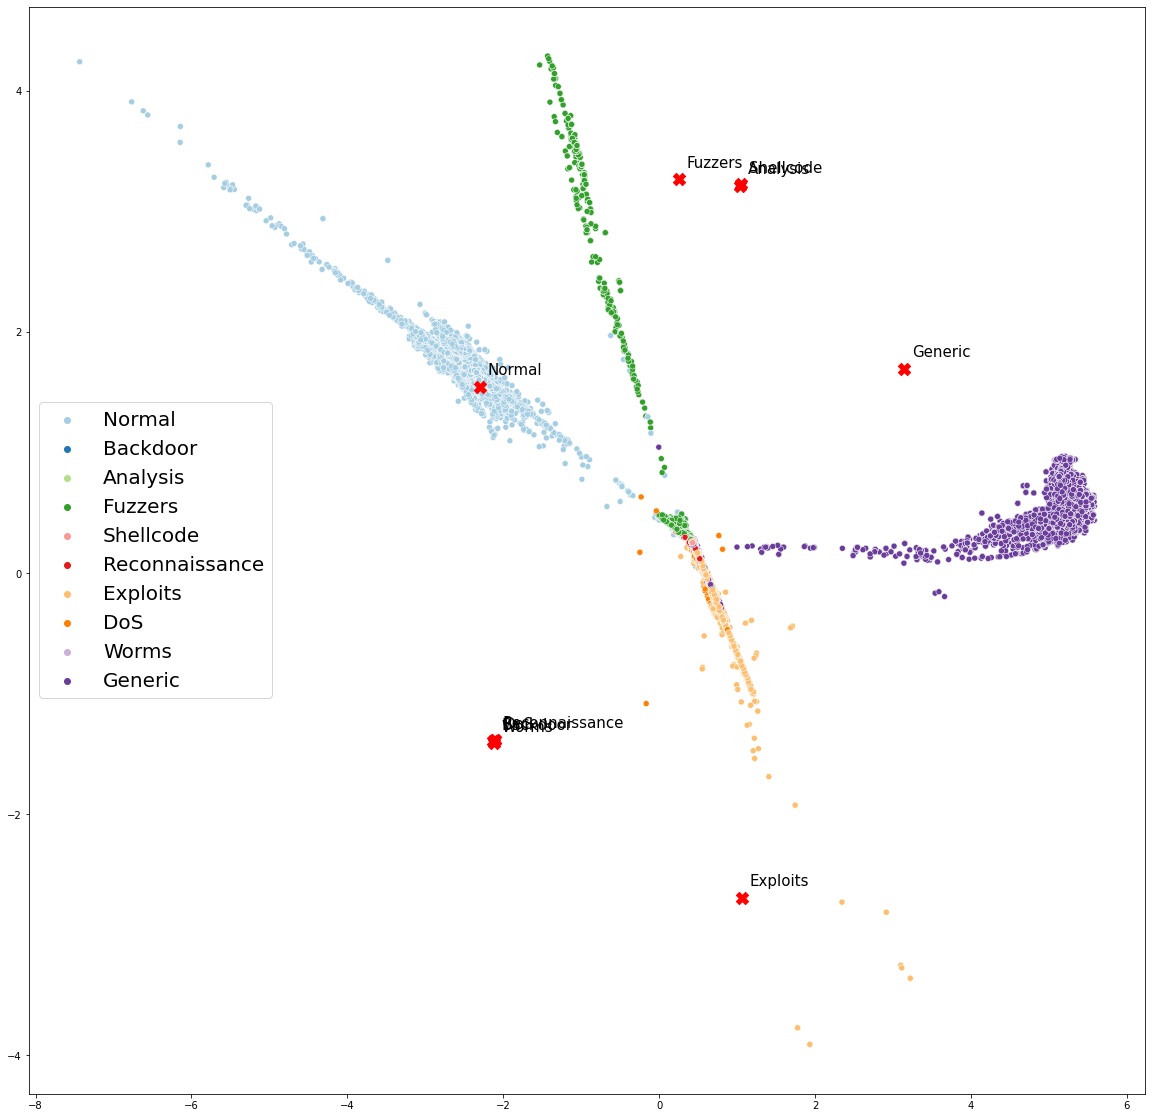

In [119]:
from matplotlib.colors import ListedColormap
#https://matplotlib.org/examples/color/colormaps_reference.html
import seaborn as sns

fig, ax = plt.subplots(figsize=(20,20))
s =sns.scatterplot(embedding_x_train[:,0],embedding_x_train[:,1], 
            hue=le4.inverse_transform(label_train),
            palette = "Paired")
plt.legend(loc='center left', prop={'size': 20})
plt.scatter(embedding_label_train[:,0],embedding_label_train[:,1], c="r", marker="X", s=150)
for i, txt in enumerate(num_classes):
    ax.annotate(txt, (embedding_label_train[i,0]+0.1, embedding_label_train[i,1]+0.1),fontsize=15)
plt.show()

#### Test set

In [121]:
embedding_x_test = np.array(model_embed_x.predict(x_test))
embedding_x_test

array([[ 0.42611386,  0.25865591],
       [ 0.43238596,  0.26165197],
       [ 0.42909358,  0.26411327],
       ...,
       [-2.31215016,  1.60212882],
       [-2.31432435,  1.60839382],
       [ 0.42375526,  0.26308649]])

In [122]:
embedding_label_test = np.array(model_embed_labels.predict(x_test))
embedding_label_test = np.stack(embedding_label_test, axis=1)[0,:,:]
print(embedding_label_test)

[[ 1.03762761  3.21048328]
 [-2.1276778  -1.39455095]
 [-2.10020323 -1.38824597]
 [ 1.05922423 -2.69413865]
 [ 0.25177072  3.26546059]
 [ 3.14020496  1.6926024 ]
 [-2.29722367  1.54369783]
 [-2.11222036 -1.38309132]
 [ 1.04867121  3.22476748]
 [-2.12048155 -1.41303781]]


d:\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


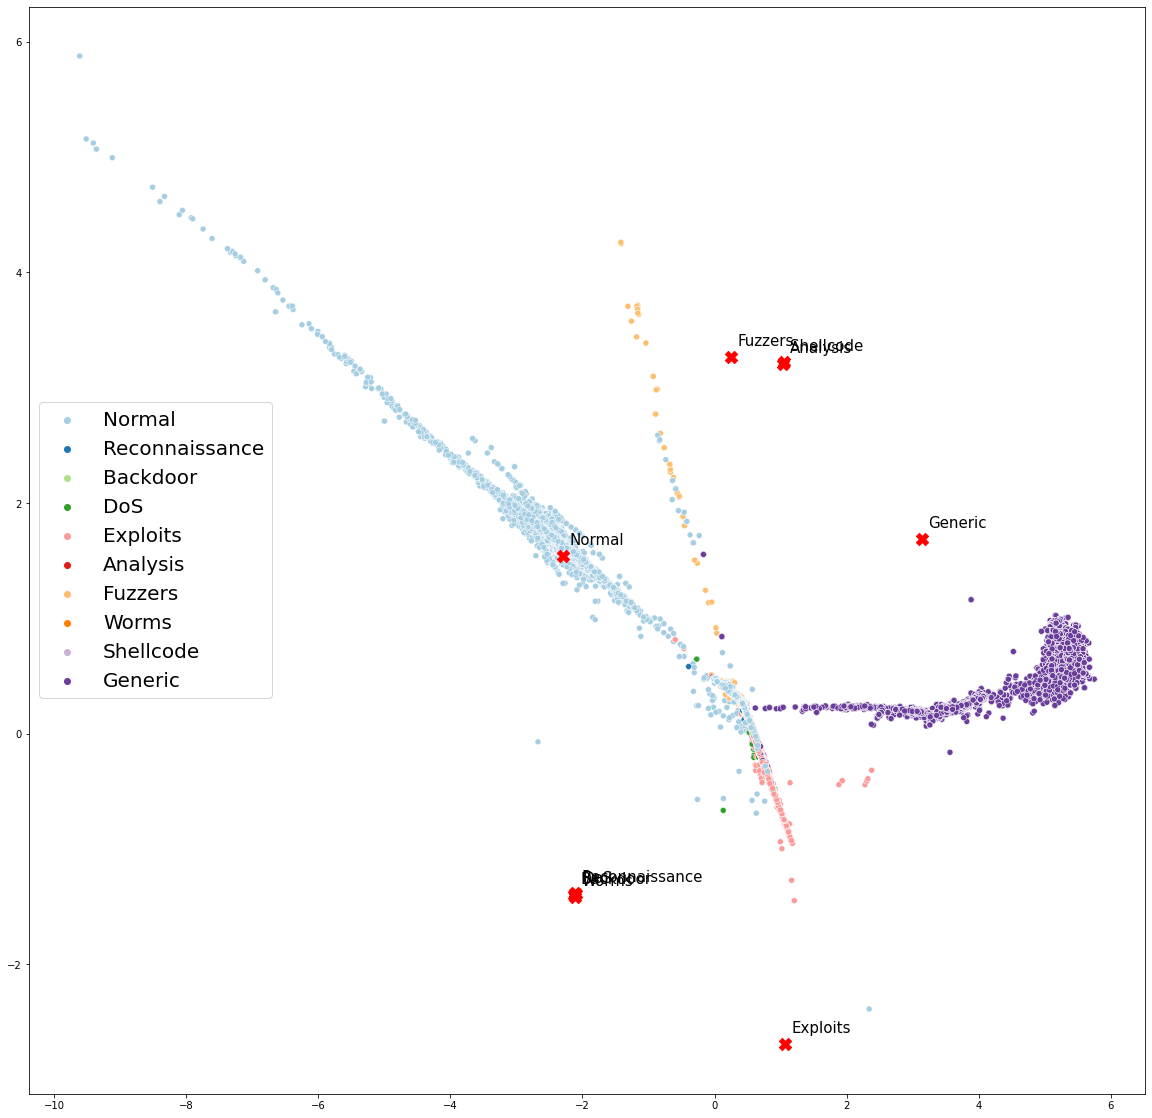

In [123]:
from matplotlib.colors import ListedColormap
#https://matplotlib.org/examples/color/colormaps_reference.html
import seaborn as sns

fig, ax = plt.subplots(figsize=(20,20))
s =sns.scatterplot(embedding_x_test[:,0],embedding_x_test[:,1], 
            hue=le4.inverse_transform(label_test),
            palette = "Paired")
plt.legend(loc='center left', prop={'size': 20})
plt.scatter(embedding_label_test[:,0],embedding_label_test[:,1], c="r", marker="X", s=150)
for i, txt in enumerate(num_classes):
    ax.annotate(txt, (embedding_label_test[i,0]+0.1, embedding_label_test[i,1]+0.1),fontsize=15)
plt.show()

### Cluster metrics

In [124]:
y_test = le4.inverse_transform(YTestAN10MOhe)
x_test = XTestM
x_train = XTrainM
label_train = YTrainAN10MOhe
label_test = YTestAN10MOhe
y_train = le4.inverse_transform(YTrainAN10MOhe)


#### Training set

####  Metrics not based on knowing the ground-truth label

In [125]:
# metricas no basadas en conocer el groun-truth label
embedding_x_train = np.array(model_embed_x.predict(x_train))
embedding_x_train

t0 = time.time()

ytrain_hat = le4.inverse_transform(labelOHEncodedFromDistances(model_mat_dist.predict(x_train)))

t1 = time.time()
print("Minutes elapsed: %f" % ((t1 - t0) / 60.))



Minutes elapsed: 0.073253


In [126]:
t0 = time.time()
cal_hara_score = metrics.calinski_harabasz_score(embedding_x_train, ytrain_hat)
t1 = time.time()
print("Minutes elapsed: %f" % ((t1 - t0) / 60.))

t0 = time.time()
d_b_score = metrics.davies_bouldin_score(embedding_x_train, ytrain_hat)
t1 = time.time()
print("Minutes elapsed: %f" % ((t1 - t0) / 60.))

t0 = time.time()
sil_score = metrics.silhouette_score(embedding_x_train, ytrain_hat, metric='euclidean')
t1 = time.time()
print("Minutes elapsed: %f" % ((t1 - t0) / 60.))

Minutes elapsed: 0.000831
Minutes elapsed: 0.000775
Minutes elapsed: 5.981764


In [127]:
no_labels_cluster_metrics = pd.DataFrame({'silhouette_score': sil_score,
                              'calinski_harabasz_score': cal_hara_score,
                              'davies_bouldin_score':d_b_score},index=[1])
no_labels_cluster_metrics

silhouette_score  calinski_harabasz_score  davies_bouldin_score
1          0.020893            253982.060681              1.343775

####   Metrics based on knowing the ground-truth label

In [128]:
a_r_score = metrics.adjusted_rand_score(y_train, ytrain_hat)
a_m_i_score = metrics.adjusted_mutual_info_score(y_train, ytrain_hat)  
n_m_i_score = metrics.normalized_mutual_info_score(y_train, ytrain_hat)  
fo_ma_score = metrics.fowlkes_mallows_score(y_train, ytrain_hat)  
homo_score = metrics.homogeneity_score(y_train, ytrain_hat) 
comple_score =metrics.completeness_score(y_train, ytrain_hat)  
v_meas_score = metrics.v_measure_score(y_train, ytrain_hat)  

d:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
d:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


In [129]:
labels_cluster_metrics = pd.DataFrame({'adjusted_rand_score': a_r_score,
                              'adjusted_mutual_info_score': a_m_i_score,
                              'normalized_mutual_info_score':n_m_i_score,
                             'fowlkes_mallows_score':fo_ma_score,
                              'homogeneity_score':homo_score,
                              'completeness_score':comple_score,
                             'v_measure_score':v_meas_score,
                                      }
                                      ,index=[1])
labels_cluster_metrics

adjusted_rand_score  adjusted_mutual_info_score  \
1             0.634866                    0.550743   

   normalized_mutual_info_score  fowlkes_mallows_score  homogeneity_score  \
1                       0.63004               0.735564           0.550777   

   completeness_score  v_measure_score  
1             0.72071         0.624387

#### Test set

####  Metrics not based on knowing the ground-truth label

In [130]:
t0 = time.time()
cal_hara_score = metrics.calinski_harabasz_score(embedding_x_test, y_test_hat)
t1 = time.time()
print("Minutes elapsed: %f" % ((t1 - t0) / 60.))

t0 = time.time()
d_b_score = metrics.davies_bouldin_score(embedding_x_test, y_test_hat)
t1 = time.time()
print("Minutes elapsed: %f" % ((t1 - t0) / 60.))

t0 = time.time()
sil_score = metrics.silhouette_score(embedding_x_test, y_test_hat, metric='euclidean')
t1 = time.time()
print("Minutes elapsed: %f" % ((t1 - t0) / 60.))

Minutes elapsed: 0.000399
Minutes elapsed: 0.000465
Minutes elapsed: 1.269427


In [131]:
no_labels_cluster_metrics = pd.DataFrame({'silhouette_score': sil_score,
                              'calinski_harabasz_score': cal_hara_score,
                              'davies_bouldin_score':d_b_score},index=[1])
no_labels_cluster_metrics

silhouette_score  calinski_harabasz_score  davies_bouldin_score
1         -0.138142             52118.801467               1.20682

####   Metrics based on knowing the ground-truth label

In [132]:
a_r_score = metrics.adjusted_rand_score(y_test, y_test_hat)
a_m_i_score = metrics.adjusted_mutual_info_score(y_test, y_test_hat) 
n_m_i_score = metrics.normalized_mutual_info_score(y_test, y_test_hat) 
fo_ma_score = metrics.fowlkes_mallows_score(y_test, y_test_hat) 
homo_score = metrics.homogeneity_score(y_test, y_test_hat)
comple_score =metrics.completeness_score(y_test, y_test_hat)
v_meas_score = metrics.v_measure_score(y_test, y_test_hat) 

d:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
d:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


In [133]:
labels_cluster_metrics = pd.DataFrame({'adjusted_rand_score': a_r_score,
                              'adjusted_mutual_info_score': a_m_i_score,
                              'normalized_mutual_info_score':n_m_i_score,
                             'fowlkes_mallows_score':fo_ma_score,
                              'homogeneity_score':homo_score,
                              'completeness_score':comple_score,
                             'v_measure_score':v_meas_score,
                                      }
                                      ,index=[1])
labels_cluster_metrics

adjusted_rand_score  adjusted_mutual_info_score  \
1             0.629181                    0.533949   

   normalized_mutual_info_score  fowlkes_mallows_score  homogeneity_score  \
1                      0.577209               0.739631           0.534038   

   completeness_score  v_measure_score  
1            0.623871          0.57547

## 3.4 Model: 10 labels, RLB-CL, ENMS, Embed dim: 2, Distance: Euclidean

In [262]:
le = LabelEncoder()
index_label_train = le.fit_transform (YTrainAN10)
index_label_test = le.transform (YTestAN10)

print(le4.transform(['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic','Normal', 'Reconnaissance', 'Shellcode', 'Worms']))
print(le.transform(['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic','Normal', 'Reconnaissance', 'Shellcode', 'Worms']))

x_train, x_test, label_train, label_test, y_train, y_test = XTrainM, XTestM, \
                                                            YTrainAN10MOhe, YTestAN10MOhe,\
                                                            np.zeros(len(XTrainM)), np.zeros(len(XTestM))
print (x_train.shape, x_test.shape, label_train.shape, label_test.shape, y_train.shape, y_test.shape)


[[1 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 1]]
[0 1 2 3 4 5 6 7 8 9]
(175341, 196) (82332, 196) (175341, 10) (82332, 10) (175341,) (82332,)


In [264]:
# save the best weights for predicting the test question pairs
file_name = 'CLC_ADFA_3_cplet dim2_v10 v1.1'
save_best_weights = file_name + '_best.h5'
save_last_weights = file_name + '_last.h5'
save_summary_stats = file_name + '.csv'

in_dim_x = x_train.shape[1]
in_dim_label = label_train.shape[1]
out_dim = 1 # yes, no

print(in_dim_x)
print(in_dim_label)
print(out_dim)

196
10
1


### Prepare the model

In [266]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [267]:
vocab_size = in_dim_label  
embed_dim = 2

list_labels = ['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic','Normal', 'Reconnaissance', 'Shellcode', 'Worms']

def create_all_labels(in_x):
  sal = tf.cast(tf.reshape(tf.tile(le4.transform(list_labels),
                                  [tf.shape(in_x)[0],1]),[-1,in_dim_label,in_dim_label]), 
                                   dtype=tf.float64)
  return sal


def create_model(in_dim_x,in_dim_label,embed_dim):
    
    #input X
    in_x = Input(shape=(in_dim_x,))  
    
    # Integer vector with range [0,in_dim_label-1] and length equal to X.shape[0]. Index of the correct label
    in_index_label = Input(shape=(1,),dtype=tf.int32) 
    
    in_labels = Lambda(lambda x : create_all_labels(x))(in_x) # to allow saving the weigths
    
    
    #working lists
    lst_labels=[]
    lst_dist=[]

    #embedding labels
    for i in range(in_dim_label):
        lst_labels.append(Dense(10, activation='relu')(in_labels[:,:,i]))
        lst_labels[i] = Dense(embed_dim, activation='linear')(lst_labels[i])

    #embedding of x
    u = Dense (100, activation='relu')(in_x)
    u = Dense (50, activation='relu')(u)
    x_embed = Dense(embed_dim,activation='linear')(u)

    # similarity measure
    for i in range(in_dim_label):
        lst_dist.append(Lambda(euclidean_distance,output_shape=eucl_dist_output_shape)([x_embed, lst_labels[i]]))

    mat_dist = tf.squeeze(tf.stack(lst_dist, axis=1))
    one_hot_mask = tf.reshape(tf.one_hot(in_index_label, in_dim_label, on_value = True, off_value = False, 
                                         axis = 1, dtype = tf.bool),(-1,in_dim_label))
    one_hot_mask_neg = tf.logical_not(one_hot_mask)
    dist_to_true = tf.boolean_mask(mat_dist, one_hot_mask)
    dist_to_false = tf.reshape(tf.boolean_mask(mat_dist, one_hot_mask_neg),(-1,in_dim_label-1))
    min_dist_to_false = tf.reduce_min(dist_to_false, axis = 1)
    out = tf.reshape(tf.exp(dist_to_true - min_dist_to_false),(-1,1))
    
    # model output
    m = Model(inputs=[in_x,in_index_label],outputs= out) # loss
    m_embed_x = Model(inputs=in_x, outputs= x_embed)  # embedding of x
    m_embed_labels = Model(inputs=in_x, outputs= lst_labels) #embedding of labels
    m_mat_dist = Model(inputs=in_x, outputs= mat_dist) # matrix of distances between x and labels
    m_lst_dist = Model(inputs=in_x, outputs= lst_dist) # list of distances between x and labels

    m.compile(loss=dummy_loss, optimizer=Adam(0.001), metrics=['mse'])
    return(m, m_embed_x , m_embed_labels, m_mat_dist, m_lst_dist)

In [268]:
#create model
model, model_embed_x , model_embed_labels, model_mat_dist, model_lst_dist = create_model(in_dim_x, in_dim_label, embed_dim) 

In [272]:
model.summary()

Model: "model_30"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            [(None, 196)]        0                                            
__________________________________________________________________________________________________
lambda_45 (Lambda)              (None, 10, 10)       0           input_9[0][0]                    
__________________________________________________________________________________________________
dense_116 (Dense)               (None, 100)          19700       input_9[0][0]                    
__________________________________________________________________________________________________
tf_op_layer_strided_slice_40 (T [(None, 10)]         0           lambda_45[0][0]                  
___________________________________________________________________________________________

In [273]:
model_embed_x.summary()

Model: "model_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 196)]             0         
_________________________________________________________________
dense_116 (Dense)            (None, 100)               19700     
_________________________________________________________________
dense_117 (Dense)            (None, 50)                5050      
_________________________________________________________________
dense_118 (Dense)            (None, 2)                 102       
Total params: 24,852
Trainable params: 24,852
Non-trainable params: 0
_________________________________________________________________


In [274]:
model_embed_labels.summary()

Model: "model_32"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            [(None, 196)]        0                                            
__________________________________________________________________________________________________
lambda_45 (Lambda)              (None, 10, 10)       0           input_9[0][0]                    
__________________________________________________________________________________________________
tf_op_layer_strided_slice_40 (T [(None, 10)]         0           lambda_45[0][0]                  
__________________________________________________________________________________________________
tf_op_layer_strided_slice_41 (T [(None, 10)]         0           lambda_45[0][0]                  
___________________________________________________________________________________________

###  Training

In [276]:
t0 = time.time()
# Train the model
callbacks = [ModelCheckpoint(save_best_weights, monitor='val_loss', save_best_only=True, mode='auto'),
             EarlyStopping(monitor='val_loss', patience=20, verbose=1, mode='auto')
            ]

history = model.fit([x_train,index_label_train],y_train,
                    batch_size=50,
                    epochs=100,
                    validation_split=0.2,
                    verbose=1,
                    shuffle=True,
                    initial_epoch = 0,
                    callbacks=callbacks)
t1 = time.time()
print("Minutes elapsed: %f" % ((t1 - t0) / 60.))

Train on 140272 samples, validate on 35069 samples
Epoch 1/100
140272/140272 [==============================] - 11s 80us/sample - loss: 0.6698 - mean_squared_error: 0.6781 - val_loss: 0.2979 - val_mean_squared_error: 0.2799
Epoch 2/100
140272/140272 [==============================] - 9s 68us/sample - loss: 0.5935 - mean_squared_error: 0.6359 - val_loss: 0.3049 - val_mean_squared_error: 0.8096
Epoch 3/100
140272/140272 [==============================] - 9s 68us/sample - loss: 0.5734 - mean_squared_error: 0.6344 - val_loss: 0.2903 - val_mean_squared_error: 0.5751
Epoch 4/100
140272/140272 [==============================] - 9s 67us/sample - loss: 0.5653 - mean_squared_error: 0.6348 - val_loss: 0.3001 - val_mean_squared_error: 0.8905
Epoch 5/100
140272/140272 [==============================] - 9s 66us/sample - loss: 0.5625 - mean_squared_error: 0.6547 - val_loss: 0.2943 - val_mean_squared_error: 0.7971
Epoch 6/100
140272/140272 [==============================] - 9s 66us/sample - loss: 0.55

140272/140272 [==============================] - 9s 64us/sample - loss: 0.5433 - mean_squared_error: 0.6429 - val_loss: 0.2695 - val_mean_squared_error: 1.3550
Epoch 49/100
140272/140272 [==============================] - 9s 65us/sample - loss: 0.5425 - mean_squared_error: 0.6105 - val_loss: 0.2596 - val_mean_squared_error: 0.4067
Epoch 50/100
140272/140272 [==============================] - 9s 65us/sample - loss: 0.5462 - mean_squared_error: 1.1849 - val_loss: 0.2719 - val_mean_squared_error: 1.0940
Epoch 51/100
140272/140272 [==============================] - 9s 64us/sample - loss: 0.5421 - mean_squared_error: 0.6107 - val_loss: 0.2885 - val_mean_squared_error: 5.1297
Epoch 52/100
140272/140272 [==============================] - 9s 65us/sample - loss: 0.5439 - mean_squared_error: 0.9723 - val_loss: 0.4728 - val_mean_squared_error: 1201.3047
Epoch 53/100
140272/140272 [==============================] - 9s 64us/sample - loss: 0.5435 - mean_squared_error: 0.6792 - val_loss: 0.2692 - val

### Inference

In [280]:
model.load_weights(save_best_weights)

In [283]:
t0 = time.time()

y_test_hat = le4.inverse_transform(labelOHEncodedFromDistances(model_mat_dist.predict(x_test)))

t1 = time.time()
print("Minutes elapsed: %f" % ((t1 - t0) / 60.))
print(y_test_hat)

Minutes elapsed: 0.050032
['Fuzzers' 'Fuzzers' 'Fuzzers' ... 'Normal' 'Normal' 'Fuzzers']


In [284]:
# Obtain probabilities
ytest_dist_hat = model_mat_dist.predict(x_test)
ytest_prob_hat = (ytest_dist_hat-np.min(ytest_dist_hat))/(np.max(ytest_dist_hat)-np.min(ytest_dist_hat)) # escalamos 0-1
ytest_prob_hat = normalize(ytest_prob_hat, axis=1, norm='l1')
ytest_prob_hat=  1 - ytest_prob_hat

In [285]:
average_type = 'weighted' # micro' , 'weighted'
print('Performance measures on Test data')
print('Accuracy =  {}'.format(accuracy_score( le4.inverse_transform(YTestAN10MOhe),y_test_hat)))

print('F1 =  {}'.format(f1_score(le4.inverse_transform(YTestAN10MOhe),y_test_hat, average=average_type)))

print('Precision_score =  {}'.format(precision_score(le4.inverse_transform(YTestAN10MOhe),y_test_hat, average=average_type)))

print('recall_score =  {}'.format(recall_score(le4.inverse_transform(YTestAN10MOhe),y_test_hat, average=average_type)))

print('roc_auc_score =  {}'.format(roc_auc_score(YTestAN10MOhe,ytest_prob_hat)))

print('matthews_corr_score =  {}'.format(matthews_corrcoef(le4.inverse_transform(YTestAN10MOhe), y_test_hat)))

Performance measures on Test data
Accuracy =  0.7311130544624205


d:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
d:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


F1 =  0.731334896199656
Precision_score =  0.749432927205344
recall_score =  0.7311130544624205
roc_auc_score =  0.7293512538226657
matthews_corr_score =  0.6419672565806513


### Perform test evaluation one vs. rest

In [ ]:
yt_app = le4.inverse_transform(YTestAN10MOhe)
perf_per_class = pd.DataFrame(index=range(len(pd.Series(le4.inverse_transform(YTestAN10MOhe)).unique())),columns=['name', 'acc','f1', 'pre','rec'])
for i,x in enumerate(pd.Series(le4.inverse_transform(YTestAN10MOhe)).value_counts().index):
    y_test_hat_check = y_test_hat.copy()
    y_test_hat_check[y_test_hat_check != x] = 'OTHER'
    yt_app = le4.inverse_transform(YTestAN10MOhe).copy()
    yt_app[yt_app != x] = 'OTHER'
    ac=accuracy_score( yt_app,y_test_hat_check)
    f1=f1_score( yt_app,y_test_hat_check,pos_label=x, average='binary')
    pr=precision_score( yt_app,y_test_hat_check,pos_label=x, average='binary')
    re=recall_score( yt_app,y_test_hat_check,pos_label=x, average='binary')
    perf_per_class.iloc[i]=[x,ac,f1,pr,re]

In [288]:
# performance measures per class for test data
perf_per_class

name       acc         f1       pre        rec
0          Normal  0.883496    0.86011   0.93411   0.796973
1         Generic  0.990478   0.978894  0.994856   0.963436
2        Exploits   0.88267   0.658537  0.542895   0.836777
3         Fuzzers  0.835896   0.244731  0.185085   0.361102
4             DoS  0.932614   0.268846  0.291512    0.24945
5  Reconnaissance  0.957538          0         0          0
6        Analysis  0.991777          0         0          0
7        Backdoor  0.992919          0         0          0
8       Shellcode  0.995409          0         0          0
9           Worms  0.999429  0.0408163       0.2  0.0227273

###  Cluster visualization 

#### Training set

In [289]:
num_classes = ['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic','Normal', 'Reconnaissance', 'Shellcode', 'Worms']

In [290]:
embedding_x_train = np.array(model_embed_x.predict(x_train))
embedding_x_train

array([[-0.1876882 ,  2.17550362],
       [-0.4454901 ,  2.32933143],
       [-0.96803063,  1.75539637],
       ...,
       [ 5.81781877,  1.62669236],
       [ 5.78995342,  1.61142615],
       [ 5.78436491,  1.61185846]])

In [291]:
embedding_label_train = np.array(model_embed_labels.predict(x_train))
embedding_label_train = np.stack(embedding_label_train, axis=1)[0,:,:]
print(embedding_label_train)

[[ 2.20367982 -2.97814569]
 [ 2.20921585 -2.99474061]
 [ 2.15515561 -2.97758282]
 [-3.2818527  -2.3673357 ]
 [ 3.24170427 -2.37962412]
 [ 5.74849399  1.59557842]
 [-2.50805021  7.38629242]
 [ 2.20085096 -2.9680964 ]
 [ 2.20799255 -2.98089715]
 [ 4.4933649   6.17644426]]


In [2]:
# imagen seleccionada

d:\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


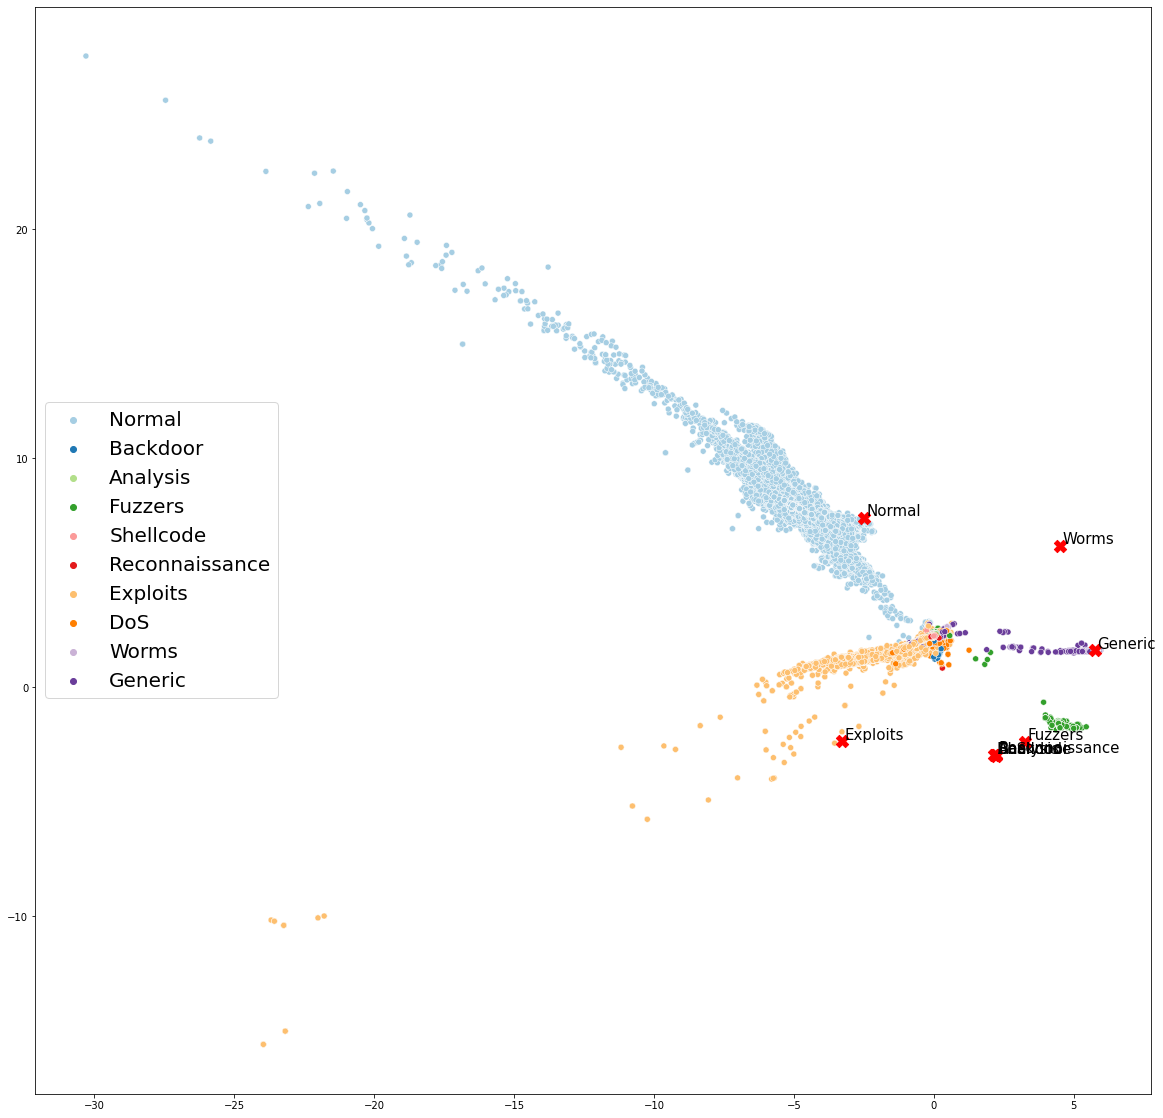

In [292]:
from matplotlib.colors import ListedColormap
#https://matplotlib.org/examples/color/colormaps_reference.html
import seaborn as sns

fig, ax = plt.subplots(figsize=(20,20))
s =sns.scatterplot(embedding_x_train[:,0],embedding_x_train[:,1], 
            hue=le4.inverse_transform(label_train),
            palette = "Paired")
plt.legend(loc='center left', prop={'size': 20})
plt.scatter(embedding_label_train[:,0],embedding_label_train[:,1], c="r", marker="X", s=150)
for i, txt in enumerate(num_classes):
    ax.annotate(txt, (embedding_label_train[i,0]+0.1, embedding_label_train[i,1]+0.1),fontsize=15)
plt.show()

#### Test set

In [293]:
embedding_x_test = np.array(model_embed_x.predict(x_test))
embedding_x_test

array([[ 0.02403878,  2.26346876],
       [ 0.0593078 ,  2.28111219],
       [ 0.04582219,  2.29203709],
       ...,
       [-4.89110756,  7.82574658],
       [-4.80970171,  7.79131614],
       [ 0.0580101 ,  2.2626112 ]])

In [294]:
embedding_label_test = np.array(model_embed_labels.predict(x_test))
embedding_label_test = np.stack(embedding_label_test, axis=1)[0,:,:]
print(embedding_label_test)

[[ 2.20367982 -2.97814569]
 [ 2.20921585 -2.99474061]
 [ 2.15515561 -2.97758282]
 [-3.2818527  -2.3673357 ]
 [ 3.24170427 -2.37962412]
 [ 5.74849399  1.59557842]
 [-2.50805021  7.38629242]
 [ 2.20085096 -2.9680964 ]
 [ 2.20799255 -2.98089715]
 [ 4.4933649   6.17644426]]


d:\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


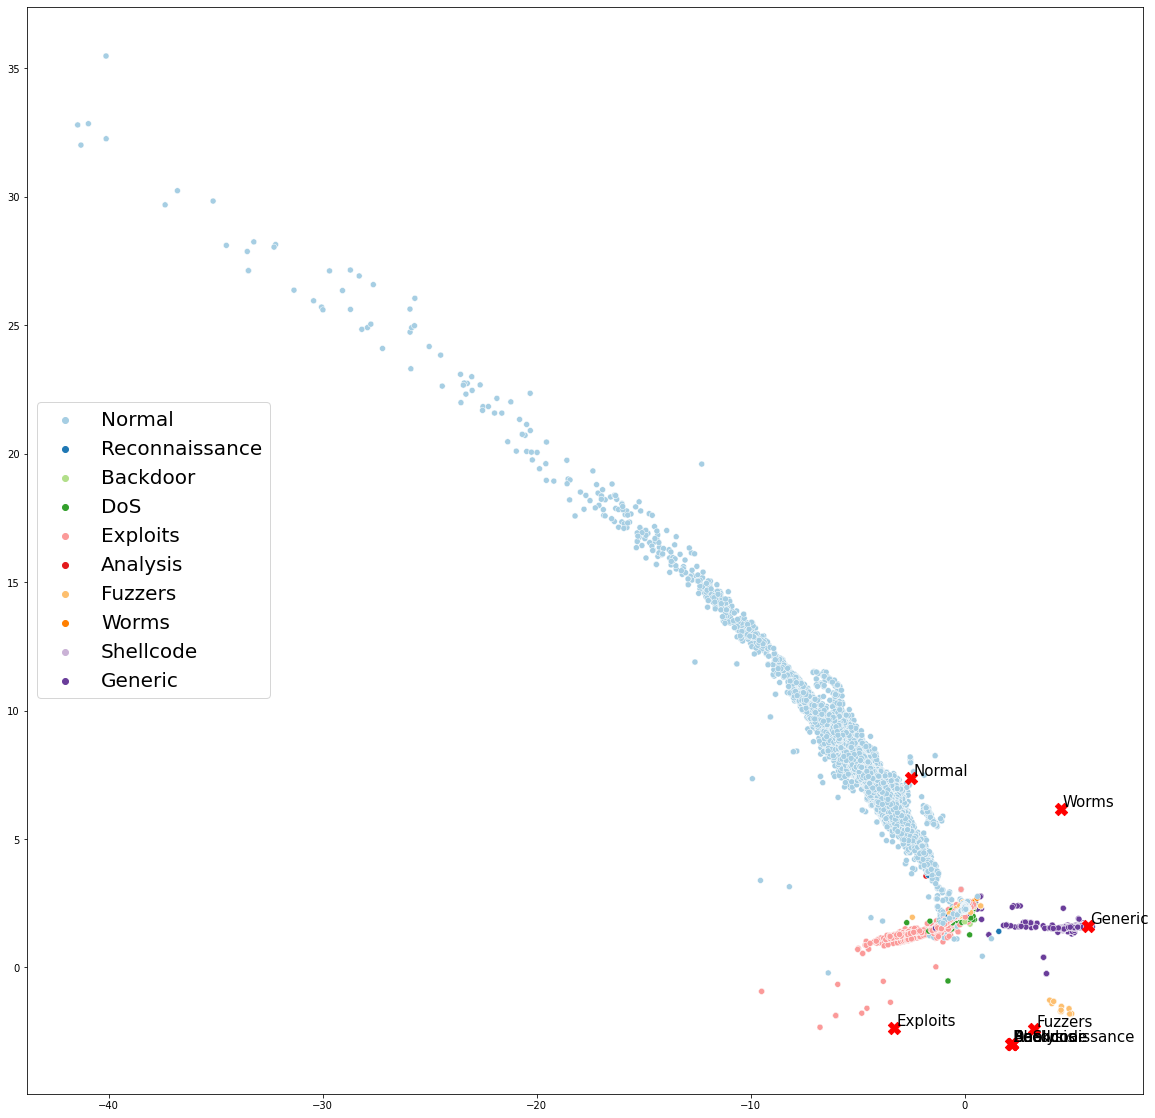

In [295]:
from matplotlib.colors import ListedColormap
#https://matplotlib.org/examples/color/colormaps_reference.html
import seaborn as sns

fig, ax = plt.subplots(figsize=(20,20))
s =sns.scatterplot(embedding_x_test[:,0],embedding_x_test[:,1], 
            hue=le4.inverse_transform(label_test),
            palette = "Paired")
plt.legend(loc='center left', prop={'size': 20})
plt.scatter(embedding_label_test[:,0],embedding_label_test[:,1], c="r", marker="X", s=150)
for i, txt in enumerate(num_classes):
    ax.annotate(txt, (embedding_label_test[i,0]+0.1, embedding_label_test[i,1]+0.1),fontsize=15)
plt.show()

### Cluster metrics

In [296]:
y_test = le4.inverse_transform(YTestAN10MOhe)
x_test = XTestM
x_train = XTrainM
label_train = YTrainAN10MOhe
label_test = YTestAN10MOhe
y_train = le4.inverse_transform(YTrainAN10MOhe)


#### Training set

####  Metrics not based on knowing the ground-truth label

In [297]:
# metricas no basadas en conocer el groun-truth label
embedding_x_train = np.array(model_embed_x.predict(x_train))
embedding_x_train

t0 = time.time()

ytrain_hat = le4.inverse_transform(labelOHEncodedFromDistances(model_mat_dist.predict(x_train)))

t1 = time.time()
print("Minutes elapsed: %f" % ((t1 - t0) / 60.))

print(embedding_x_train.shape)

Minutes elapsed: 0.097798
(175341, 2)


In [298]:
np.unique (ytrain_hat)

array(['DoS', 'Exploits', 'Fuzzers', 'Generic', 'Normal', 'Worms'],
      dtype='<U14')

In [299]:
t0 = time.time()
cal_hara_score = metrics.calinski_harabasz_score(embedding_x_train, ytrain_hat)
t1 = time.time()
print("Minutes elapsed: %f" % ((t1 - t0) / 60.))

t0 = time.time()
d_b_score = metrics.davies_bouldin_score(embedding_x_train, ytrain_hat)
t1 = time.time()
print("Minutes elapsed: %f" % ((t1 - t0) / 60.))

t0 = time.time()
sil_score = metrics.silhouette_score(embedding_x_train, ytrain_hat, metric='euclidean')
t1 = time.time()
print("Minutes elapsed: %f" % ((t1 - t0) / 60.))

Minutes elapsed: 0.000832
Minutes elapsed: 0.000768
Minutes elapsed: 5.719096


In [300]:
no_labels_cluster_metrics = pd.DataFrame({'silhouette_score': sil_score,
                              'calinski_harabasz_score': cal_hara_score,
                              'davies_bouldin_score':d_b_score},index=[1])
no_labels_cluster_metrics

silhouette_score  calinski_harabasz_score  davies_bouldin_score
1          0.163712            141858.649353              1.041827

####   Metrics based on knowing the ground-truth label

In [301]:
a_r_score = metrics.adjusted_rand_score(y_train, ytrain_hat)
a_m_i_score = metrics.adjusted_mutual_info_score(y_train, ytrain_hat)  
n_m_i_score = metrics.normalized_mutual_info_score(y_train, ytrain_hat)  
fo_ma_score = metrics.fowlkes_mallows_score(y_train, ytrain_hat)  
homo_score = metrics.homogeneity_score(y_train, ytrain_hat) 
comple_score =metrics.completeness_score(y_train, ytrain_hat)  
v_meas_score = metrics.v_measure_score(y_train, ytrain_hat)  

d:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
d:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


In [302]:
labels_cluster_metrics = pd.DataFrame({'adjusted_rand_score': a_r_score,
                              'adjusted_mutual_info_score': a_m_i_score,
                              'normalized_mutual_info_score':n_m_i_score,
                             'fowlkes_mallows_score':fo_ma_score,
                              'homogeneity_score':homo_score,
                              'completeness_score':comple_score,
                             'v_measure_score':v_meas_score,
                                      }
                                      ,index=[1])
labels_cluster_metrics

adjusted_rand_score  adjusted_mutual_info_score  \
1             0.683044                    0.568967   

   normalized_mutual_info_score  fowlkes_mallows_score  homogeneity_score  \
1                      0.617671               0.757491           0.568998   

   completeness_score  v_measure_score  
1            0.670508         0.615596

#### Test set

####  Metrics not based on knowing the ground-truth label

In [303]:
t0 = time.time()
cal_hara_score = metrics.calinski_harabasz_score(embedding_x_test, y_test_hat)
t1 = time.time()
print("Minutes elapsed: %f" % ((t1 - t0) / 60.))

t0 = time.time()
d_b_score = metrics.davies_bouldin_score(embedding_x_test, y_test_hat)
t1 = time.time()
print("Minutes elapsed: %f" % ((t1 - t0) / 60.))

t0 = time.time()
sil_score = metrics.silhouette_score(embedding_x_test, y_test_hat, metric='euclidean')
t1 = time.time()
print("Minutes elapsed: %f" % ((t1 - t0) / 60.))

Minutes elapsed: 0.000382
Minutes elapsed: 0.000482
Minutes elapsed: 1.303599


In [304]:
no_labels_cluster_metrics = pd.DataFrame({'silhouette_score': sil_score,
                              'calinski_harabasz_score': cal_hara_score,
                              'davies_bouldin_score':d_b_score},index=[1])
no_labels_cluster_metrics

silhouette_score  calinski_harabasz_score  davies_bouldin_score
1          0.194664             39933.453536              0.905153

####   Metrics based on knowing the ground-truth label

In [305]:
a_r_score = metrics.adjusted_rand_score(y_test, y_test_hat)
a_m_i_score = metrics.adjusted_mutual_info_score(y_test, y_test_hat) 
n_m_i_score = metrics.normalized_mutual_info_score(y_test, y_test_hat) 
fo_ma_score = metrics.fowlkes_mallows_score(y_test, y_test_hat) 
homo_score = metrics.homogeneity_score(y_test, y_test_hat)
comple_score =metrics.completeness_score(y_test, y_test_hat)
v_meas_score = metrics.v_measure_score(y_test, y_test_hat) 

d:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
d:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


In [306]:
labels_cluster_metrics = pd.DataFrame({'adjusted_rand_score': a_r_score,
                              'adjusted_mutual_info_score': a_m_i_score,
                              'normalized_mutual_info_score':n_m_i_score,
                             'fowlkes_mallows_score':fo_ma_score,
                              'homogeneity_score':homo_score,
                              'completeness_score':comple_score,
                             'v_measure_score':v_meas_score,
                                      }
                                      ,index=[1])
labels_cluster_metrics

adjusted_rand_score  adjusted_mutual_info_score  \
1             0.632334                    0.547424   

   normalized_mutual_info_score  fowlkes_mallows_score  homogeneity_score  \
1                      0.566936               0.732851           0.547498   

   completeness_score  v_measure_score  
1            0.587063         0.566591

## 3.5 Model: 10 labels, RLB-CL, CE+ENMS, Embed dim: 2, Distance: Euclidean

In [98]:
le = LabelEncoder()
index_label_train = le.fit_transform (YTrainAN10)
index_label_test = le.transform (YTestAN10)

print(le4.transform(['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic','Normal', 'Reconnaissance', 'Shellcode', 'Worms']))
print(le.transform(['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic','Normal', 'Reconnaissance', 'Shellcode', 'Worms']))

x_train, x_test, label_train, label_test, y_train, y_test = XTrainM, XTestM, \
                                                            YTrainAN10MOhe, YTestAN10MOhe,\
                                                            np.zeros(len(XTrainM)), np.zeros(len(XTestM))
print (x_train.shape, x_test.shape, label_train.shape, label_test.shape, y_train.shape, y_test.shape)


[[1 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 1]]
[0 1 2 3 4 5 6 7 8 9]
(175341, 196) (82332, 196) (175341, 10) (82332, 10) (175341,) (82332,)


In [100]:
# save the best weights for predicting the test question pairs
file_name = 'CLC_ADFA_3_cplet dim2_v11 v1.1'
save_best_weights = file_name + '_best.h5'
save_last_weights = file_name + '_last.h5'
save_summary_stats = file_name + '.csv'

in_dim_x = x_train.shape[1]
in_dim_label = label_train.shape[1]
out_dim = 1 # yes, no

print(in_dim_x)
print(in_dim_label)
print(out_dim)

196
10
1


### Prepare the model

In [102]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


Instructions for updating:
non-resource variables are not supported in the long term


In [103]:
vocab_size = in_dim_label  
embed_dim = 2

list_labels = ['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic','Normal', 'Reconnaissance', 'Shellcode', 'Worms']

def create_all_labels(in_x):
  sal = tf.cast(tf.reshape(tf.tile(le4.transform(list_labels),
                                  [tf.shape(in_x)[0],1]),[-1,in_dim_label,in_dim_label]), 
                                   dtype=tf.float64)
  return sal


def create_model_1(in_dim_x,in_dim_label,embed_dim):
    
    #input X
    in_x = Input(shape=(in_dim_x,))  
    
    # Integer vector with range [0,in_dim_label-1] and length equal to X.shape[0]. Index of the correct label
    in_index_label = Input(shape=(1,),dtype=tf.int32) 
    
    in_labels = Lambda(lambda x : create_all_labels(x))(in_x) # to allow saving the weigths
    
    
    #working lists
    lst_labels=[]
    lst_dist=[]

    #embedding labels
    for i in range(in_dim_label):
        lst_labels.append(Dense(10, activation='relu')(in_labels[:,:,i]))
        lst_labels[i] = Dense(embed_dim, activation='linear')(lst_labels[i])

    #embedding of x
    u = Dense (100, activation='relu')(in_x)
    u = Dense (50, activation='relu')(u)
    x_embed = Dense(embed_dim,activation='linear')(u)

    # classification output
    n = Dense (20, activation='relu')(x_embed)
    n = Dense (20, activation='relu')(n)
    out_classification = Dense(in_dim_label,activation='softmax')(n)

    # similarity measure
    for i in range(in_dim_label):
        lst_dist.append(Lambda(euclidean_distance,output_shape=eucl_dist_output_shape)([x_embed, lst_labels[i]]))

    mat_dist = tf.squeeze(tf.stack(lst_dist, axis=1))
    one_hot_mask = tf.reshape(tf.one_hot(in_index_label, in_dim_label, on_value = True, off_value = False, 
                                         axis = 1, dtype = tf.bool),(-1,in_dim_label))
    one_hot_mask_neg = tf.logical_not(one_hot_mask)
    dist_to_true = tf.boolean_mask(mat_dist, one_hot_mask)
    dist_to_false = tf.reshape(tf.boolean_mask(mat_dist, one_hot_mask_neg),(-1,in_dim_label-1))
    min_dist_to_false = tf.reduce_min(dist_to_false, axis = 1)
    out = tf.reshape(tf.exp(dist_to_true - min_dist_to_false),(-1,1))
    
    # model outputs
    m = Model(inputs=[in_x,in_index_label],outputs= [out, out_classification]) # loss
    m_embed_x = Model(inputs=in_x, outputs= x_embed)  # embedding of x
    m_embed_labels = Model(inputs=in_x, outputs= lst_labels) #embedding of labels
    m_mat_dist = Model(inputs=in_x, outputs= mat_dist) # matrix of distances between x and labels
    m_lst_dist = Model(inputs=in_x, outputs= lst_dist) # list of distances between x and labels
    m_out_classification = Model(inputs=in_x, outputs= out_classification)  # classification output

    m.compile(loss=[dummy_loss, 'categorical_crossentropy'], optimizer=Adam(0.001), metrics=['mse','accuracy'] , loss_weights = [0.5,0.5] )
    return(m, m_embed_x , m_embed_labels, m_mat_dist, m_lst_dist, m_out_classification)

In [104]:
#create the model
model, model_embed_x , model_embed_labels, model_mat_dist, model_lst_dist, model_out_classification = create_model_1(in_dim_x, in_dim_label, embed_dim) 

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [403]:
model.summary()

Model: "model_45"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_15 (InputLayer)           [(None, 196)]        0                                            
__________________________________________________________________________________________________
lambda_78 (Lambda)              (None, 10, 10)       0           input_15[0][0]                   
__________________________________________________________________________________________________
dense_185 (Dense)               (None, 100)          19700       input_15[0][0]                   
__________________________________________________________________________________________________
tf_op_layer_strided_slice_70 (T [(None, 10)]         0           lambda_78[0][0]                  
___________________________________________________________________________________________

In [404]:
model_embed_x.summary()

Model: "model_46"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        [(None, 196)]             0         
_________________________________________________________________
dense_185 (Dense)            (None, 100)               19700     
_________________________________________________________________
dense_186 (Dense)            (None, 50)                5050      
_________________________________________________________________
dense_187 (Dense)            (None, 2)                 102       
Total params: 24,852
Trainable params: 24,852
Non-trainable params: 0
_________________________________________________________________


In [405]:
model_embed_labels.summary()

Model: "model_47"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_15 (InputLayer)           [(None, 196)]        0                                            
__________________________________________________________________________________________________
lambda_78 (Lambda)              (None, 10, 10)       0           input_15[0][0]                   
__________________________________________________________________________________________________
tf_op_layer_strided_slice_70 (T [(None, 10)]         0           lambda_78[0][0]                  
__________________________________________________________________________________________________
tf_op_layer_strided_slice_71 (T [(None, 10)]         0           lambda_78[0][0]                  
___________________________________________________________________________________________

###  Entrenamiento

In [407]:
t0 = time.time()
# Train the model
callbacks = [ModelCheckpoint(save_best_weights, monitor='val_loss', save_best_only=True, mode='auto'),
             EarlyStopping(monitor='val_loss', patience=20, verbose=1, mode='auto')
            ]

history = model.fit([x_train,index_label_train],[y_train,YTrainAN10MOhe],
                    batch_size=50,
                    epochs=100,
                    validation_split=0.2,
                    verbose=1,
                    shuffle=True,
                    initial_epoch = 0,
                    callbacks=callbacks)
t1 = time.time()
print("Minutes elapsed: %f" % ((t1 - t0) / 60.))

Train on 140272 samples, validate on 35069 samples
Epoch 1/100
140272/140272 [==============================] - 15s 106us/sample - loss: 0.7579 - tf_op_layer_Reshape_27_loss: 0.6687 - dense_190_loss: 0.8470 - tf_op_layer_Reshape_27_mean_squared_error: 0.7169 - tf_op_layer_Reshape_27_acc: 0.3945 - dense_190_mean_squared_error: 0.0395 - dense_190_acc: 0.6833 - val_loss: 0.3572 - val_tf_op_layer_Reshape_27_loss: 0.3482 - val_dense_190_loss: 0.3662 - val_tf_op_layer_Reshape_27_mean_squared_error: 0.3380 - val_tf_op_layer_Reshape_27_acc: 0.7380 - val_dense_190_mean_squared_error: 0.0156 - val_dense_190_acc: 0.8880loss: 0.8481 - tf_op_layer_Reshape_27_mean_squared_error: 0.7173 - tf_op_layer_Reshape_27_acc: 0.3943 - dense_190_mean_squared_error: 0.0395 - dense_190_acc: 0.
Epoch 2/100
140272/140272 [==============================] - 11s 79us/sample - loss: 0.6496 - tf_op_layer_Reshape_27_loss: 0.6143 - dense_190_loss: 0.6848 - tf_op_layer_Reshape_27_mean_squared_error: 0.6374 - tf_op_layer_Re

140272/140272 [==============================] - 11s 79us/sample - loss: 0.5577 - tf_op_layer_Reshape_27_loss: 0.5649 - dense_190_loss: 0.5506 - tf_op_layer_Reshape_27_mean_squared_error: 0.6400 - tf_op_layer_Reshape_27_acc: 0.4277 - dense_190_mean_squared_error: 0.0283 - dense_190_acc: 0.7782 - val_loss: 0.2768 - val_tf_op_layer_Reshape_27_loss: 0.2657 - val_dense_190_loss: 0.2877 - val_tf_op_layer_Reshape_27_mean_squared_error: 0.6817 - val_tf_op_layer_Reshape_27_acc: 0.7513 - val_dense_190_mean_squared_error: 0.0132 - val_dense_190_acc: 0.8947
Epoch 30/100
140272/140272 [==============================] - 11s 79us/sample - loss: 0.5549 - tf_op_layer_Reshape_27_loss: 0.5641 - dense_190_loss: 0.5457 - tf_op_layer_Reshape_27_mean_squared_error: 0.8282 - tf_op_layer_Reshape_27_acc: 0.4260 - dense_190_mean_squared_error: 0.0281 - dense_190_acc: 0.7805 - val_loss: 0.2743 - val_tf_op_layer_Reshape_27_loss: 0.2679 - val_dense_190_loss: 0.2808 - val_tf_op_layer_Reshape_27_mean_squared_error: 

Epoch 56/100
140272/140272 [==============================] - 11s 79us/sample - loss: 0.5354 - tf_op_layer_Reshape_27_loss: 0.5415 - dense_190_loss: 0.5292 - tf_op_layer_Reshape_27_mean_squared_error: 0.7792 - tf_op_layer_Reshape_27_acc: 0.4993 - dense_190_mean_squared_error: 0.0272 - dense_190_acc: 0.7888 - val_loss: 0.2650 - val_tf_op_layer_Reshape_27_loss: 0.2578 - val_dense_190_loss: 0.2718 - val_tf_op_layer_Reshape_27_mean_squared_error: 0.4245 - val_tf_op_layer_Reshape_27_acc: 0.7873 - val_dense_190_mean_squared_error: 0.0125 - val_dense_190_acc: 0.9040hape_27_acc: 0.5 - ETA: 0s - loss: 0.5359 - tf_op_layer_Reshape_27_loss: 0.5421 - dense_190_loss: 0.5296 - tf_op_layer_Reshape_27_mean_squared_error: 0.7988 - tf_op_layer_Reshape_27_acc: 0.4991 - dense_190_mean_squared_e
Epoch 57/100
140272/140272 [==============================] - 11s 79us/sample - loss: 0.5346 - tf_op_layer_Reshape_27_loss: 0.5406 - dense_190_loss: 0.5287 - tf_op_layer_Reshape_27_mean_squared_error: 0.9886 - tf_o

140272/140272 [==============================] - 11s 80us/sample - loss: 0.5317 - tf_op_layer_Reshape_27_loss: 0.5372 - dense_190_loss: 0.5265 - tf_op_layer_Reshape_27_mean_squared_error: 0.9293 - tf_op_layer_Reshape_27_acc: 0.5085 - dense_190_mean_squared_error: 0.0271 - dense_190_acc: 0.7898 - val_loss: 0.4500 - val_tf_op_layer_Reshape_27_loss: 0.6176 - val_dense_190_loss: 0.2818 - val_tf_op_layer_Reshape_27_mean_squared_error: 2191.6537 - val_tf_op_layer_Reshape_27_acc: 0.7846 - val_dense_190_mean_squared_error: 0.0129 - val_dense_190_acc: 0.9002
Epoch 70/100
140272/140272 [==============================] - 11s 79us/sample - loss: 0.5564 - tf_op_layer_Reshape_27_loss: 0.5667 - dense_190_loss: 0.5462 - tf_op_layer_Reshape_27_mean_squared_error: 10.8964 - tf_op_layer_Reshape_27_acc: 0.4901 - dense_190_mean_squared_error: 0.0280 - dense_190_acc: 0.7826 - val_loss: 0.2815 - val_tf_op_layer_Reshape_27_loss: 0.2739 - val_dense_190_loss: 0.2892 - val_tf_op_layer_Reshape_27_mean_squared_err

### Inference

In [105]:
model.load_weights(save_best_weights)

In [415]:
t0 = time.time()

y_test_hat = le4.inverse_transform(labelOHEncodedFromPrediction(model_out_classification.predict(x_test)))

t1 = time.time()
print("Minutes elapsed: %f" % ((t1 - t0) / 60.))
print(y_test_hat)

Minutes elapsed: 0.047091
['Normal' 'Fuzzers' 'Fuzzers' ... 'Normal' 'Normal' 'Fuzzers']


In [416]:
ytest_prob_hat=  model_out_classification.predict(x_test)

In [417]:
average_type = 'weighted' # micro' , 'weighted'
print('Performance measures on Test data')
print('Accuracy =  {}'.format(accuracy_score( le4.inverse_transform(YTestAN10MOhe),y_test_hat)))

print('F1 =  {}'.format(f1_score(le4.inverse_transform(YTestAN10MOhe),y_test_hat, average=average_type)))

print('Precision_score =  {}'.format(precision_score(le4.inverse_transform(YTestAN10MOhe),y_test_hat, average=average_type)))

print('recall_score =  {}'.format(recall_score(le4.inverse_transform(YTestAN10MOhe),y_test_hat, average=average_type)))

print('roc_auc_score =  {}'.format(roc_auc_score(YTestAN10MOhe,ytest_prob_hat)))

print('matthews_corr_score =  {}'.format(matthews_corrcoef(le4.inverse_transform(YTestAN10MOhe), y_test_hat)))

Performance measures on Test data
Accuracy =  0.7576883836175484


d:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


F1 =  0.7606445485694682


d:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Precision_score =  0.8176077396471326
recall_score =  0.7576883836175484
roc_auc_score =  0.9515470131232826
matthews_corr_score =  0.6886458426005557


### Perform test evaluation one vs. rest

In [ ]:
yt_app = le4.inverse_transform(YTestAN10MOhe)
perf_per_class = pd.DataFrame(index=range(len(pd.Series(le4.inverse_transform(YTestAN10MOhe)).unique())),columns=['name', 'acc','f1', 'pre','rec'])
for i,x in enumerate(pd.Series(le4.inverse_transform(YTestAN10MOhe)).value_counts().index):
    y_test_hat_check = y_test_hat.copy()
    y_test_hat_check[y_test_hat_check != x] = 'OTHER'
    yt_app = le4.inverse_transform(YTestAN10MOhe).copy()
    yt_app[yt_app != x] = 'OTHER'
    ac=accuracy_score( yt_app,y_test_hat_check)
    f1=f1_score( yt_app,y_test_hat_check,pos_label=x, average='binary')
    pr=precision_score( yt_app,y_test_hat_check,pos_label=x, average='binary')
    re=recall_score( yt_app,y_test_hat_check,pos_label=x, average='binary')
    perf_per_class.iloc[i]=[x,ac,f1,pr,re]

In [420]:
# performance measures per class for test data
perf_per_class

name       acc         f1       pre        rec
0          Normal  0.876196   0.844834  0.967167   0.749973
1         Generic  0.991109   0.980232  0.999449    0.96174
2        Exploits  0.881869   0.681136  0.536293   0.933166
3         Fuzzers  0.866844    0.34779  0.271983   0.482184
4             DoS   0.95087  0.0858757  0.565476  0.0464661
5  Reconnaissance  0.980737   0.777684  0.762507   0.793478
6        Analysis  0.988073          0         0          0
7        Backdoor  0.992919          0         0          0
8       Shellcode  0.987295   0.285519  0.192449    0.55291
9           Worms  0.999466          0         0          0

###  Cluster visualization 

#### Training set

In [106]:
num_classes = ['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic','Normal', 'Reconnaissance', 'Shellcode', 'Worms']

In [107]:
embedding_x_train = np.array(model_embed_x.predict(x_train))
embedding_x_train

array([[ 4.99259809e-01, -4.19068309e-01],
       [ 2.26131182e-01,  3.23815624e-03],
       [-3.15803762e-01,  3.13220552e-01],
       ...,
       [-4.12285564e+00,  8.65249894e+00],
       [-3.09825985e+00,  6.87809434e+00],
       [-3.11662413e+00,  6.93277740e+00]])

In [108]:
embedding_label_train = np.array(model_embed_labels.predict(x_train))
embedding_label_train = np.stack(embedding_label_train, axis=1)[0,:,:]
print(embedding_label_train)

[[ 2.42408034  5.99325672]
 [-3.98154713 -4.99408347]
 [ 2.38773801  5.97906804]
 [-5.68203178  1.51985099]
 [ 5.56213966  3.62732529]
 [-1.97952373  6.55681944]
 [ 6.36649776 -2.88950824]
 [-0.74047504 -6.29557447]
 [-3.95769227 -5.0081329 ]
 [-4.03796527 -4.99338521]]


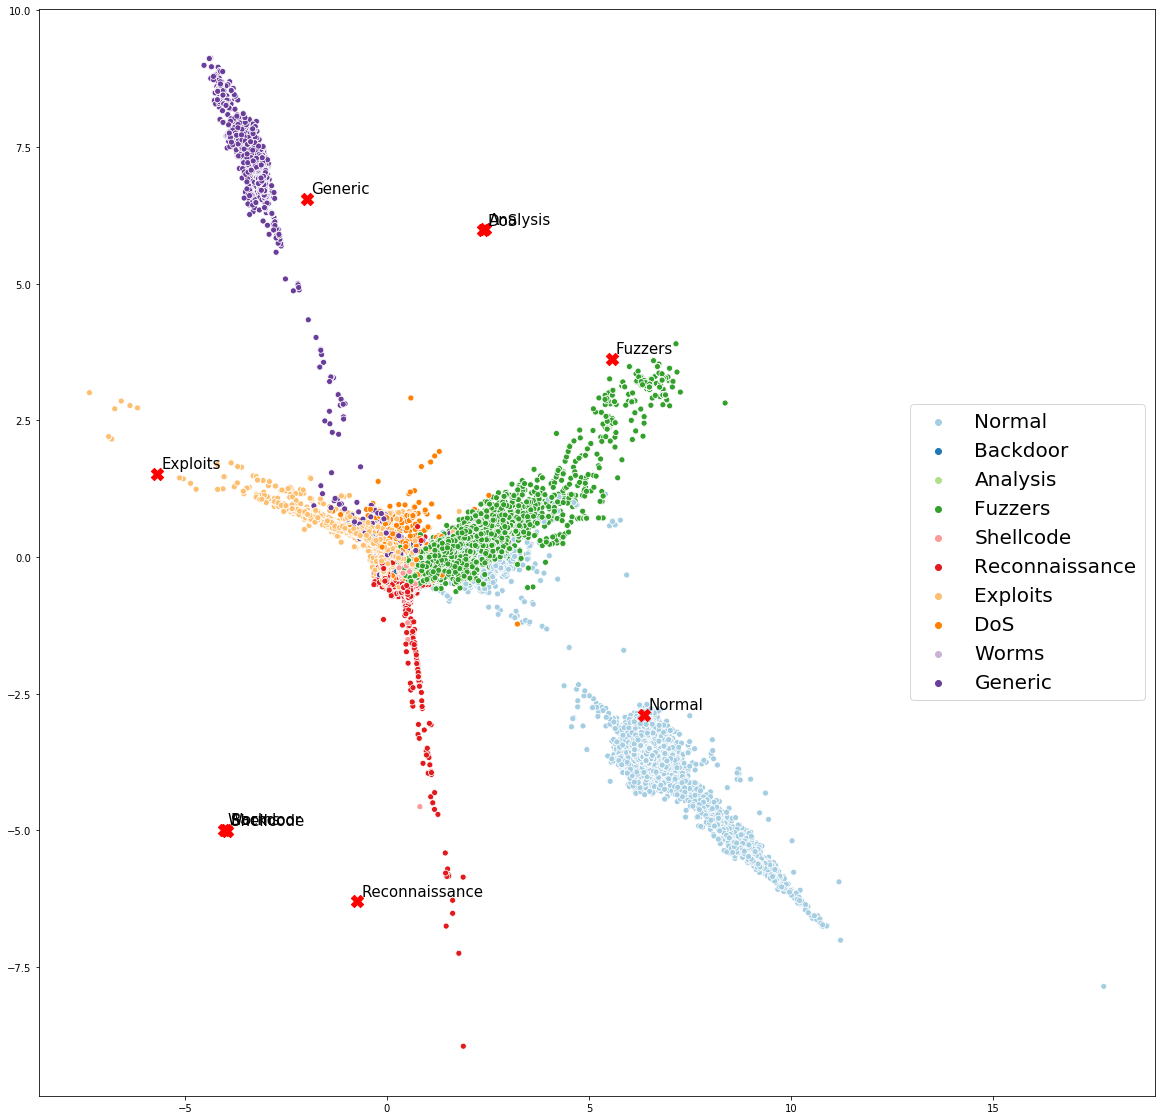

In [109]:
from matplotlib.colors import ListedColormap
#https://matplotlib.org/examples/color/colormaps_reference.html
import seaborn as sns

fig, ax = plt.subplots(figsize=(20,20))
s =sns.scatterplot(embedding_x_train[:,0],embedding_x_train[:,1], 
            hue=le4.inverse_transform(label_train),
            palette = "Paired")
plt.legend(loc='center right', prop={'size': 20})
plt.scatter(embedding_label_train[:,0],embedding_label_train[:,1], c="r", marker="X", s=150)
for i, txt in enumerate(num_classes):
    ax.annotate(txt, (embedding_label_train[i,0]+0.1, embedding_label_train[i,1]+0.1),fontsize=15)
plt.show()

#### Test set

In [425]:
embedding_x_test = np.array(model_embed_x.predict(x_test))
embedding_x_test

array([[ 0.58636031, -0.12698884],
       [ 0.69122867, -0.04787627],
       [ 0.98575433, -0.03387149],
       ...,
       [ 6.37407556, -3.56502229],
       [ 6.4139543 , -3.50554122],
       [ 0.76773092, -0.02757462]])

In [426]:
embedding_label_test = np.array(model_embed_labels.predict(x_test))
embedding_label_test = np.stack(embedding_label_test, axis=1)[0,:,:]
print(embedding_label_test)

[[ 2.42408034  5.99325672]
 [-3.98154713 -4.99408347]
 [ 2.38773801  5.97906804]
 [-5.68203178  1.51985099]
 [ 5.56213966  3.62732529]
 [-1.97952373  6.55681944]
 [ 6.36649776 -2.88950824]
 [-0.74047504 -6.29557447]
 [-3.95769227 -5.0081329 ]
 [-4.03796527 -4.99338521]]


d:\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


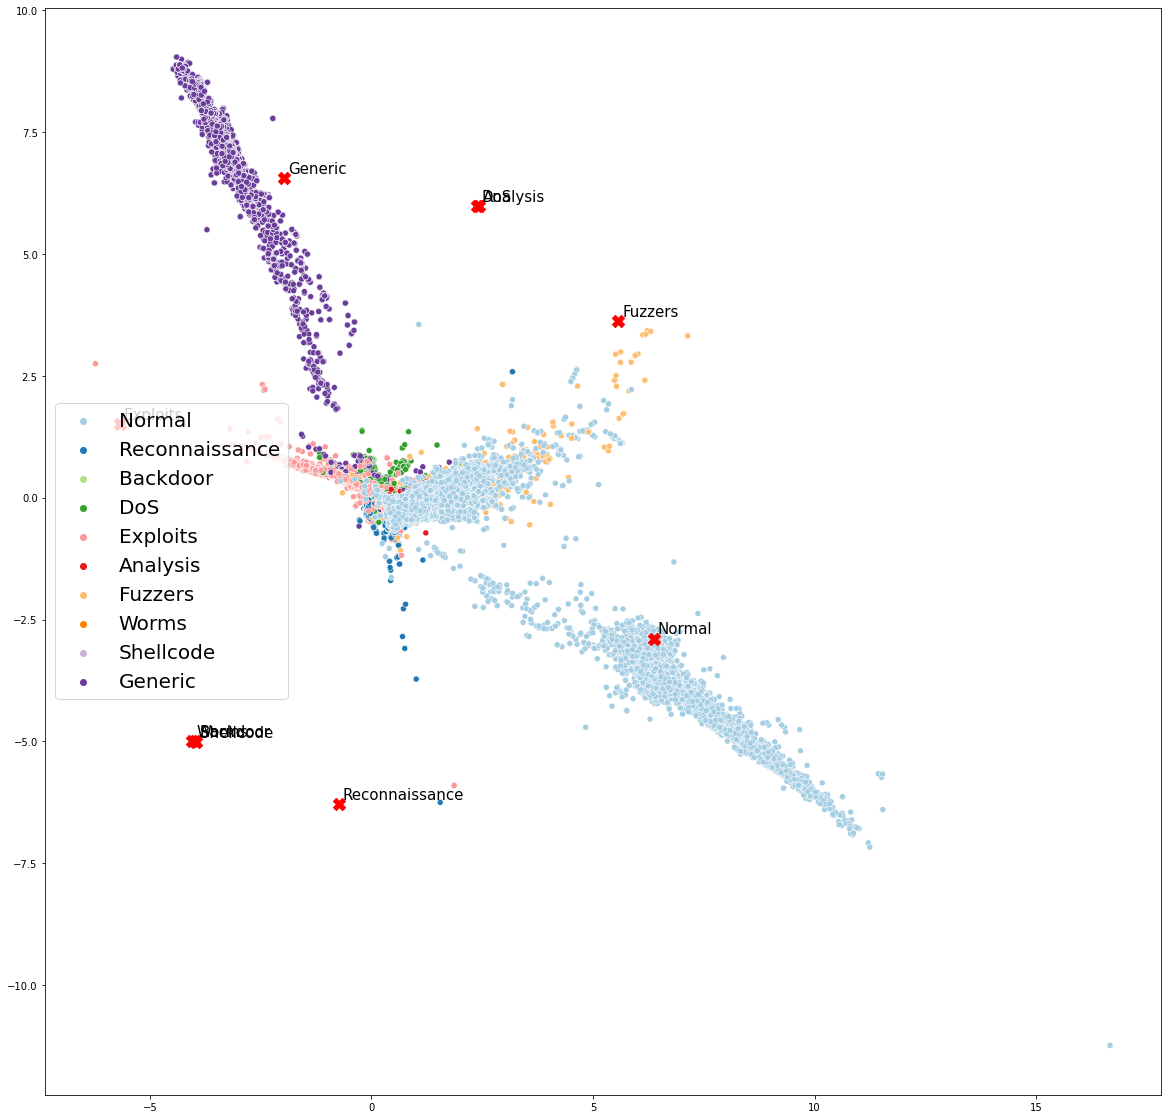

In [427]:
from matplotlib.colors import ListedColormap
#https://matplotlib.org/examples/color/colormaps_reference.html
import seaborn as sns

fig, ax = plt.subplots(figsize=(20,20))
s =sns.scatterplot(embedding_x_test[:,0],embedding_x_test[:,1], 
            hue=le4.inverse_transform(label_test),
            palette = "Paired")
plt.legend(loc='center left', prop={'size': 20})
plt.scatter(embedding_label_test[:,0],embedding_label_test[:,1], c="r", marker="X", s=150)
for i, txt in enumerate(num_classes):
    ax.annotate(txt, (embedding_label_test[i,0]+0.1, embedding_label_test[i,1]+0.1),fontsize=15)
plt.show()

### Cluster metrics

In [428]:
y_test = le4.inverse_transform(YTestAN10MOhe)
x_test = XTestM
x_train = XTrainM
label_train = YTrainAN10MOhe
label_test = YTestAN10MOhe
y_train = le4.inverse_transform(YTrainAN10MOhe)


#### Training set

####  Metrics not based on knowing the ground-truth label

In [429]:
# metricas no basadas en conocer el groun-truth label
embedding_x_train = np.array(model_embed_x.predict(x_train))
embedding_x_train

t0 = time.time()

ytrain_hat = le4.inverse_transform(labelOHEncodedFromPrediction(model_out_classification.predict(x_train)))

t1 = time.time()
print("Minutes elapsed: %f" % ((t1 - t0) / 60.))

print(embedding_x_train.shape)

Minutes elapsed: 0.099733
(175341, 2)


In [430]:
np.unique (ytrain_hat)

array(['Analysis', 'DoS', 'Exploits', 'Fuzzers', 'Generic', 'Normal',
       'Reconnaissance', 'Shellcode'], dtype='<U14')

In [431]:
t0 = time.time()
cal_hara_score = metrics.calinski_harabasz_score(embedding_x_train, ytrain_hat)
t1 = time.time()
print("Minutes elapsed: %f" % ((t1 - t0) / 60.))

t0 = time.time()
d_b_score = metrics.davies_bouldin_score(embedding_x_train, ytrain_hat)
t1 = time.time()
print("Minutes elapsed: %f" % ((t1 - t0) / 60.))

t0 = time.time()
sil_score = metrics.silhouette_score(embedding_x_train, ytrain_hat, metric='euclidean')
t1 = time.time()
print("Minutes elapsed: %f" % ((t1 - t0) / 60.))

Minutes elapsed: 0.000865
Minutes elapsed: 0.000861
Minutes elapsed: 5.713527


In [432]:
no_labels_cluster_metrics = pd.DataFrame({'silhouette_score': sil_score,
                              'calinski_harabasz_score': cal_hara_score,
                              'davies_bouldin_score':d_b_score},index=[1])
no_labels_cluster_metrics

silhouette_score  calinski_harabasz_score  davies_bouldin_score
1          0.292921            271918.971498              1.017771

####   Metrics based on knowing the ground-truth label

In [433]:
a_r_score = metrics.adjusted_rand_score(y_train, ytrain_hat)
a_m_i_score = metrics.adjusted_mutual_info_score(y_train, ytrain_hat)  
n_m_i_score = metrics.normalized_mutual_info_score(y_train, ytrain_hat)  
fo_ma_score = metrics.fowlkes_mallows_score(y_train, ytrain_hat)  
homo_score = metrics.homogeneity_score(y_train, ytrain_hat) 
comple_score =metrics.completeness_score(y_train, ytrain_hat)  
v_meas_score = metrics.v_measure_score(y_train, ytrain_hat)  

d:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
d:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


In [434]:
labels_cluster_metrics = pd.DataFrame({'adjusted_rand_score': a_r_score,
                              'adjusted_mutual_info_score': a_m_i_score,
                              'normalized_mutual_info_score':n_m_i_score,
                             'fowlkes_mallows_score':fo_ma_score,
                              'homogeneity_score':homo_score,
                              'completeness_score':comple_score,
                             'v_measure_score':v_meas_score,
                                      }
                                      ,index=[1])
labels_cluster_metrics

adjusted_rand_score  adjusted_mutual_info_score  \
1             0.709322                     0.64745   

   normalized_mutual_info_score  fowlkes_mallows_score  homogeneity_score  \
1                      0.693894               0.778131           0.647487   

   completeness_score  v_measure_score  
1            0.743628         0.692235

#### Test set

####  Metrics not based on knowing the ground-truth label

In [435]:
t0 = time.time()
cal_hara_score = metrics.calinski_harabasz_score(embedding_x_test, y_test_hat)
t1 = time.time()
print("Minutes elapsed: %f" % ((t1 - t0) / 60.))

t0 = time.time()
d_b_score = metrics.davies_bouldin_score(embedding_x_test, y_test_hat)
t1 = time.time()
print("Minutes elapsed: %f" % ((t1 - t0) / 60.))

t0 = time.time()
sil_score = metrics.silhouette_score(embedding_x_test, y_test_hat, metric='euclidean')
t1 = time.time()
print("Minutes elapsed: %f" % ((t1 - t0) / 60.))

Minutes elapsed: 0.000399
Minutes elapsed: 0.000466
Minutes elapsed: 1.268867


In [436]:
no_labels_cluster_metrics = pd.DataFrame({'silhouette_score': sil_score,
                              'calinski_harabasz_score': cal_hara_score,
                              'davies_bouldin_score':d_b_score},index=[1])
no_labels_cluster_metrics

silhouette_score  calinski_harabasz_score  davies_bouldin_score
1           0.22822             81636.719457              1.027535

####   Metrics based on knowing the ground-truth label

In [437]:
a_r_score = metrics.adjusted_rand_score(y_test, y_test_hat)
a_m_i_score = metrics.adjusted_mutual_info_score(y_test, y_test_hat) 
n_m_i_score = metrics.normalized_mutual_info_score(y_test, y_test_hat) 
fo_ma_score = metrics.fowlkes_mallows_score(y_test, y_test_hat) 
homo_score = metrics.homogeneity_score(y_test, y_test_hat)
comple_score =metrics.completeness_score(y_test, y_test_hat)
v_meas_score = metrics.v_measure_score(y_test, y_test_hat) 

d:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
d:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


In [438]:
labels_cluster_metrics = pd.DataFrame({'adjusted_rand_score': a_r_score,
                              'adjusted_mutual_info_score': a_m_i_score,
                              'normalized_mutual_info_score':n_m_i_score,
                             'fowlkes_mallows_score':fo_ma_score,
                              'homogeneity_score':homo_score,
                              'completeness_score':comple_score,
                             'v_measure_score':v_meas_score,
                                      }
                                      ,index=[1])
labels_cluster_metrics

adjusted_rand_score  adjusted_mutual_info_score  \
1             0.628405                    0.620703   

   normalized_mutual_info_score  fowlkes_mallows_score  homogeneity_score  \
1                      0.621032               0.727743           0.620798   

   completeness_score  v_measure_score  
1            0.621267         0.621032

## 3.6 Model: 10 labels, RLB-CL, NMM, Embed dim: 2, Distance: Euclidean

In [439]:
le = LabelEncoder()
index_label_train = le.fit_transform (YTrainAN10)
index_label_test = le.transform (YTestAN10)

print(le4.transform(['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic','Normal', 'Reconnaissance', 'Shellcode', 'Worms']))
print(le.transform(['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic','Normal', 'Reconnaissance', 'Shellcode', 'Worms']))

x_train, x_test, label_train, label_test, y_train, y_test = XTrainM, XTestM, \
                                                            YTrainAN10MOhe, YTestAN10MOhe,\
                                                            np.zeros(len(XTrainM)), np.zeros(len(XTestM))
print (x_train.shape, x_test.shape, label_train.shape, label_test.shape, y_train.shape, y_test.shape)


[[1 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 1]]
[0 1 2 3 4 5 6 7 8 9]
(175341, 196) (82332, 196) (175341, 10) (82332, 10) (175341,) (82332,)


In [441]:
# save the best weights for predicting the test question pairs
file_name = 'CLC_ADFA_3_cplet dim2_v12 v1.1'
save_best_weights = file_name + '_best.h5'
save_last_weights = file_name + '_last.h5'
save_summary_stats = file_name + '.csv'

in_dim_x = x_train.shape[1]
in_dim_label = label_train.shape[1]
out_dim = 1 # yes, no

print(in_dim_x)
print(in_dim_label)
print(out_dim)

196
10
1


### Prepare the model

In [443]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [444]:
vocab_size = in_dim_label  
embed_dim = 2

list_labels = ['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic','Normal', 'Reconnaissance', 'Shellcode', 'Worms']

def create_all_labels(in_x):
  sal = tf.cast(tf.reshape(tf.tile(le4.transform(list_labels),
                                  [tf.shape(in_x)[0],1]),[-1,in_dim_label,in_dim_label]), 
                                   dtype=tf.float64)
  return sal


def create_model(in_dim_x,in_dim_label,embed_dim):
    
    #input X
    in_x = Input(shape=(in_dim_x,))  
    
    # Integer vector with range [0,in_dim_label-1] and length equal to X.shape[0]. Index of the correct label
    in_index_label = Input(shape=(1,),dtype=tf.int32) 
    
    in_labels = Lambda(lambda x : create_all_labels(x))(in_x) # to allow saving the weigths
    
    
    #working lists
    lst_labels=[]
    lst_dist=[]

    #embedding labels
    for i in range(in_dim_label):
        lst_labels.append(Dense(10, activation='relu')(in_labels[:,:,i]))
        lst_labels[i] = Dense(embed_dim, activation='linear')(lst_labels[i])

    #embedding of x
    u = Dense (100, activation='relu')(in_x)
    u = Dense (50, activation='relu')(u)
    x_embed = Dense(embed_dim,activation='linear')(u)

    # similarity measure
    for i in range(in_dim_label):
        lst_dist.append(Lambda(euclidean_distance,output_shape=eucl_dist_output_shape)([x_embed, lst_labels[i]]))

    mat_dist = tf.squeeze(tf.stack(lst_dist, axis=1))
    one_hot_mask = tf.reshape(tf.one_hot(in_index_label, in_dim_label, on_value = True, off_value = False, 
                                         axis = 1, dtype = tf.bool),(-1,in_dim_label))
    one_hot_mask_neg = tf.logical_not(one_hot_mask)
    dist_to_true = tf.boolean_mask(mat_dist, one_hot_mask)
    dist_to_false = tf.reshape(tf.boolean_mask(mat_dist, one_hot_mask_neg),(-1,in_dim_label-1))
    min_dist_to_false = tf.reduce_min(dist_to_false, axis = 1)
    out = tf.reshape(dist_to_true - min_dist_to_false,(-1,1))
    
    # model outputs
    m = Model(inputs=[in_x,in_index_label],outputs= out) # loss
    m_embed_x = Model(inputs=in_x, outputs= x_embed)  # embedding of x
    m_embed_labels = Model(inputs=in_x, outputs= lst_labels) #embedding of labels
    m_mat_dist = Model(inputs=in_x, outputs= mat_dist) # matrix of distances between x and labels
    m_lst_dist = Model(inputs=in_x, outputs= lst_dist) # list of distances between x and labels

    m.compile(loss=dummy_loss_max_margin, optimizer=Adam(0.001), metrics=['mse'])
    return(m, m_embed_x , m_embed_labels, m_mat_dist, m_lst_dist)

In [445]:
#create the model
model, model_embed_x , model_embed_labels, model_mat_dist, model_lst_dist = create_model(in_dim_x, in_dim_label, embed_dim) 

In [449]:
model.summary()

Model: "model_51"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_17 (InputLayer)           [(None, 196)]        0                                            
__________________________________________________________________________________________________
lambda_89 (Lambda)              (None, 10, 10)       0           input_17[0][0]                   
__________________________________________________________________________________________________
dense_211 (Dense)               (None, 100)          19700       input_17[0][0]                   
__________________________________________________________________________________________________
tf_op_layer_strided_slice_80 (T [(None, 10)]         0           lambda_89[0][0]                  
___________________________________________________________________________________________

In [450]:
model_embed_x.summary()

Model: "model_52"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_17 (InputLayer)        [(None, 196)]             0         
_________________________________________________________________
dense_211 (Dense)            (None, 100)               19700     
_________________________________________________________________
dense_212 (Dense)            (None, 50)                5050      
_________________________________________________________________
dense_213 (Dense)            (None, 2)                 102       
Total params: 24,852
Trainable params: 24,852
Non-trainable params: 0
_________________________________________________________________


In [451]:
model_embed_labels.summary()

Model: "model_53"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_17 (InputLayer)           [(None, 196)]        0                                            
__________________________________________________________________________________________________
lambda_89 (Lambda)              (None, 10, 10)       0           input_17[0][0]                   
__________________________________________________________________________________________________
tf_op_layer_strided_slice_80 (T [(None, 10)]         0           lambda_89[0][0]                  
__________________________________________________________________________________________________
tf_op_layer_strided_slice_81 (T [(None, 10)]         0           lambda_89[0][0]                  
___________________________________________________________________________________________

###  Training

In [453]:
t0 = time.time()
# Train the model
callbacks = [ModelCheckpoint(save_best_weights, monitor='val_loss', save_best_only=True, mode='auto'),
             EarlyStopping(monitor='val_loss', patience=20, verbose=1, mode='auto')
            ]

history = model.fit([x_train,index_label_train],y_train,
                    batch_size=50,
                    epochs=100,
                    validation_split=0.2,
                    verbose=1,
                    shuffle=True,
                    initial_epoch = 0,
                    callbacks=callbacks)
t1 = time.time()
print("Minutes elapsed: %f" % ((t1 - t0) / 60.))

Train on 140272 samples, validate on 35069 samples
Epoch 1/100
140272/140272 [==============================] - 14s 101us/sample - loss: 0.5704 - mean_squared_error: 0.5563 - val_loss: 0.2403 - val_mean_squared_error: 0.9657
Epoch 2/100
140272/140272 [==============================] - 11s 78us/sample - loss: 0.5218 - mean_squared_error: 0.6305 - val_loss: 0.2485 - val_mean_squared_error: 0.8676
Epoch 3/100
140272/140272 [==============================] - 11s 79us/sample - loss: 0.5132 - mean_squared_error: 0.6274 - val_loss: 0.2372 - val_mean_squared_error: 0.8663
Epoch 4/100
140272/140272 [==============================] - 11s 78us/sample - loss: 0.5057 - mean_squared_error: 0.6461 - val_loss: 0.2429 - val_mean_squared_error: 0.9343
Epoch 5/100
140272/140272 [==============================] - 11s 80us/sample - loss: 0.4820 - mean_squared_error: 0.7662 - val_loss: 0.2097 - val_mean_squared_error: 0.9995
Epoch 6/100
140272/140272 [==============================] - 11s 79us/sample - loss

### Inference

In [457]:
model.load_weights(save_best_weights)

In [460]:
t0 = time.time()

y_test_hat = le4.inverse_transform(labelOHEncodedFromDistances(model_mat_dist.predict(x_test)))

t1 = time.time()
print("Minutes elapsed: %f" % ((t1 - t0) / 60.))
print(y_test_hat)

Minutes elapsed: 0.068908
['Fuzzers' 'Fuzzers' 'Fuzzers' ... 'Normal' 'Normal' 'Fuzzers']


In [461]:
# Obtain probabilities
ytest_dist_hat = model_mat_dist.predict(x_test)
ytest_prob_hat = (ytest_dist_hat-np.min(ytest_dist_hat))/(np.max(ytest_dist_hat)-np.min(ytest_dist_hat)) # escalamos 0-1
ytest_prob_hat = normalize(ytest_prob_hat, axis=1, norm='l1')
ytest_prob_hat=  1 - ytest_prob_hat

In [462]:
average_type = 'weighted' # micro' , 'weighted'
print('Performance measures on Test data')
print('Accuracy =  {}'.format(accuracy_score( le4.inverse_transform(YTestAN10MOhe),y_test_hat)))

print('F1 =  {}'.format(f1_score(le4.inverse_transform(YTestAN10MOhe),y_test_hat, average=average_type)))

print('Precision_score =  {}'.format(precision_score(le4.inverse_transform(YTestAN10MOhe),y_test_hat, average=average_type)))

print('recall_score =  {}'.format(recall_score(le4.inverse_transform(YTestAN10MOhe),y_test_hat, average=average_type)))

print('roc_auc_score =  {}'.format(roc_auc_score(YTestAN10MOhe,ytest_prob_hat)))

print('matthews_corr_score =  {}'.format(matthews_corrcoef(le4.inverse_transform(YTestAN10MOhe), y_test_hat)))

Performance measures on Test data
Accuracy =  0.7405504542583685
F1 =  0.741390276524512
Precision_score =  0.7994857380407494
recall_score =  0.7405504542583685
roc_auc_score =  0.7872534102784364
matthews_corr_score =  0.6718543248621951


### Perform test evaluation one vs. rest

In [ ]:
yt_app = le4.inverse_transform(YTestAN10MOhe)
perf_per_class = pd.DataFrame(index=range(len(pd.Series(le4.inverse_transform(YTestAN10MOhe)).unique())),columns=['name', 'acc','f1', 'pre','rec'])
for i,x in enumerate(pd.Series(le4.inverse_transform(YTestAN10MOhe)).value_counts().index):
    y_test_hat_check = y_test_hat.copy()
    y_test_hat_check[y_test_hat_check != x] = 'OTHER'
    yt_app = le4.inverse_transform(YTestAN10MOhe).copy()
    yt_app[yt_app != x] = 'OTHER'
    ac=accuracy_score( yt_app,y_test_hat_check)
    f1=f1_score( yt_app,y_test_hat_check,pos_label=x, average='binary')
    pr=precision_score( yt_app,y_test_hat_check,pos_label=x, average='binary')
    re=recall_score( yt_app,y_test_hat_check,pos_label=x, average='binary')
    perf_per_class.iloc[i]=[x,ac,f1,pr,re]

In [465]:
# performance measures per class for test data
perf_per_class

name       acc        f1       pre        rec
0          Normal  0.858731  0.818902  0.965914    0.71073
1         Generic  0.991231  0.980498  0.999945   0.961793
2        Exploits  0.874605  0.671545  0.519901   0.948078
3         Fuzzers  0.855232  0.355625  0.264495    0.54256
4             DoS  0.949764  0.023146  0.337931  0.0119834
5  Reconnaissance  0.972477  0.694197  0.657128   0.735698
6        Analysis  0.991765         0         0          0
7        Backdoor  0.992907         0         0          0
8       Shellcode  0.994959  0.224299  0.382166    0.15873
9           Worms  0.999429         0         0          0

###  Cluster visualization 

#### Training set

In [466]:
num_classes = ['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic','Normal', 'Reconnaissance', 'Shellcode', 'Worms']

In [467]:
embedding_x_train = np.array(model_embed_x.predict(x_train))
embedding_x_train

array([[-0.20645513, -0.0311519 ],
       [-0.48397956, -0.58741979],
       [ 0.79276937,  1.0108987 ],
       ...,
       [ 0.5160628 ,  3.9655122 ],
       [ 0.59326608,  5.0236498 ],
       [ 0.59565617,  5.00382125]])

In [468]:
embedding_label_train = np.array(model_embed_labels.predict(x_train))
embedding_label_train = np.stack(embedding_label_train, axis=1)[0,:,:]
print(embedding_label_train)

[[ 1.17145595 -0.11419891]
 [-0.54275246  1.13545877]
 [ 1.1661716  -0.1121722 ]
 [ 0.72268755  0.82228964]
 [ 0.65710191 -1.14083827]
 [-0.14380183  2.06477679]
 [-0.98519681 -1.05803499]
 [-1.33771269  0.30023852]
 [-0.53458375  1.13012396]
 [ 1.24897786 -0.08121625]]


d:\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


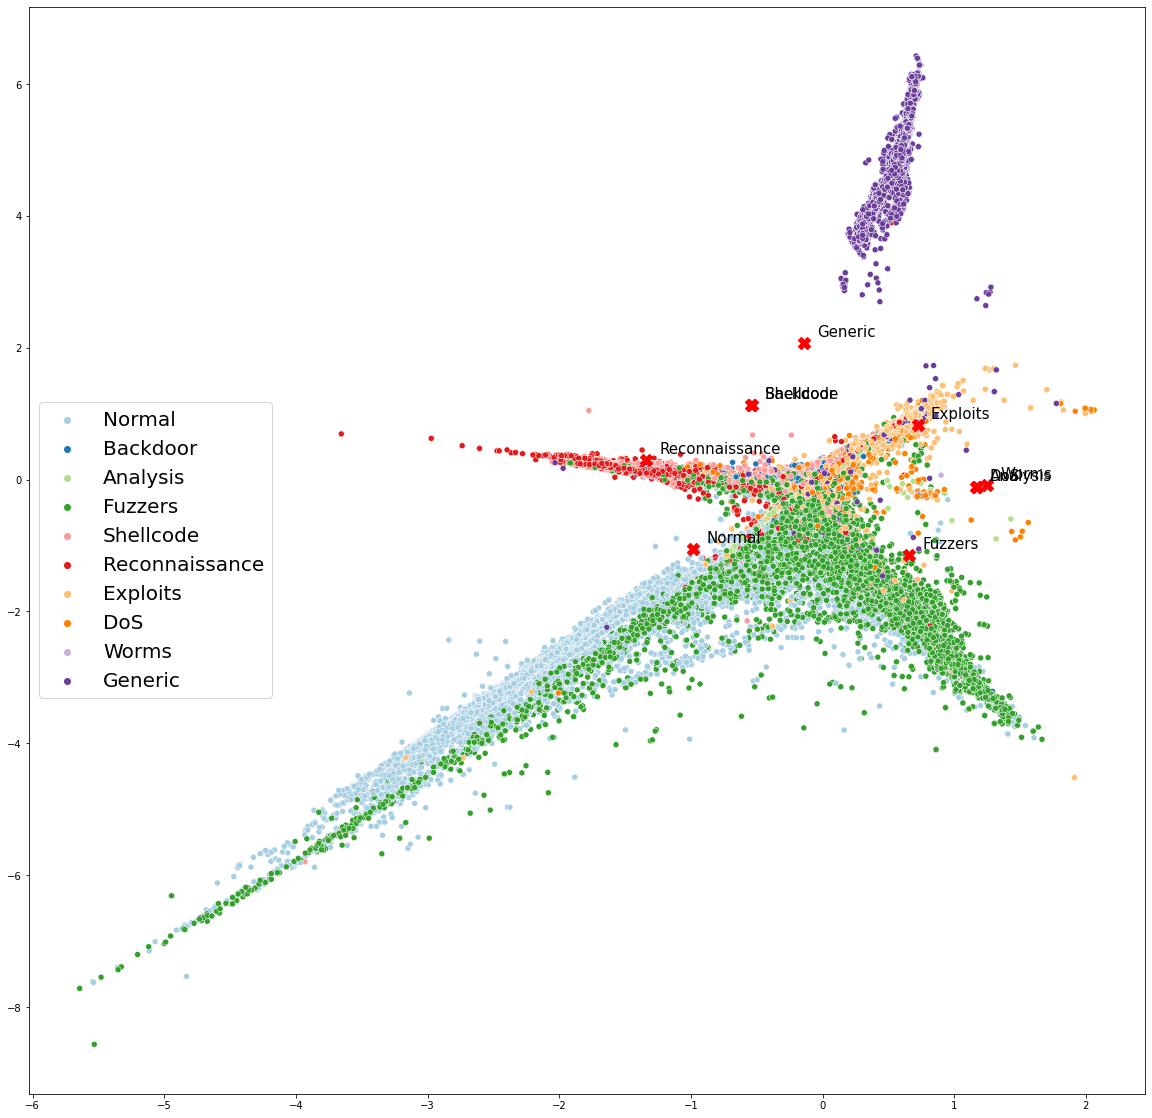

In [469]:
from matplotlib.colors import ListedColormap
#https://matplotlib.org/examples/color/colormaps_reference.html
import seaborn as sns

fig, ax = plt.subplots(figsize=(20,20))
s =sns.scatterplot(embedding_x_train[:,0],embedding_x_train[:,1], 
            hue=le4.inverse_transform(label_train),
            palette = "Paired")
plt.legend(loc='center left', prop={'size': 20})
plt.scatter(embedding_label_train[:,0],embedding_label_train[:,1], c="r", marker="X", s=150)
for i, txt in enumerate(num_classes):
    ax.annotate(txt, (embedding_label_train[i,0]+0.1, embedding_label_train[i,1]+0.1),fontsize=15)
plt.show()

#### Test set

In [470]:
embedding_x_test = np.array(model_embed_x.predict(x_test))
embedding_x_test

array([[ 0.25960012, -0.95668813],
       [ 0.55470347, -1.72543752],
       [ 0.77279678, -2.32517878],
       ...,
       [-1.65068637, -1.86706507],
       [-1.62254401, -1.82634202],
       [ 0.08334407, -0.80707965]])

In [471]:
embedding_label_test = np.array(model_embed_labels.predict(x_test))
embedding_label_test = np.stack(embedding_label_test, axis=1)[0,:,:]
print(embedding_label_test)

[[ 1.17145595 -0.11419891]
 [-0.54275246  1.13545877]
 [ 1.1661716  -0.1121722 ]
 [ 0.72268755  0.82228964]
 [ 0.65710191 -1.14083827]
 [-0.14380183  2.06477679]
 [-0.98519681 -1.05803499]
 [-1.33771269  0.30023852]
 [-0.53458375  1.13012396]
 [ 1.24897786 -0.08121625]]


d:\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


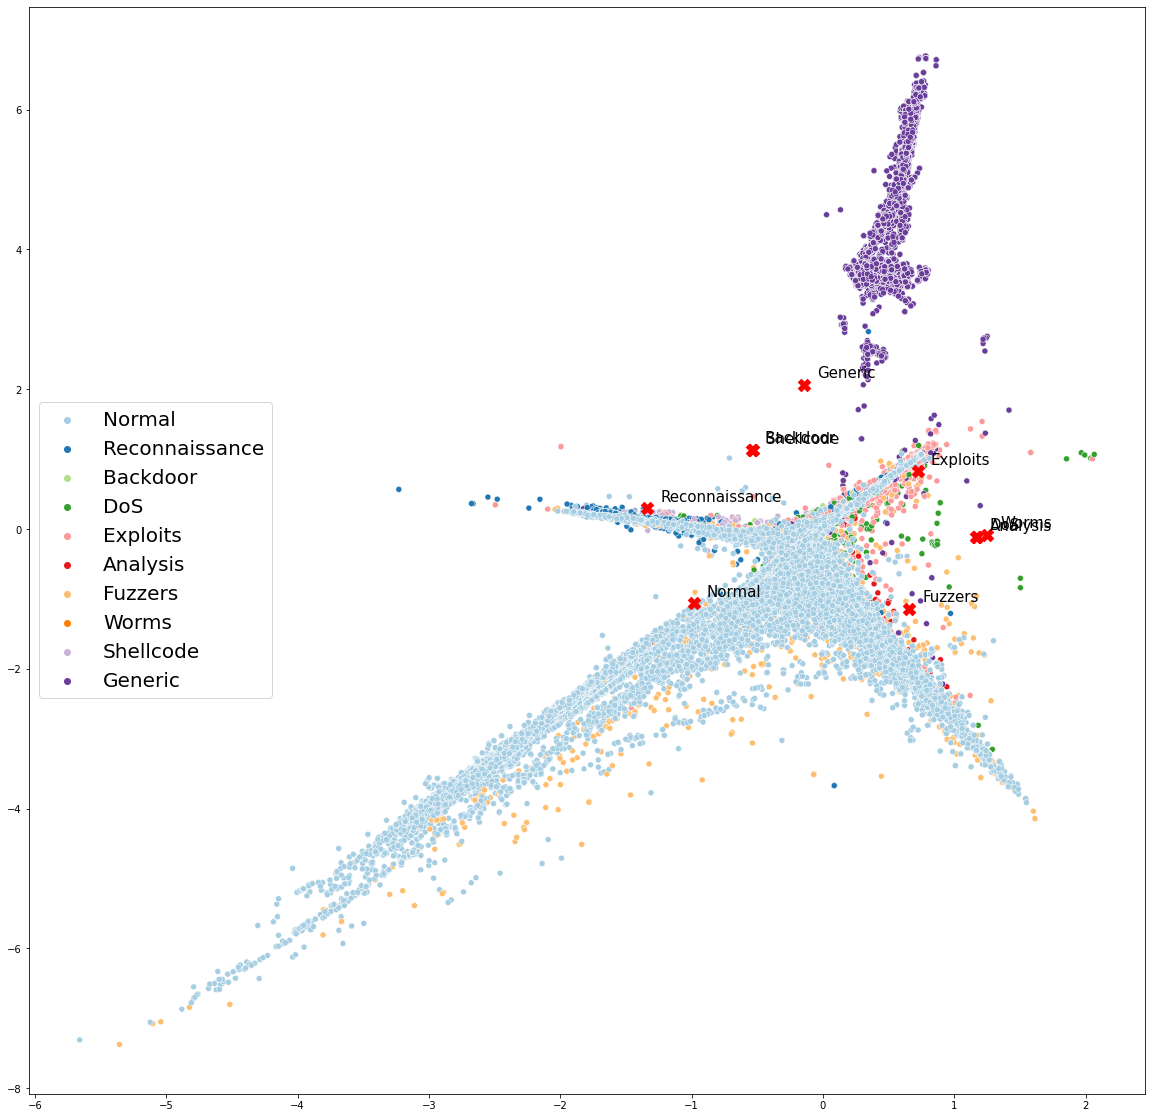

In [472]:
from matplotlib.colors import ListedColormap
#https://matplotlib.org/examples/color/colormaps_reference.html
import seaborn as sns

fig, ax = plt.subplots(figsize=(20,20))
s =sns.scatterplot(embedding_x_test[:,0],embedding_x_test[:,1], 
            hue=le4.inverse_transform(label_test),
            palette = "Paired")
plt.legend(loc='center left', prop={'size': 20})
plt.scatter(embedding_label_test[:,0],embedding_label_test[:,1], c="r", marker="X", s=150)
for i, txt in enumerate(num_classes):
    ax.annotate(txt, (embedding_label_test[i,0]+0.1, embedding_label_test[i,1]+0.1),fontsize=15)
plt.show()

### Cluster metrics

In [473]:
y_test = le4.inverse_transform(YTestAN10MOhe)
x_test = XTestM
x_train = XTrainM
label_train = YTrainAN10MOhe
label_test = YTestAN10MOhe
y_train = le4.inverse_transform(YTrainAN10MOhe)


#### Training set

####  Metrics not based on knowing the ground-truth label

In [474]:
# metricas no basadas en conocer el groun-truth label
embedding_x_train = np.array(model_embed_x.predict(x_train))
embedding_x_train

t0 = time.time()

ytrain_hat = le4.inverse_transform(labelOHEncodedFromDistances(model_mat_dist.predict(x_train)))

t1 = time.time()
print("Minutes elapsed: %f" % ((t1 - t0) / 60.))

print(embedding_x_train.shape)

Minutes elapsed: 0.133120
(175341, 2)


In [475]:
np.unique (ytrain_hat)

array(['Analysis', 'DoS', 'Exploits', 'Fuzzers', 'Generic', 'Normal',
       'Reconnaissance', 'Shellcode', 'Worms'], dtype='<U14')

In [476]:
t0 = time.time()
cal_hara_score = metrics.calinski_harabasz_score(embedding_x_train, ytrain_hat)
t1 = time.time()
print("Minutes elapsed: %f" % ((t1 - t0) / 60.))

t0 = time.time()
d_b_score = metrics.davies_bouldin_score(embedding_x_train, ytrain_hat)
t1 = time.time()
print("Minutes elapsed: %f" % ((t1 - t0) / 60.))

t0 = time.time()
sil_score = metrics.silhouette_score(embedding_x_train, ytrain_hat, metric='euclidean')
t1 = time.time()
print("Minutes elapsed: %f" % ((t1 - t0) / 60.))

Minutes elapsed: 0.000848
Minutes elapsed: 0.000823
Minutes elapsed: 5.734563


In [477]:
no_labels_cluster_metrics = pd.DataFrame({'silhouette_score': sil_score,
                              'calinski_harabasz_score': cal_hara_score,
                              'davies_bouldin_score':d_b_score},index=[1])
no_labels_cluster_metrics

silhouette_score  calinski_harabasz_score  davies_bouldin_score
1          0.320357            290467.654901              1.111607

####   Metrics based on knowing the ground-truth label

In [478]:
a_r_score = metrics.adjusted_rand_score(y_train, ytrain_hat)
a_m_i_score = metrics.adjusted_mutual_info_score(y_train, ytrain_hat)  
n_m_i_score = metrics.normalized_mutual_info_score(y_train, ytrain_hat)  
fo_ma_score = metrics.fowlkes_mallows_score(y_train, ytrain_hat)  
homo_score = metrics.homogeneity_score(y_train, ytrain_hat) 
comple_score =metrics.completeness_score(y_train, ytrain_hat)  
v_meas_score = metrics.v_measure_score(y_train, ytrain_hat)  

d:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
d:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


In [479]:
labels_cluster_metrics = pd.DataFrame({'adjusted_rand_score': a_r_score,
                              'adjusted_mutual_info_score': a_m_i_score,
                              'normalized_mutual_info_score':n_m_i_score,
                             'fowlkes_mallows_score':fo_ma_score,
                              'homogeneity_score':homo_score,
                              'completeness_score':comple_score,
                             'v_measure_score':v_meas_score,
                                      }
                                      ,index=[1])
labels_cluster_metrics

adjusted_rand_score  adjusted_mutual_info_score  \
1             0.695958                    0.634696   

   normalized_mutual_info_score  fowlkes_mallows_score  homogeneity_score  \
1                      0.689275               0.768608           0.634736   

   completeness_score  v_measure_score  
1            0.748501          0.68694

#### Test set

####  Metrics not based on knowing the ground-truth label

In [480]:
t0 = time.time()
cal_hara_score = metrics.calinski_harabasz_score(embedding_x_test, y_test_hat)
t1 = time.time()
print("Minutes elapsed: %f" % ((t1 - t0) / 60.))

t0 = time.time()
d_b_score = metrics.davies_bouldin_score(embedding_x_test, y_test_hat)
t1 = time.time()
print("Minutes elapsed: %f" % ((t1 - t0) / 60.))

t0 = time.time()
sil_score = metrics.silhouette_score(embedding_x_test, y_test_hat, metric='euclidean')
t1 = time.time()
print("Minutes elapsed: %f" % ((t1 - t0) / 60.))

Minutes elapsed: 0.000566
Minutes elapsed: 0.000482
Minutes elapsed: 1.272121


In [481]:
no_labels_cluster_metrics = pd.DataFrame({'silhouette_score': sil_score,
                              'calinski_harabasz_score': cal_hara_score,
                              'davies_bouldin_score':d_b_score},index=[1])
no_labels_cluster_metrics

silhouette_score  calinski_harabasz_score  davies_bouldin_score
1          0.258771             74593.254351              0.920091

####   Metrics based on knowing the ground-truth label

In [482]:
a_r_score = metrics.adjusted_rand_score(y_test, y_test_hat)
a_m_i_score = metrics.adjusted_mutual_info_score(y_test, y_test_hat) 
n_m_i_score = metrics.normalized_mutual_info_score(y_test, y_test_hat) 
fo_ma_score = metrics.fowlkes_mallows_score(y_test, y_test_hat) 
homo_score = metrics.homogeneity_score(y_test, y_test_hat)
comple_score =metrics.completeness_score(y_test, y_test_hat)
v_meas_score = metrics.v_measure_score(y_test, y_test_hat) 

d:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
d:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


In [483]:
labels_cluster_metrics = pd.DataFrame({'adjusted_rand_score': a_r_score,
                              'adjusted_mutual_info_score': a_m_i_score,
                              'normalized_mutual_info_score':n_m_i_score,
                             'fowlkes_mallows_score':fo_ma_score,
                              'homogeneity_score':homo_score,
                              'completeness_score':comple_score,
                             'v_measure_score':v_meas_score,
                                      }
                                      ,index=[1])
labels_cluster_metrics

adjusted_rand_score  adjusted_mutual_info_score  \
1             0.589052                    0.593788   

   normalized_mutual_info_score  fowlkes_mallows_score  homogeneity_score  \
1                      0.603269               0.698527           0.593892   

   completeness_score  v_measure_score  
1            0.612793         0.603195

## 3.7 Model: 10 labels, RLB-CL, NAMM, Embed dim: 2, Distance: Euclidean

In [713]:
le = LabelEncoder()
index_label_train = le.fit_transform (YTrainAN10)
index_label_test = le.transform (YTestAN10)

print(le4.transform(['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic','Normal', 'Reconnaissance', 'Shellcode', 'Worms']))
print(le.transform(['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic','Normal', 'Reconnaissance', 'Shellcode', 'Worms']))

x_train, x_test, label_train, label_test, y_train, y_test = XTrainM, XTestM, \
                                                            YTrainAN10MOhe, YTestAN10MOhe,\
                                                            np.zeros(len(XTrainM)), np.zeros(len(XTestM))
print (x_train.shape, x_test.shape, label_train.shape, label_test.shape, y_train.shape, y_test.shape)


[[1 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 1]]
[0 1 2 3 4 5 6 7 8 9]
(175341, 196) (82332, 196) (175341, 10) (82332, 10) (175341,) (82332,)


In [715]:
# save the best weights for predicting the test question pairs
file_name = 'CLC_ADFA_3_cplet dim2_v17 NAMS v1.1'
save_best_weights = file_name + '_best.h5'
save_last_weights = file_name + '_last.h5'
save_summary_stats = file_name + '.csv'

in_dim_x = x_train.shape[1]
in_dim_label = label_train.shape[1]
out_dim = 1 # yes, no

print(in_dim_x)
print(in_dim_label)
print(out_dim)

196
10
1


### Prepare the model

In [717]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [718]:
vocab_size = in_dim_label  
embed_dim = 2

list_labels = ['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic','Normal', 'Reconnaissance', 'Shellcode', 'Worms']

def create_all_labels(in_x):
  sal = tf.cast(tf.reshape(tf.tile(le4.transform(list_labels),
                                  [tf.shape(in_x)[0],1]),[-1,in_dim_label,in_dim_label]), 
                                   dtype=tf.float64)
  return sal


def create_model(in_dim_x,in_dim_label,embed_dim):
    
    #input X
    in_x = Input(shape=(in_dim_x,))  
    
    # Integer vector with range [0,in_dim_label-1] and length equal to X.shape[0]. Index of the correct label
    in_index_label = Input(shape=(1,),dtype=tf.int32) 
    
    in_labels = Lambda(lambda x : create_all_labels(x))(in_x) # to allow saving the weigths
    
    
    #working lists
    lst_labels=[]
    lst_dist=[]

    #embedding labels
    for i in range(in_dim_label):
        lst_labels.append(Dense(20, activation='relu')(in_labels[:,:,i]))
        lst_labels[i] = Dense(embed_dim, activation='linear')(lst_labels[i])

    #embedding of x
    u = Dense (100, activation='relu')(in_x)
    u = Dense (100, activation='relu')(u)
    x_embed = Dense(embed_dim,activation='linear')(u)

    # similarity measure
    for i in range(in_dim_label):
        lst_dist.append(Lambda(euclidean_distance,output_shape=eucl_dist_output_shape)([x_embed, lst_labels[i]]))

    mat_dist = tf.squeeze(tf.stack(lst_dist, axis=1))
    one_hot_mask = tf.reshape(tf.one_hot(in_index_label, in_dim_label, on_value = True, off_value = False, 
                                         axis = 1, dtype = tf.bool),(-1,in_dim_label))
    one_hot_mask_neg = tf.logical_not(one_hot_mask)
    dist_to_true = tf.boolean_mask(mat_dist, one_hot_mask)
    dist_to_false = tf.reshape(tf.boolean_mask(mat_dist, one_hot_mask_neg),(-1,in_dim_label-1))
    min_dist_to_false = tf.reduce_min(dist_to_false, axis = 1)
    avg_dist_to_false = tf.reduce_mean(dist_to_false, axis = 1)
    out = tf.reshape(dist_to_true - min_dist_to_false,(-1,1))
    out_avg = tf.reshape(dist_to_true - avg_dist_to_false,(-1,1))
    
    xembed_mas_distancias = tf.reshape(tf.concat([x_embed,mat_dist], axis = 1),(-1,embed_dim+in_dim_label))
    # classification output
    n = Dense (100, activation='relu')(xembed_mas_distancias)
    n = Dense (50, activation='relu')(n)
    out_classification = Dense(in_dim_label,activation='softmax')(n)

    # model outputs
    m = Model(inputs=[in_x,in_index_label],outputs= [out, out_avg]) # loss
    m_embed_x = Model(inputs=in_x, outputs= x_embed)  # embedding of x
    m_embed_labels = Model(inputs=in_x, outputs= lst_labels) #embedding of labels
    m_mat_dist = Model(inputs=in_x, outputs= mat_dist) # matrix of distances between x and labels
    m_lst_dist = Model(inputs=in_x, outputs= lst_dist) # list of distances between x and labels
    m_out_classification = Model(inputs=in_x, outputs= out_classification)  # classification output
    m_xembed_mas_distancias = Model(inputs=in_x, outputs= xembed_mas_distancias) 

    m.compile(loss=[dummy_loss_max_margin, dummy_loss_max_margin], optimizer=Adam(0.001), metrics=['mse','mse'] , loss_weights = [0.5,0.5] )
    return(m, m_embed_x , m_embed_labels, m_mat_dist, m_lst_dist, m_out_classification,m_xembed_mas_distancias)

In [719]:
#create model
model, model_embed_x , model_embed_labels, model_mat_dist, model_lst_dist, model_out_classification,model_xembed_mas_distancias = create_model(in_dim_x, in_dim_label, embed_dim) 

In [725]:
model.summary()

Model: "model_88"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_29 (InputLayer)           [(None, 196)]        0                                            
__________________________________________________________________________________________________
lambda_155 (Lambda)             (None, 10, 10)       0           input_29[0][0]                   
__________________________________________________________________________________________________
dense_361 (Dense)               (None, 100)          19700       input_29[0][0]                   
__________________________________________________________________________________________________
tf_op_layer_strided_slice_140 ( [(None, 10)]         0           lambda_155[0][0]                 
___________________________________________________________________________________________

In [726]:
model_embed_x.summary()

Model: "model_89"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_29 (InputLayer)        [(None, 196)]             0         
_________________________________________________________________
dense_361 (Dense)            (None, 100)               19700     
_________________________________________________________________
dense_362 (Dense)            (None, 100)               10100     
_________________________________________________________________
dense_363 (Dense)            (None, 2)                 202       
Total params: 30,002
Trainable params: 30,002
Non-trainable params: 0
_________________________________________________________________


In [727]:
model_embed_labels.summary()

Model: "model_90"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_29 (InputLayer)           [(None, 196)]        0                                            
__________________________________________________________________________________________________
lambda_155 (Lambda)             (None, 10, 10)       0           input_29[0][0]                   
__________________________________________________________________________________________________
tf_op_layer_strided_slice_140 ( [(None, 10)]         0           lambda_155[0][0]                 
__________________________________________________________________________________________________
tf_op_layer_strided_slice_141 ( [(None, 10)]         0           lambda_155[0][0]                 
___________________________________________________________________________________________

###  Training

In [729]:
t0 = time.time()
# Train model
callbacks = [ModelCheckpoint(save_best_weights, monitor='val_loss', save_best_only=True, mode='auto'),
             EarlyStopping(monitor='val_loss', patience=20, verbose=1, mode='auto')
            ]

history = model.fit([x_train,index_label_train],[y_train,y_train],
                    batch_size=50,
                    epochs=100,
                    validation_split=0.2,
                    verbose=1,
                    shuffle=True,
                    initial_epoch = 0,
                    callbacks=callbacks)
t1 = time.time()
print("Minutes elapsed: %f" % ((t1 - t0) / 60.))

Train on 140272 samples, validate on 35069 samples
Epoch 1/100
140272/140272 [==============================] - 24s 168us/sample - loss: 0.3172 - tf_op_layer_Reshape_52_loss: 0.5814 - tf_op_layer_Reshape_53_loss: 0.0529 - tf_op_layer_Reshape_52_mean_squared_error: 0.7813 - tf_op_layer_Reshape_53_mean_squared_error: 3.0169 - val_loss: 0.1271 - val_tf_op_layer_Reshape_52_loss: 0.2425 - val_tf_op_layer_Reshape_53_loss: 0.0117 - val_tf_op_layer_Reshape_52_mean_squared_error: 1.0116 - val_tf_op_layer_Reshape_53_mean_squared_error: 3.5413
Epoch 2/100
140272/140272 [==============================] - 16s 117us/sample - loss: 0.2675 - tf_op_layer_Reshape_52_loss: 0.5241 - tf_op_layer_Reshape_53_loss: 0.0109 - tf_op_layer_Reshape_52_mean_squared_error: 0.7003 - tf_op_layer_Reshape_53_mean_squared_error: 3.3964 - val_loss: 0.1229 - val_tf_op_layer_Reshape_52_loss: 0.2373 - val_tf_op_layer_Reshape_53_loss: 0.0084 - val_tf_op_layer_Reshape_52_mean_squared_error: 0.8818 - val_tf_op_layer_Reshape_53_

140272/140272 [==============================] - 16s 115us/sample - loss: 0.2496 - tf_op_layer_Reshape_52_loss: 0.4926 - tf_op_layer_Reshape_53_loss: 0.0067 - tf_op_layer_Reshape_52_mean_squared_error: 0.6408 - tf_op_layer_Reshape_53_mean_squared_error: 3.9700 - val_loss: 0.1203 - val_tf_op_layer_Reshape_52_loss: 0.2357 - val_tf_op_layer_Reshape_53_loss: 0.0050 - val_tf_op_layer_Reshape_52_mean_squared_error: 0.8510 - val_tf_op_layer_Reshape_53_mean_squared_error: 3.0198_52_loss: 0.4917 -
Epoch 29/100
140272/140272 [==============================] - 16s 115us/sample - loss: 0.2497 - tf_op_layer_Reshape_52_loss: 0.4928 - tf_op_layer_Reshape_53_loss: 0.0066 - tf_op_layer_Reshape_52_mean_squared_error: 0.6399 - tf_op_layer_Reshape_53_mean_squared_error: 3.9670 - val_loss: 0.1220 - val_tf_op_layer_Reshape_52_loss: 0.2387 - val_tf_op_layer_Reshape_53_loss: 0.0053 - val_tf_op_layer_Reshape_52_mean_squared_error: 0.8688 - val_tf_op_layer_Reshape_53_mean_squared_error: 3.5828
Epoch 30/100
1402

Epoch 57/100
140272/140272 [==============================] - 17s 119us/sample - loss: 0.2469 - tf_op_layer_Reshape_52_loss: 0.4879 - tf_op_layer_Reshape_53_loss: 0.0059 - tf_op_layer_Reshape_52_mean_squared_error: 0.6414 - tf_op_layer_Reshape_53_mean_squared_error: 4.3417 - val_loss: 0.1175 - val_tf_op_layer_Reshape_52_loss: 0.2307 - val_tf_op_layer_Reshape_53_loss: 0.0045 - val_tf_op_layer_Reshape_52_mean_squared_error: 0.8718 - val_tf_op_layer_Reshape_53_mean_squared_error: 3.3160
Epoch 58/100
140272/140272 [==============================] - 16s 117us/sample - loss: 0.2466 - tf_op_layer_Reshape_52_loss: 0.4874 - tf_op_layer_Reshape_53_loss: 0.0058 - tf_op_layer_Reshape_52_mean_squared_error: 0.6430 - tf_op_layer_Reshape_53_mean_squared_error: 4.3261 - val_loss: 0.1196 - val_tf_op_layer_Reshape_52_loss: 0.2350 - val_tf_op_layer_Reshape_53_loss: 0.0042 - val_tf_op_layer_Reshape_52_mean_squared_error: 0.8688 - val_tf_op_layer_Reshape_53_mean_squared_error: 3.1051 loss: 0.2466 - tf_op_l

### Inference

In [733]:
model.load_weights(save_best_weights)

In [736]:
t0 = time.time()

y_test_hat = le4.inverse_transform(labelOHEncodedFromDistances(model_mat_dist.predict(x_test)))

t1 = time.time()
print("Minutes elapsed: %f" % ((t1 - t0) / 60.))
print(y_test_hat)

Minutes elapsed: 0.097617
['Reconnaissance' 'Reconnaissance' 'Reconnaissance' ... 'Normal' 'Normal'
 'Reconnaissance']


In [737]:
# Obtain probabilities
ytest_dist_hat = model_mat_dist.predict(x_test)
ytest_prob_hat = (ytest_dist_hat-np.min(ytest_dist_hat))/(np.max(ytest_dist_hat)-np.min(ytest_dist_hat)) # escalamos 0-1
ytest_prob_hat = normalize(ytest_prob_hat, axis=1, norm='l1')
ytest_prob_hat=  1 - ytest_prob_hat

In [738]:
average_type = 'weighted' # micro' , 'weighted'
print('Performance measures on Test data')
print('Accuracy =  {}'.format(accuracy_score( le4.inverse_transform(YTestAN10MOhe),y_test_hat)))

print('F1 =  {}'.format(f1_score(le4.inverse_transform(YTestAN10MOhe),y_test_hat, average=average_type)))

print('Precision_score =  {}'.format(precision_score(le4.inverse_transform(YTestAN10MOhe),y_test_hat, average=average_type)))

print('recall_score =  {}'.format(recall_score(le4.inverse_transform(YTestAN10MOhe),y_test_hat, average=average_type)))

print('roc_auc_score =  {}'.format(roc_auc_score(YTestAN10MOhe,ytest_prob_hat)))

print('matthews_corr_score =  {}'.format(matthews_corrcoef(le4.inverse_transform(YTestAN10MOhe), y_test_hat)))

Performance measures on Test data
Accuracy =  0.6957804984696109


d:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


F1 =  0.695441249608512


d:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Precision_score =  0.7831201894892095
recall_score =  0.6957804984696109
roc_auc_score =  0.7939035332267624
matthews_corr_score =  0.6265500284599219


### Perform test evaluation one vs. rest

In [ ]:
yt_app = le4.inverse_transform(YTestAN10MOhe)
perf_per_class = pd.DataFrame(index=range(len(pd.Series(le4.inverse_transform(YTestAN10MOhe)).unique())),columns=['name', 'acc','f1', 'pre','rec'])
for i,x in enumerate(pd.Series(le4.inverse_transform(YTestAN10MOhe)).value_counts().index):
    y_test_hat_check = y_test_hat.copy()
    y_test_hat_check[y_test_hat_check != x] = 'OTHER'
    yt_app = le4.inverse_transform(YTestAN10MOhe).copy()
    yt_app[yt_app != x] = 'OTHER'
    ac=accuracy_score( yt_app,y_test_hat_check)
    f1=f1_score( yt_app,y_test_hat_check,pos_label=x, average='binary')
    pr=precision_score( yt_app,y_test_hat_check,pos_label=x, average='binary')
    re=recall_score( yt_app,y_test_hat_check,pos_label=x, average='binary')
    perf_per_class.iloc[i]=[x,ac,f1,pr,re]

In [741]:
# performance measures per class for test data
perf_per_class

name       acc          f1       pre         rec
0          Normal  0.854504     0.81265  0.964401    0.702162
1         Generic  0.991158    0.980372  0.997914    0.963436
2        Exploits  0.885306    0.683959  0.545047    0.917894
3         Fuzzers  0.925217    0.020366  0.286996   0.0105576
4             DoS  0.950238  0.00678788  0.388889  0.00342382
5  Reconnaissance  0.806163    0.261192  0.155813    0.806922
6        Analysis  0.991777           0         0           0
7        Backdoor  0.992919           0         0           0
8       Shellcode  0.994838           0         0           0
9           Worms  0.999441    0.233333    0.4375    0.159091

###  Cluster visualization 

#### Training set

In [742]:
num_classes = ['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic','Normal', 'Reconnaissance', 'Shellcode', 'Worms']

In [743]:
embedding_x_train = np.array(model_embed_x.predict(x_train))
embedding_x_train

array([[ 0.03476532,  0.4354415 ],
       [-0.88796464,  1.66333407],
       [-1.58409443,  1.87724039],
       ...,
       [-1.91899646, -1.88465746],
       [-1.67378473, -1.5861167 ],
       [-1.73684817, -1.6476039 ]])

In [744]:
embedding_label_train = np.array(model_embed_labels.predict(x_train))
embedding_label_train = np.stack(embedding_label_train, axis=1)[0,:,:]
print(embedding_label_train)

[[ -0.04128715  -0.24777737]
 [ -0.04077319  -0.24845369]
 [ -0.04256785  -0.24781979]
 [ -0.64765872   0.56093927]
 [ -0.03890092  -0.24545826]
 [ -0.82169376  -0.90225524]
 [  0.71478628   0.42636623]
 [ -0.04312389  -0.24483893]
 [ -0.03739212  -0.24720499]
 [-12.49543981  -6.00170927]]


d:\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


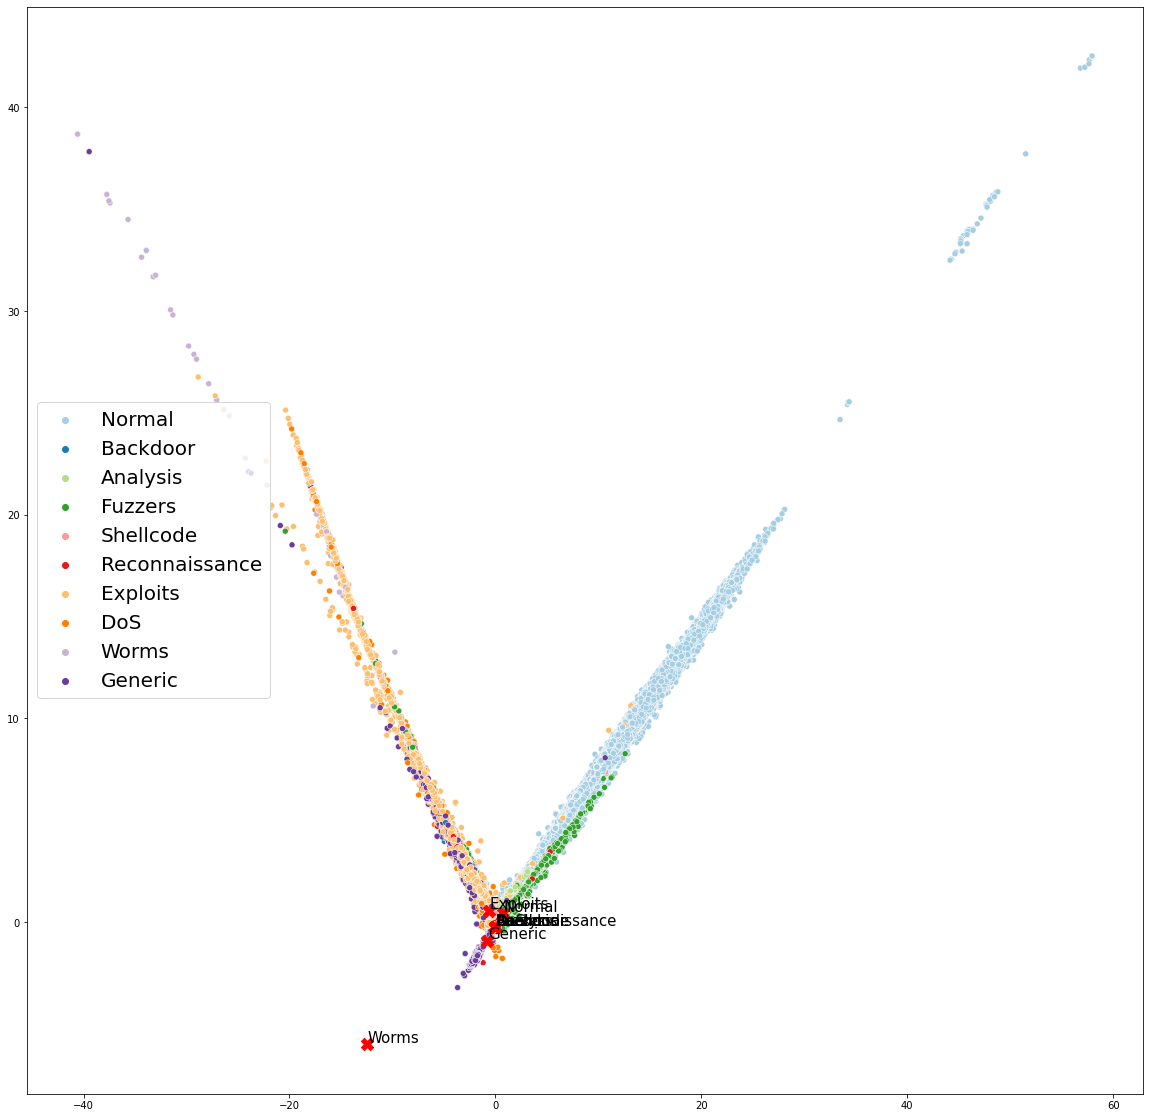

In [745]:
from matplotlib.colors import ListedColormap
#https://matplotlib.org/examples/color/colormaps_reference.html
import seaborn as sns

fig, ax = plt.subplots(figsize=(20,20))
s =sns.scatterplot(embedding_x_train[:,0],embedding_x_train[:,1], 
            hue=le4.inverse_transform(label_train),
            palette = "Paired")
plt.legend(loc='center left', prop={'size': 20})
plt.scatter(embedding_label_train[:,0],embedding_label_train[:,1], c="r", marker="X", s=150)
for i, txt in enumerate(num_classes):
    ax.annotate(txt, (embedding_label_train[i,0]+0.1, embedding_label_train[i,1]+0.1),fontsize=15)
plt.show()

#### Test set

In [746]:
embedding_x_test = np.array(model_embed_x.predict(x_test))
embedding_x_test

array([[ 0.02922005,  0.43574768],
       [ 0.02922005,  0.43574768],
       [ 0.02922005,  0.43574768],
       ...,
       [10.56374561,  8.21762336],
       [10.62869314,  8.25873257],
       [ 0.02922005,  0.43574768]])

In [747]:
embedding_label_test = np.array(model_embed_labels.predict(x_test))
embedding_label_test = np.stack(embedding_label_test, axis=1)[0,:,:]
print(embedding_label_test)

[[ -0.04128715  -0.24777737]
 [ -0.04077319  -0.24845369]
 [ -0.04256785  -0.24781979]
 [ -0.64765872   0.56093927]
 [ -0.03890092  -0.24545826]
 [ -0.82169376  -0.90225524]
 [  0.71478628   0.42636623]
 [ -0.04312389  -0.24483893]
 [ -0.03739212  -0.24720499]
 [-12.49543981  -6.00170927]]


d:\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


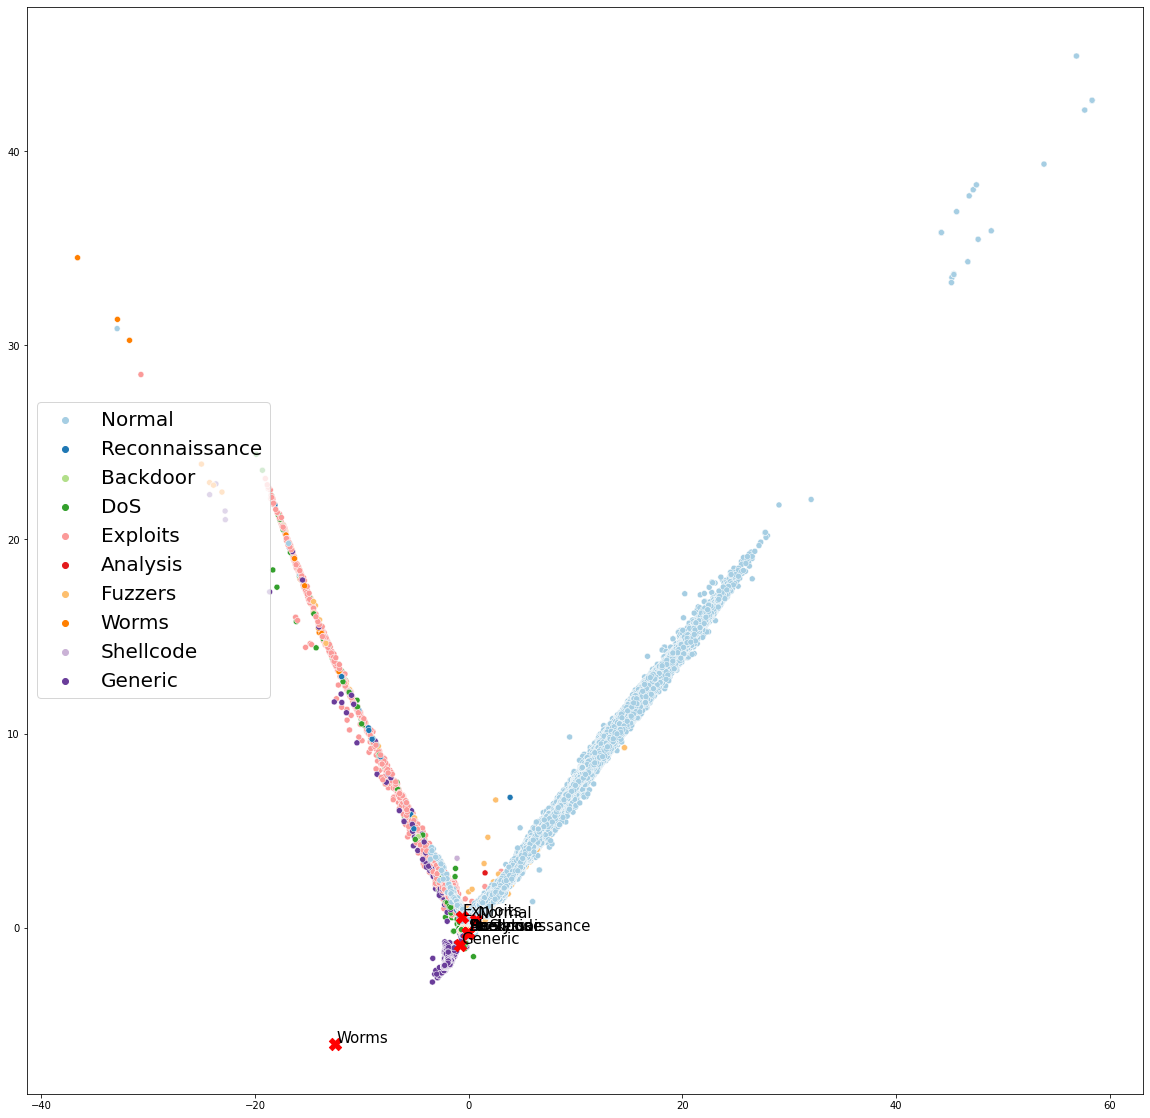

In [748]:
from matplotlib.colors import ListedColormap
#https://matplotlib.org/examples/color/colormaps_reference.html
import seaborn as sns

fig, ax = plt.subplots(figsize=(20,20))
s =sns.scatterplot(embedding_x_test[:,0],embedding_x_test[:,1], 
            hue=le4.inverse_transform(label_test),
            palette = "Paired")
plt.legend(loc='center left', prop={'size': 20})
plt.scatter(embedding_label_test[:,0],embedding_label_test[:,1], c="r", marker="X", s=150)
for i, txt in enumerate(num_classes):
    ax.annotate(txt, (embedding_label_test[i,0]+0.1, embedding_label_test[i,1]+0.1),fontsize=15)
plt.show()

### Cluster metrics

In [749]:
y_test = le4.inverse_transform(YTestAN10MOhe)
x_test = XTestM
x_train = XTrainM
label_train = YTrainAN10MOhe
label_test = YTestAN10MOhe
y_train = le4.inverse_transform(YTrainAN10MOhe)


#### Training set

####  Metrics not based on knowing the ground-truth label

In [750]:
# metricas no basadas en conocer el groun-truth label
embedding_x_train = np.array(model_embed_x.predict(x_train))
embedding_x_train

t0 = time.time()

ytrain_hat = le4.inverse_transform(labelOHEncodedFromDistances(model_mat_dist.predict(x_train)))

t1 = time.time()
print("Minutes elapsed: %f" % ((t1 - t0) / 60.))

print(embedding_x_train.shape)

Minutes elapsed: 0.212846
(175341, 2)


In [751]:
np.unique (ytrain_hat)

array(['Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic', 'Normal',
       'Reconnaissance', 'Shellcode', 'Worms'], dtype='<U14')

In [752]:
t0 = time.time()
cal_hara_score = metrics.calinski_harabasz_score(embedding_x_train, ytrain_hat)
t1 = time.time()
print("Minutes elapsed: %f" % ((t1 - t0) / 60.))

t0 = time.time()
d_b_score = metrics.davies_bouldin_score(embedding_x_train, ytrain_hat)
t1 = time.time()
print("Minutes elapsed: %f" % ((t1 - t0) / 60.))

t0 = time.time()
sil_score = metrics.silhouette_score(embedding_x_train, ytrain_hat, metric='euclidean')
t1 = time.time()
print("Minutes elapsed: %f" % ((t1 - t0) / 60.))

Minutes elapsed: 0.000848
Minutes elapsed: 0.000796
Minutes elapsed: 5.731647


In [753]:
no_labels_cluster_metrics = pd.DataFrame({'silhouette_score': sil_score,
                              'calinski_harabasz_score': cal_hara_score,
                              'davies_bouldin_score':d_b_score},index=[1])
no_labels_cluster_metrics

silhouette_score  calinski_harabasz_score  davies_bouldin_score
1          0.318521             63437.661107              0.821094

####   Metrics based on knowing the ground-truth label

In [754]:
a_r_score = metrics.adjusted_rand_score(y_train, ytrain_hat)
a_m_i_score = metrics.adjusted_mutual_info_score(y_train, ytrain_hat)  
n_m_i_score = metrics.normalized_mutual_info_score(y_train, ytrain_hat)  
fo_ma_score = metrics.fowlkes_mallows_score(y_train, ytrain_hat)  
homo_score = metrics.homogeneity_score(y_train, ytrain_hat) 
comple_score =metrics.completeness_score(y_train, ytrain_hat)  
v_meas_score = metrics.v_measure_score(y_train, ytrain_hat)  

d:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
d:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


In [755]:
labels_cluster_metrics = pd.DataFrame({'adjusted_rand_score': a_r_score,
                              'adjusted_mutual_info_score': a_m_i_score,
                              'normalized_mutual_info_score':n_m_i_score,
                             'fowlkes_mallows_score':fo_ma_score,
                              'homogeneity_score':homo_score,
                              'completeness_score':comple_score,
                             'v_measure_score':v_meas_score,
                                      }
                                      ,index=[1])
labels_cluster_metrics

adjusted_rand_score  adjusted_mutual_info_score  \
1             0.668442                    0.584837   

   normalized_mutual_info_score  fowlkes_mallows_score  homogeneity_score  \
1                      0.654409               0.749168           0.584883   

   completeness_score  v_measure_score  
1            0.732201         0.650303

#### Test set

####  Metrics not based on knowing the ground-truth label

In [756]:
t0 = time.time()
cal_hara_score = metrics.calinski_harabasz_score(embedding_x_test, y_test_hat)
t1 = time.time()
print("Minutes elapsed: %f" % ((t1 - t0) / 60.))

t0 = time.time()
d_b_score = metrics.davies_bouldin_score(embedding_x_test, y_test_hat)
t1 = time.time()
print("Minutes elapsed: %f" % ((t1 - t0) / 60.))

t0 = time.time()
sil_score = metrics.silhouette_score(embedding_x_test, y_test_hat, metric='euclidean')
t1 = time.time()
print("Minutes elapsed: %f" % ((t1 - t0) / 60.))

Minutes elapsed: 0.000499
Minutes elapsed: 0.000482
Minutes elapsed: 1.285407


In [757]:
no_labels_cluster_metrics = pd.DataFrame({'silhouette_score': sil_score,
                              'calinski_harabasz_score': cal_hara_score,
                              'davies_bouldin_score':d_b_score},index=[1])
no_labels_cluster_metrics

silhouette_score  calinski_harabasz_score  davies_bouldin_score
1           0.34555             23542.863681              0.800094

####   Metrics based on knowing the ground-truth label

In [758]:
a_r_score = metrics.adjusted_rand_score(y_test, y_test_hat)
a_m_i_score = metrics.adjusted_mutual_info_score(y_test, y_test_hat) 
n_m_i_score = metrics.normalized_mutual_info_score(y_test, y_test_hat) 
fo_ma_score = metrics.fowlkes_mallows_score(y_test, y_test_hat) 
homo_score = metrics.homogeneity_score(y_test, y_test_hat)
comple_score =metrics.completeness_score(y_test, y_test_hat)
v_meas_score = metrics.v_measure_score(y_test, y_test_hat) 

d:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
d:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


In [759]:
labels_cluster_metrics = pd.DataFrame({'adjusted_rand_score': a_r_score,
                              'adjusted_mutual_info_score': a_m_i_score,
                              'normalized_mutual_info_score':n_m_i_score,
                             'fowlkes_mallows_score':fo_ma_score,
                              'homogeneity_score':homo_score,
                              'completeness_score':comple_score,
                             'v_measure_score':v_meas_score,
                                      }
                                      ,index=[1])
labels_cluster_metrics

adjusted_rand_score  adjusted_mutual_info_score  \
1               0.5661                    0.557952   

   normalized_mutual_info_score  fowlkes_mallows_score  homogeneity_score  \
1                      0.587611               0.683538           0.558055   

   completeness_score  v_measure_score  
1            0.618733          0.58683

## 3.8 Model: 10 labels, LB-CL, MMoLE, Embed dim: 2, Distance: Euclidean

In [109]:
x_train, x_test, label_train_p, label_train_n, label_test_p, label_test_n,y_train, y_test = \
                                                            XTrainM10_extended2, XTestM10_extended2, \
                                                            YTrainANMOhe10_extended_true, YTrainANMOhe10_extended_false,\
                                                            YTestANMOhe10_extended_true, YTestANMOhe10_extended_false,\
                                                            np.zeros(len(XTrainM)*(YTrainAN10MOhe.shape[1]-1)), np.zeros(len(XTestM)*(YTrainAN10MOhe.shape[1]-1))
print (x_train.shape, x_test.shape, 
       label_train_p.shape, label_train_n.shape,
       label_test_p.shape, label_test_n.shape, 
       y_train.shape, y_test.shape)



(1578069, 196) (740988, 196) (1578069, 10) (1578069, 10) (740988, 10) (740988, 10) (1578069,) (740988,)


In [111]:
# save the best weights for predicting the test question pairs
file_name = 'CLC_ADFA_3_3 MMoLE v1.0'
save_best_weights = file_name + '_best.h5'
save_last_weights = file_name + '_last.h5'
save_summary_stats = file_name + '.csv'

in_dim_x = x_train.shape[1]
in_dim_label = label_train.shape[1]
out_dim = 1 # yes, no

print(in_dim_x)
print(in_dim_label)
print(out_dim)

196
10
1


### Prepare the model

In [114]:
vocab_size = in_dim_label  
embed_dim = 2

def create_model(in_dim_x,in_dim_label,out_dim,embed_dim):
    # input variables
    in_x = Input(shape=(in_dim_x,))
    in_label_p = Input(shape=(in_dim_label,))
    in_label_n = Input(shape=(in_dim_label,))

    dd1 = Dense (50, activation='relu')
    dd2 = Dense (50, activation='relu')
    

    #embedding of x
    u = Dense (100, activation='relu')(in_x)
    u = Dense (50, activation='relu')(u)
    x_embed = Dense(embed_dim,activation='linear')(u)
    
    #embedding of label p
    v1 = dd1(in_label_p)
    v1 = dd2(v1)
    label_embed_p = Dense(embed_dim,activation='linear')(v1)
    #embedding of label n
    v2 = dd1(in_label_n)
    v2 = dd2(v2)
    label_embed_n = Dense(embed_dim,activation='linear')(v2)

    # similarity measure
    distance_p = Lambda(euclidean_distance,
                  output_shape=eucl_dist_output_shape)([x_embed, label_embed_p])
    distance_n = Lambda(euclidean_distance,
                  output_shape=eucl_dist_output_shape)([x_embed, label_embed_n])

    distance = distance_p - distance_n
    
    m_dist = tf.concat([distance_p, distance_n], axis=1)
    
    # training model
    m = Model(inputs=[in_x, in_label_p, in_label_n], outputs= distance) # return probability
    m_embed_x = Model(inputs=in_x, outputs= x_embed) # return embedding of x
    m_embed_label = Model(inputs= in_label_p, outputs= label_embed_p) # return label embedding
    m_embed_distances = Model(inputs=[in_x, in_label_p, in_label_n], outputs= m_dist)
    m_embed_distance_p = Model(inputs=[in_x, in_label_p], outputs= distance_p)
    
    m.compile(loss=dummy_loss_max_margin, optimizer=Adam(0.001), metrics=['mse'])
    return(m, m_embed_x , m_embed_label, m_embed_distances, m_embed_distance_p)

In [115]:
#create model
model, model_embed_x , model_embed_label, model_mat_dist, model_dist_p = create_model(in_dim_x,in_dim_label,out_dim,embed_dim) 

In [116]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 196)]        0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 10)]         0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 10)]         0                                            
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 100)          19700       input_1[0][0]                    
______________________________________________________________________________________________

In [117]:
model_embed_x.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 196)]             0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               19700     
_________________________________________________________________
dense_3 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 102       
Total params: 24,852
Trainable params: 24,852
Non-trainable params: 0
_________________________________________________________________


In [118]:
model_embed_label.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 10)]              0         
_________________________________________________________________
dense (Dense)                (None, 50)                550       
_________________________________________________________________
dense_1 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 102       
Total params: 3,202
Trainable params: 3,202
Non-trainable params: 0
_________________________________________________________________


### Training

In [121]:
t0 = time.time()
# Train the model
callbacks = [ModelCheckpoint(save_best_weights, monitor='val_loss', save_best_only=True, mode='auto'),
             EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='auto')
            ]

history = model.fit([x_train, label_train_p , label_train_n],y_train,
                    batch_size=100,
                    epochs=100,
                    validation_split=0.2,
                    verbose=1,
                    shuffle=True,
                    initial_epoch = 0,
                    callbacks=callbacks)
t1 = time.time()
print("Minutes elapsed: %f" % ((t1 - t0) / 60.))

Train on 1262455 samples, validate on 315614 samples
Epoch 1/100
1262455/1262455 [==============================] - 40s 31us/sample - loss: 5.3616e-04 - mse: 2.9953 - val_loss: 0.0000e+00 - val_mse: 2.6912
Epoch 2/100
1262455/1262455 [==============================] - 36s 28us/sample - loss: 0.0000e+00 - mse: 3.0039 - val_loss: 0.0000e+00 - val_mse: 2.6912
Epoch 3/100
1262455/1262455 [==============================] - 36s 29us/sample - loss: 0.0000e+00 - mse: 3.0039 - val_loss: 0.0000e+00 - val_mse: 2.6912
Epoch 4/100
1262455/1262455 [==============================] - 35s 28us/sample - loss: 0.0000e+00 - mse: 3.0039 - val_loss: 0.0000e+00 - val_mse: 2.6912
Epoch 5/100
1262455/1262455 [==============================] - 36s 28us/sample - loss: 0.0000e+00 - mse: 3.0039 - val_loss: 0.0000e+00 - val_mse: 2.6912
Epoch 6/100
1262455/1262455 [==============================] - 36s 28us/sample - loss: 0.0000e+00 - mse: 3.0039 - val_loss: 0.0000e+00 - val_mse: 2.6912
Epoch 7/100
1262455/1262455 [

### Inference

In [125]:
model.load_weights(save_best_weights)

In [126]:
t0 = time.time()

total_label_test =[np.tile(le4.transform([i]),(len(YTestAN10MOhe),1)) for i in ['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic','Normal', 'Reconnaissance', 'Shellcode', 'Worms']]
ytest_dist_hat = np.column_stack([model_dist_p.predict([XTestM,i]) for i in total_label_test])
ytest_dist_hat.shape

t1 = time.time()
print("Minutes elapsed: %f" % ((t1 - t0) / 60.))


Minutes elapsed: 0.380510


In [127]:
y_test_hat = le4.inverse_transform(labelOHEncodedFromDistances(ytest_dist_hat))
y_test_hat

array(['Generic', 'Generic', 'Generic', ..., 'Normal', 'Normal',
       'Generic'], dtype='<U14')

In [128]:
# Obtain probabilities
ytest_prob_hat = (ytest_dist_hat-np.min(ytest_dist_hat))/(np.max(ytest_dist_hat)-np.min(ytest_dist_hat)) # escalamos 0-1
ytest_prob_hat = normalize(ytest_prob_hat, axis=1, norm='l1')
ytest_prob_hat=  1 - ytest_prob_hat

In [129]:
average_type = 'weighted' # micro' , 'weighted'
print('Performance measures on Test data')
print('Accuracy =  {}'.format(accuracy_score( le4.inverse_transform(YTestAN10MOhe),y_test_hat)))

print('F1 =  {}'.format(f1_score(le4.inverse_transform(YTestAN10MOhe),y_test_hat, average=average_type)))

print('Precision_score =  {}'.format(precision_score(le4.inverse_transform(YTestAN10MOhe),y_test_hat, average=average_type)))

print('recall_score =  {}'.format(recall_score(le4.inverse_transform(YTestAN10MOhe),y_test_hat, average=average_type)))

print('roc_auc_score =  {}'.format(roc_auc_score(YTestAN10MOhe,ytest_prob_hat)))

print('matthews_corr_score =  {}'.format(matthews_corrcoef(le4.inverse_transform(YTestAN10MOhe), y_test_hat)))

Performance measures on Test data
Accuracy =  0.27590730214254483


d:\anaconda\envs\tensorflow2-new\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


F1 =  0.17360246078278802


d:\anaconda\envs\tensorflow2-new\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Precision_score =  0.49750206916411266
recall_score =  0.27590730214254483
roc_auc_score =  0.5463733109256158
matthews_corr_score =  0.13765915218334354


### Perform test evaluation one vs. rest

In [133]:
yt_app = le4.inverse_transform(YTestAN10MOhe)
perf_per_class = pd.DataFrame(index=range(len(pd.Series(le4.inverse_transform(YTestAN10MOhe)).unique())),columns=['name', 'acc','f1', 'pre','rec'])
for i,x in enumerate(pd.Series(le4.inverse_transform(YTestAN10MOhe)).value_counts().index):
    y_test_hat_check = y_test_hat.copy()
    y_test_hat_check[y_test_hat_check != x] = 'OTHER'
    yt_app = le4.inverse_transform(YTestAN10MOhe).copy()
    yt_app[yt_app != x] = 'OTHER'
    ac=accuracy_score( yt_app,y_test_hat_check)
    f1=f1_score( yt_app,y_test_hat_check,pos_label=x, average='binary')
    pr=precision_score( yt_app,y_test_hat_check,pos_label=x, average='binary')
    re=recall_score( yt_app,y_test_hat_check,pos_label=x, average='binary')
    perf_per_class.iloc[i]=[x,ac,f1,pr,re]

d:\anaconda\envs\tensorflow2-new\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
d:\anaconda\envs\tensorflow2-new\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [134]:
# performance measures per class for test data
perf_per_class

name       acc          f1       pre          rec
0          Normal  0.595127    0.187689  0.954163     0.104081
1         Generic  0.279758    0.388777   0.24133     0.999364
2        Exploits  0.864791           0         0            0
3         Fuzzers  0.926116  0.00196883  0.181818  0.000989772
4             DoS  0.949631           0         0            0
5  Reconnaissance  0.957538           0         0            0
6        Analysis  0.991765           0         0            0
7        Backdoor  0.992919           0         0            0
8       Shellcode  0.994704           0         0            0
9           Worms  0.999466           0         0            0

###  Cluster visualization

In [135]:
y_test = le4.inverse_transform(YTestAN10MOhe)
x_test = XTestM
x_train = XTrainM
label_train = YTrainAN10MOhe
label_test = YTestAN10MOhe
y_train = le4.inverse_transform(YTrainAN10MOhe)


#### Training set

In [136]:
embedding_x_train = np.array(model_embed_x.predict(x_train))
embedding_x_train

array([[-1.38505629,  0.03280801],
       [-1.66109623,  0.0151824 ],
       [-1.58830529,  0.01710977],
       ...,
       [-1.04483222, -0.02758902],
       [-1.38055564, -0.05418793],
       [-1.37966741, -0.05137858]])

In [137]:
embedding_label_train = np.array(model_embed_label(label_train))
embedding_label_train = np.unique(embedding_label_train, axis=0)
print(embedding_label_train)

[[-0.8563148  -0.03229022]
 [-0.8563148  -0.03229022]
 [-0.85072132 -0.05133117]
 [-0.81735102  0.03658518]
 [-0.78886647  0.08205513]
 [-0.77684927  0.15180641]
 [-0.76689396  0.07099965]
 [-0.7623854   0.09099379]
 [-0.713987    0.13560743]
 [-0.70753457  0.10986217]
 [-0.67632617  0.03315678]]


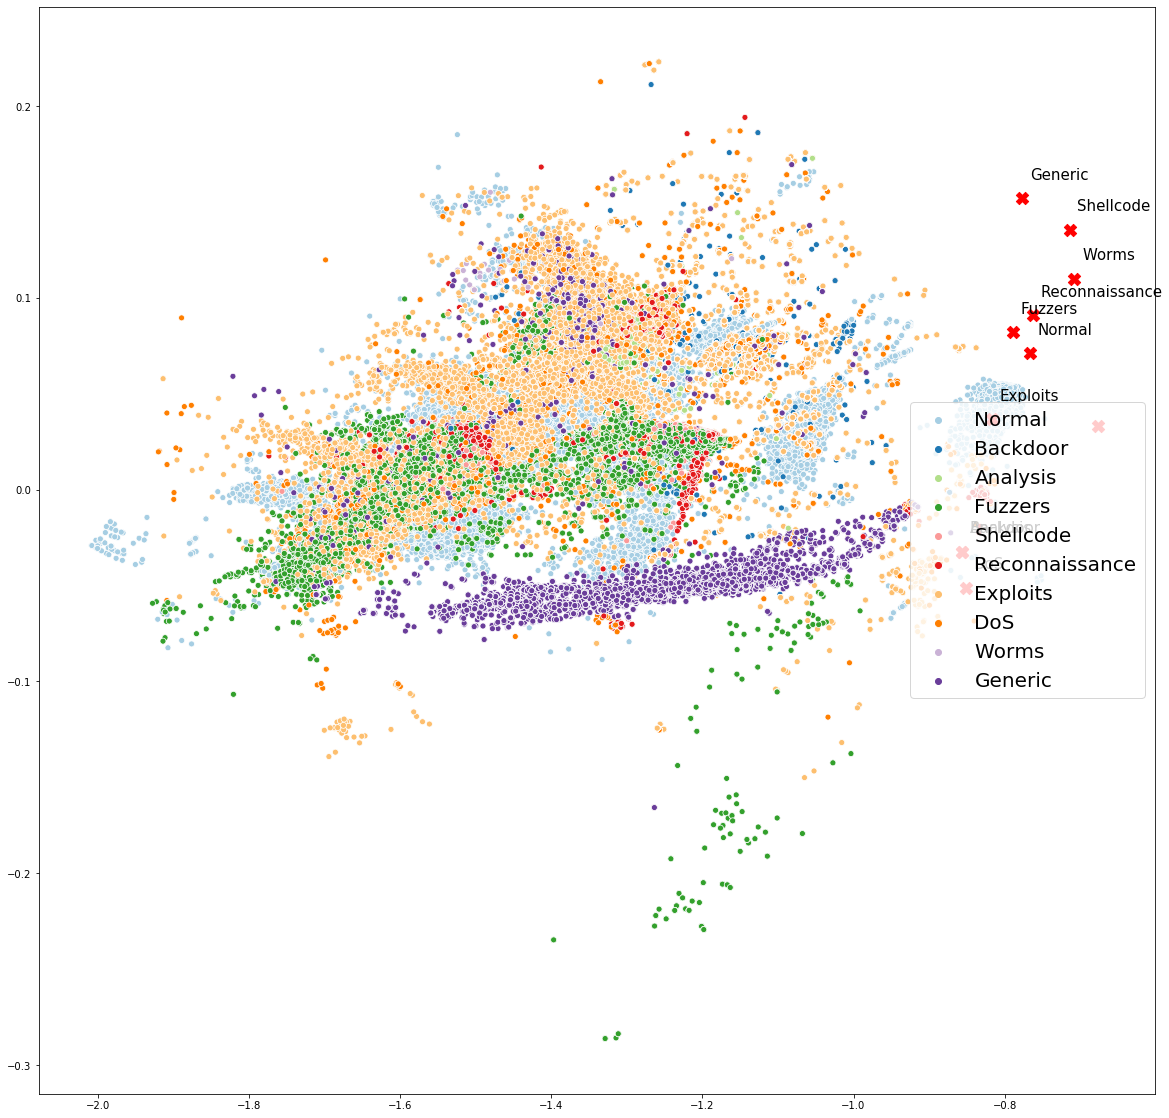

In [139]:
from matplotlib.colors import ListedColormap
#https://matplotlib.org/examples/color/colormaps_reference.html
import seaborn as sns

num_classes =['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic','Normal', 'Reconnaissance', 'Shellcode', 'Worms']

fig, ax = plt.subplots(figsize=(20,20))
s =sns.scatterplot(embedding_x_train[:,0],embedding_x_train[:,1], 
            hue=le4.inverse_transform(label_train),
            palette = "Paired")
plt.legend(loc='center right', prop={'size': 20})
plt.scatter(embedding_label_train[:,0],embedding_label_train[:,1], c="r", marker="X", s=150)
for i, txt in enumerate(num_classes):
    ax.annotate(txt, (embedding_label_train[i,0]+0.01, embedding_label_train[i,1]+0.01),fontsize=15)
plt.show()

#### Test set

In [140]:
embedding_x_test = np.array(model_embed_x.predict(x_test))
embedding_x_test

array([[-1.24840528,  0.03347538],
       [-1.31480129,  0.03272588],
       [-1.30057706,  0.03234549],
       ...,
       [-0.9363784 ,  0.08038183],
       [-0.92567495,  0.08628755],
       [-1.16600238,  0.02626393]])

In [141]:
embedding_label_test = np.array(model_embed_label(label_test))
embedding_label_test = np.unique(embedding_label_test, axis=0)
print(embedding_label_test)

[[-0.8563148  -0.03229022]
 [-0.85072132 -0.05133117]
 [-0.81735102  0.03658518]
 [-0.78886647  0.08205513]
 [-0.77684927  0.15180641]
 [-0.76689396  0.07099965]
 [-0.7623854   0.09099379]
 [-0.713987    0.13560743]
 [-0.70753457  0.10986217]
 [-0.67632617  0.03315678]]


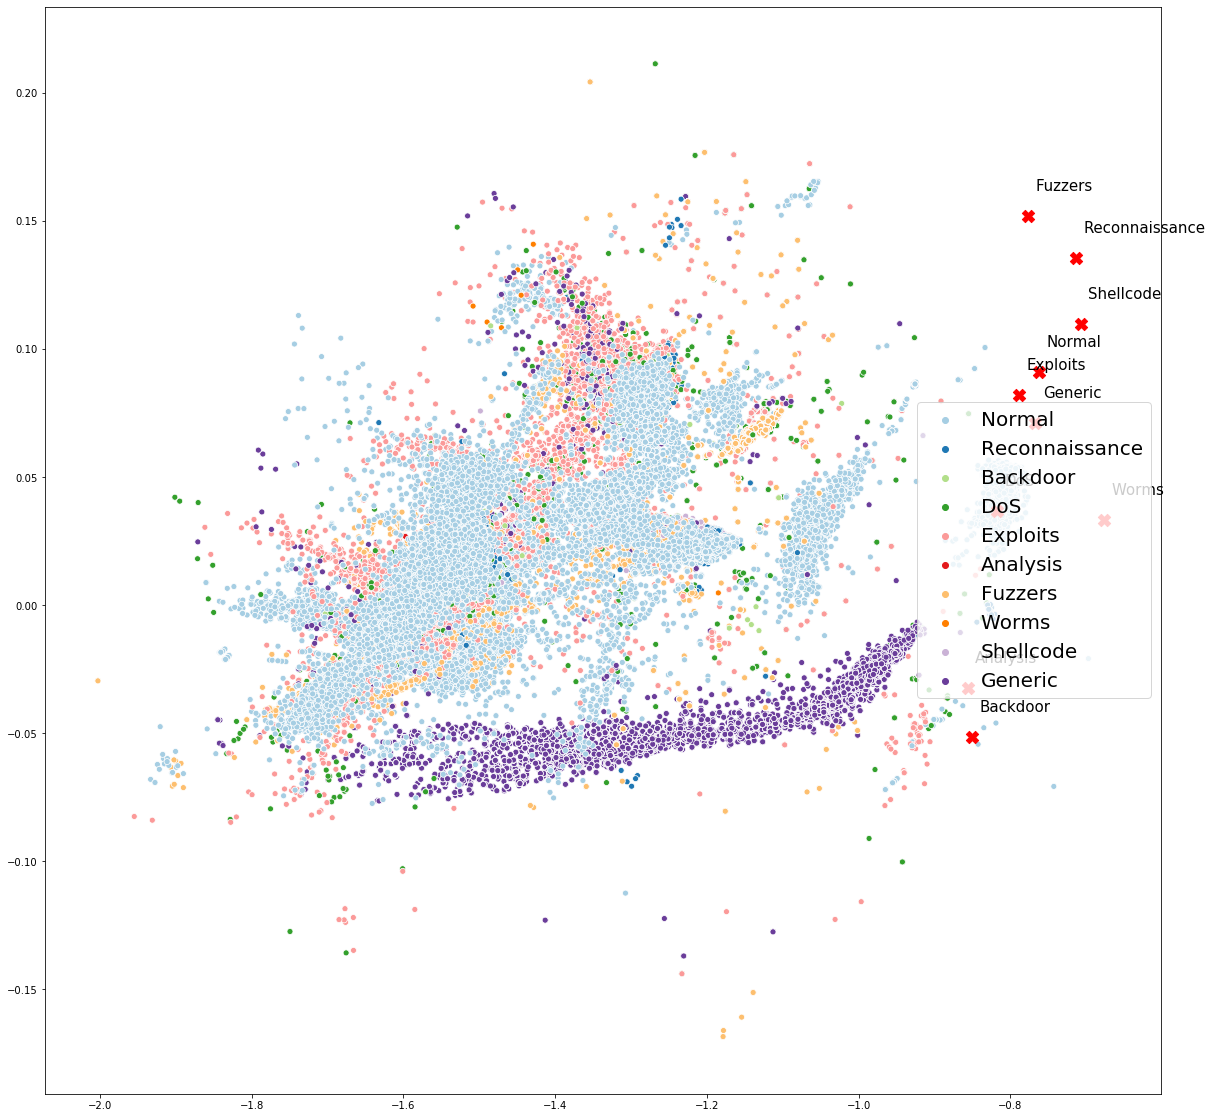

In [142]:
from matplotlib.colors import ListedColormap
#https://matplotlib.org/examples/color/colormaps_reference.html
import seaborn as sns

num_classes =['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic','Normal', 'Reconnaissance', 'Shellcode', 'Worms']

fig, ax = plt.subplots(figsize=(20,20))
s =sns.scatterplot(embedding_x_test[:,0],embedding_x_test[:,1], 
            hue=le4.inverse_transform(label_test),
            palette = "Paired")
plt.legend(loc='center right', prop={'size': 20})
plt.scatter(embedding_label_test[:,0],embedding_label_test[:,1], c="r", marker="X", s=150)
for i, txt in enumerate(num_classes):
    ax.annotate(txt, (embedding_label_test[i,0]+0.01, embedding_label_test[i,1]+0.01),fontsize=15)
plt.show()

### Cluster metrics

#### Training set

####  Metrics not based on knowing the ground-truth label

In [143]:
# metricas no basadas en conocer el groun-truth label
embedding_x_train = np.array(model_embed_x.predict(x_train))
embedding_x_train

t0 = time.time()

total_label_train =[np.tile(le4.transform([i]),(len(YTrainAN10MOhe),1)) for i in ['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic','Normal', 'Reconnaissance', 'Shellcode', 'Worms']]
ytrain_dist_hat = np.column_stack([model_dist_p.predict([XTrainM,i]) for i in total_label_train])
ytrain_hat = le4.inverse_transform(labelOHEncodedFromDistances(ytrain_dist_hat))

t1 = time.time()
print("Minutes elapsed: %f" % ((t1 - t0) / 60.))



Minutes elapsed: 0.808599


In [144]:
t0 = time.time()
cal_hara_score = metrics.calinski_harabasz_score(embedding_x_train, ytrain_hat)
t1 = time.time()
print("Minutes elapsed: %f" % ((t1 - t0) / 60.))

t0 = time.time()
d_b_score = metrics.davies_bouldin_score(embedding_x_train, ytrain_hat)
t1 = time.time()
print("Minutes elapsed: %f" % ((t1 - t0) / 60.))

t0 = time.time()
sil_score = metrics.silhouette_score(embedding_x_train, ytrain_hat, metric='euclidean')
t1 = time.time()
print("Minutes elapsed: %f" % ((t1 - t0) / 60.))

Minutes elapsed: 0.001028
Minutes elapsed: 0.000893
Minutes elapsed: 8.092126


In [145]:
no_labels_cluster_metrics = pd.DataFrame({'silhouette_score': sil_score,
                              'calinski_harabasz_score': cal_hara_score,
                              'davies_bouldin_score':d_b_score},index=[1])
no_labels_cluster_metrics

silhouette_score  calinski_harabasz_score  davies_bouldin_score
1          0.233134             18489.469581              1.085641

####   Metrics based on knowing the ground-truth label

In [146]:
a_r_score = metrics.adjusted_rand_score(y_train, ytrain_hat)
a_m_i_score = metrics.adjusted_mutual_info_score(y_train, ytrain_hat)  
n_m_i_score = metrics.normalized_mutual_info_score(y_train, ytrain_hat)  
fo_ma_score = metrics.fowlkes_mallows_score(y_train, ytrain_hat)  
homo_score = metrics.homogeneity_score(y_train, ytrain_hat) 
comple_score =metrics.completeness_score(y_train, ytrain_hat)  
v_meas_score = metrics.v_measure_score(y_train, ytrain_hat)  

d:\anaconda\envs\tensorflow2-new\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
d:\anaconda\envs\tensorflow2-new\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


In [147]:
labels_cluster_metrics = pd.DataFrame({'adjusted_rand_score': a_r_score,
                              'adjusted_mutual_info_score': a_m_i_score,
                              'normalized_mutual_info_score':n_m_i_score,
                             'fowlkes_mallows_score':fo_ma_score,
                              'homogeneity_score':homo_score,
                              'completeness_score':comple_score,
                             'v_measure_score':v_meas_score,
                                      }
                                      ,index=[1])
labels_cluster_metrics

adjusted_rand_score  adjusted_mutual_info_score  \
1            -0.018273                    0.033939   

   normalized_mutual_info_score  fowlkes_mallows_score  homogeneity_score  \
1                       0.08923               0.414233           0.033995   

   completeness_score  v_measure_score  
1            0.234207         0.059373

#### Test set

####  Metrics not based on knowing the ground-truth label

In [148]:
t0 = time.time()
cal_hara_score = metrics.calinski_harabasz_score(embedding_x_test, y_test_hat)
t1 = time.time()
print("Minutes elapsed: %f" % ((t1 - t0) / 60.))

t0 = time.time()
d_b_score = metrics.davies_bouldin_score(embedding_x_test, y_test_hat)
t1 = time.time()
print("Minutes elapsed: %f" % ((t1 - t0) / 60.))

t0 = time.time()
sil_score = metrics.silhouette_score(embedding_x_test, y_test_hat, metric='euclidean')
t1 = time.time()
print("Minutes elapsed: %f" % ((t1 - t0) / 60.))

Minutes elapsed: 0.000438
Minutes elapsed: 0.000450
Minutes elapsed: 1.718583


In [149]:
no_labels_cluster_metrics = pd.DataFrame({'silhouette_score': sil_score,
                              'calinski_harabasz_score': cal_hara_score,
                              'davies_bouldin_score':d_b_score},index=[1])
no_labels_cluster_metrics

silhouette_score  calinski_harabasz_score  davies_bouldin_score
1          0.260043              5183.023083              1.094394

####   Metrics based on knowing the ground-truth label

In [150]:
a_r_score = metrics.adjusted_rand_score(y_test, y_test_hat)
a_m_i_score = metrics.adjusted_mutual_info_score(y_test, y_test_hat) 
n_m_i_score = metrics.normalized_mutual_info_score(y_test, y_test_hat) 
fo_ma_score = metrics.fowlkes_mallows_score(y_test, y_test_hat) 
homo_score = metrics.homogeneity_score(y_test, y_test_hat)
comple_score =metrics.completeness_score(y_test, y_test_hat)
v_meas_score = metrics.v_measure_score(y_test, y_test_hat) 

d:\anaconda\envs\tensorflow2-new\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
d:\anaconda\envs\tensorflow2-new\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


In [151]:
labels_cluster_metrics = pd.DataFrame({'adjusted_rand_score': a_r_score,
                              'adjusted_mutual_info_score': a_m_i_score,
                              'normalized_mutual_info_score':n_m_i_score,
                             'fowlkes_mallows_score':fo_ma_score,
                              'homogeneity_score':homo_score,
                              'completeness_score':comple_score,
                             'v_measure_score':v_meas_score,
                                      }
                                      ,index=[1])
labels_cluster_metrics

adjusted_rand_score  adjusted_mutual_info_score  \
1             -0.03542                     0.02178   

   normalized_mutual_info_score  fowlkes_mallows_score  homogeneity_score  \
1                      0.059363               0.481572           0.021921   

   completeness_score  v_measure_score  
1            0.160757         0.038581